# Sobol Sensitivity Indices for the BTD Model

## Setup packages.

In [83]:
require(data.table)
require(magrittr)
require(rpart)
require(sensitivity)
require(SobolSequence)

require(ggplot2)

## Analyze results.

### Read files.

#### Read design.

In [2]:
z.design <- fread("design-si.tsv")
z.design %>% dim

[1] 2500   64

In [3]:
n <- dim(z.design)[1]
k <- dim(z.design)[2] / 2

#### Read inputs.

In [4]:
z.inputs <- fread("inputs-si.tsv")
z.inputs %>% dim

[1] 85000    33

In [10]:
z.inputs %>% colnames

[1] "Run"                                     
 [2] "aversion to NPV deviation"               
 [3] "base external investor ask rate"         
 [4] "bioproduct long term price"              
 [5] "bioproduct performance advantage"        
 [6] "commercial capital cost input"           
 [7] "commercial plant capacity"               
 [8] "commercial plant capacity input"         
 [9] "commercial process yield input"          
[10] "commercial variable operating cost input"
[11] "expected continuity of government policy"
[12] "government capital cost share"           
[13] "government production incentive"         
[14] "initial market size"                     
[15] "management response time"                
[16] "market growth rate"                      
[17] "minimum runway"                          
[18] "number of missed stagegates allowed"     
[19] "payback period multiplier"               
[20] "pilot and demo response time"            
[21] "pilot capacity"                          
[22] "piloting acceptable rate"                
[23] "piloting failure default recovery time"  
[24] "piloting failure distribution max"       
[25] "random stream"                           
[26] "required internal return"                
[27] "required return multiplier"              
[28] "researching impact on piloting"          
[29] "startup piloting period"                 
[30] "startup piloting rate"                   
[31] "strategic value to external investors"   
[32] "target demo hours"                       
[33] "target pilot hours"

#### Read outputs.

In [6]:
z.outputs <- rbind(
    fread("outputs-si-direct-niche.tsv"     )[, `:=`(Replacement="Direct"    , Scale="Niche"    )],
    fread("outputs-si-direct-commodity.tsv" )[, `:=`(Replacement="Direct"    , Scale="Commodity")],
    fread("outputs-si-perfadv-niche.tsv"    )[, `:=`(Replacement="Advantaged", Scale="Niche"    )],
    fread("outputs-si-perfadv-commodity.tsv")[, `:=`(Replacement="Advantaged", Scale="Commodity")]
)[order(Replacement, Scale, Run, Time)]
z.outputs <- z.outputs[, c(52:53, 1:51)]
z.outputs %>% dim

[1] 2720000      53

In [84]:
y0 <- z.outputs[Replacement == "Advantaged" & Scale == "Niche" & Time == 2050, `Cumulative Production`]
y0 %>% length

[1] 85000

In [85]:
ya <- y0[1:n]
ya %>% length

[1] 2500

In [86]:
yb <- y0[1:n + n]
yb %>% length

[1] 2500

In [87]:
ybia <- matrix(y0[-(1:(2*n))], nrow = n, byrow = FALSE)
ybia %>% dim

[1] 2500   32

In [96]:
dim(z.inputs)

[1] 85000    33

In [99]:
xa <- z.inputs[1:2500]
xb <- z.inputs[1:2500 + 2500]

In [100]:
dim(xa)

[1] 2500   33

In [160]:
?as.matrix

In [164]:
delta.t <- NULL
for (i in 1:32)
    delta.t <- rbind(
        delta.t,
        cbind(
            Input = i,
            xA = as.matrix(xa[, i + 1, with=FALSE]),
            xB = as.matrix(xb[, i + 1, with=FALSE]),
            yA = ya,
            yB = yb,
            yBiA = ybia[, i]
        )
    )
colnames(delta.t) <- c("Input", "xA", "xB", "yA", "yB", "yBiA")
delta.t <- data.table(delta.t)[, .(
    Input = colnames(z.inputs)[1+Input],
    xA, xB, yA, yB, yBiA
)]
delta.t %>% head

Input                     xA    xB    yA      yB      yBiA    
1 aversion to NPV deviation 0.060 0.060 6257.55 6257.55  6257.55
2 aversion to NPV deviation 1.360 1.360    0.00    0.00     0.00
3 aversion to NPV deviation 0.710 2.010    0.00    0.00 74400.80
4 aversion to NPV deviation 2.010 0.710    0.00    0.00     0.00
5 aversion to NPV deviation 1.685 1.685    0.00    0.00     0.00
6 aversion to NPV deviation 0.385 0.385    0.00    0.00     0.00

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


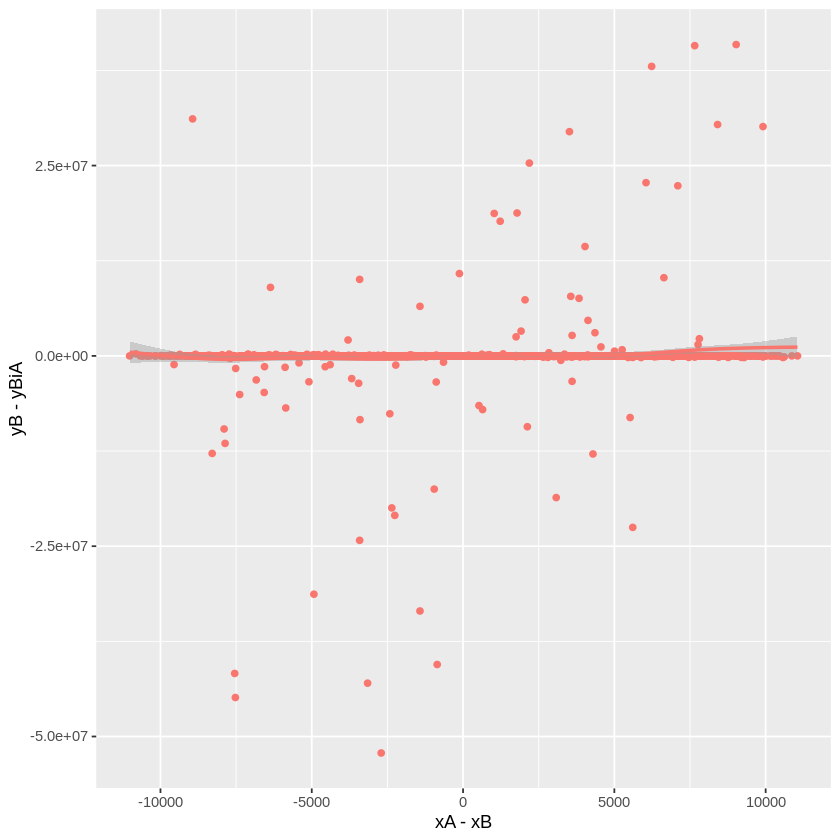

In [182]:
ggplot(
    delta.t[Input == "target demo hours"],
        aes(x = xA - xB, y = yB - yBiA, color = Input)
    ) +
    geom_point() +
    geom_smooth() +
    theme(legend.position = "none")

In [95]:
delta.t <- yb - ybia
colnames(delta.t) <- colnames(z.inputs)[-1]
melt(delta.t)

Var1 Var2                      value      
1      1   aversion to NPV deviation      0.0   
2      2   aversion to NPV deviation      0.0   
3      3   aversion to NPV deviation -74400.8   
4      4   aversion to NPV deviation      0.0   
5      5   aversion to NPV deviation      0.0   
6      6   aversion to NPV deviation      0.0   
7      7   aversion to NPV deviation      0.0   
8      8   aversion to NPV deviation      0.0   
9      9   aversion to NPV deviation      0.0   
10    10   aversion to NPV deviation      0.0   
11    11   aversion to NPV deviation      0.0   
12    12   aversion to NPV deviation      0.0   
13    13   aversion to NPV deviation      0.0   
14    14   aversion to NPV deviation      0.0   
15    15   aversion to NPV deviation      0.0   
16    16   aversion to NPV deviation      0.0   
17    17   aversion to NPV deviation      0.0   
18    18   aversion to NPV deviation      0.0   
19    19   aversion to NPV deviation      0.0   
20    20   aversion to NPV deviation      0.0   
21    21   aversion to NPV deviation      0.0   
22    22   aversion to NPV deviation      0.0   
23    23   aversion to NPV deviation      0.0   
24    24   aversion to NPV deviation      0.0   
25    25   aversion to NPV deviation      0.0   
26    26   aversion to NPV deviation      0.0   
27    27   aversion to NPV deviation      0.0   
28    28   aversion to NPV deviation      0.0   
29    29   aversion to NPV deviation      0.0   
30    30   aversion to NPV deviation      0.0   
...   ...  ...                       ...        
79971 2471 target pilot hours               0.00
79972 2472 target pilot hours         -128046.00
79973 2473 target pilot hours               0.00
79974 2474 target pilot hours               0.00
79975 2475 target pilot hours               0.00
79976 2476 target pilot hours               0.00
79977 2477 target pilot hours               0.00
79978 2478 target pilot hours            4830.75
79979 2479 target pilot hours               0.00
79980 2480 target pilot hours               0.00
79981 2481 target pilot hours               0.00
79982 2482 target pilot hours               0.00
79983 2483 target pilot hours        18950000.00
79984 2484 target pilot hours               0.00
79985 2485 target pilot hours               0.00
79986 2486 target pilot hours           30058.00
79987 2487 target pilot hours               0.00
79988 2488 target pilot hours               0.00
79989 2489 target pilot hours               0.00
79990 2490 target pilot hours               0.00
79991 2491 target pilot hours        -9008080.00
79992 2492 target pilot hours               0.00
79993 2493 target pilot hours          164443.00
79994 2494 target pilot hours               0.00
79995 2495 target pilot hours               0.00
79996 2496 target pilot hours               0.00
79997 2497 target pilot hours           14366.60
79998 2498 target pilot hours               0.00
79999 2499 target pilot hours               0.00
80000 2500 target pilot hours               0.00

In [ ]:
ggplot(melt(delta.t), aes())

In [81]:
for (i in 1:32) {
    v <- (ya - yb) %*% (ya - yb)
    s <- 1 - ((ya - ybia[, i]) %*% (ya - ybia[, i])) / v
    t <- ((yb - ybia[, i]) %*% (yb - ybia[, i])) / v
    print(paste(colnames(z.inputs)[i+1], i, s, t))
}

[1] "aversion to NPV deviation 1 0.0262633347132722 0.0613331394131266"
[1] "base external investor ask rate 2 0.0691854918172111 0.546362462733768"
[1] "bioproduct long term price 3 -0.0848110562027362 0.19934591131601"
[1] "bioproduct performance advantage 4 -0.000884574587146192 7.85572948067138e-05"
[1] "commercial capital cost input 5 0.132062557701935 0.334641131361667"
[1] "commercial plant capacity 6 -0.08323165717197 0.414516333274031"
[1] "commercial plant capacity input 7 -0.0374427769788133 0.352687587296715"
[1] "commercial process yield input 8 0.0760779024480065 0.209568941866158"
[1] "commercial variable operating cost input 9 0.0182379963174015 0.267086932126617"
[1] "expected continuity of government policy 10 -0.0691871602151917 0.144388268438256"
[1] "government capital cost share 11 -0.0674251795140473 0.438277802838729"
[1] "government production incentive 12 -0.00095424576270875 0.0509837354607318"
[1] "initial market size 13 1.71193792475322e-09 6.18043859238182

In [82]:
for (i in 1:32) {
    v <- (ya - yb) %*% (ya - yb) / 2
    s <- (ya %*% (ybia[, i] - yb)) / v
    t <- (yb %*% (yb - ybia[, i])) / v
    print(paste(colnames(z.inputs)[i+1], i, s, t))
}

[1] "aversion to NPV deviation 1 -0.000118027071304919 0.087714501197704"
[1] "base external investor ask rate 2 0.00449895451743407 0.611049000033546"
[1] "bioproduct long term price 3 -2.52462009078382e-06 0.114537379733364"
[1] "bioproduct performance advantage 4 0 -0.000806017292339764"
[1] "commercial capital cost input 5 -0.00172294966064778 0.468426638724248"
[1] "commercial plant capacity 6 -0.00152033091299832 0.332805007015058"
[1] "commercial plant capacity input 7 -0.00211580715776074 0.317360617475662"
[1] "commercial process yield input 8 -5.82889916306603e-05 0.285705133305795"
[1] "commercial variable operating cost input 9 -0.00021588530650165 0.28554081375052"
[1] "expected continuity of government policy 10 0.00129706716925725 0.0739040410538063"
[1] "government capital cost share 11 0.000247872667167946 0.370604750657513"
[1] "government production incentive 12 2.42644383408065e-06 0.0500270632541893"
[1] "initial market size 13 0 1.71811816928836e-09"
[1] "manageme

In [71]:
1 - ((ya - ybia[, 6]) %*% (ya - ybia[, 6])) / ((ya - yb) %*% (ya - yb))

[,1]       
[1,] -0.08323166

In [50]:
matrix(1:6, nrow=2) + matrix(10:11, nrow=2)

ERROR: Error in matrix(1:6, nrow = 2) + matrix(10:11, nrow = 2): non-conformable arrays


In [56]:
var(ya) / 1e12

[1] 8.642511

In [57]:
var(yb) / 1e12

[1] 9.726365

In [58]:
(ya - yb) %*% (ya - yb) / 2 / n / 1e12

[,1]    
[1,] 9.321244

In [40]:
(ybia[, 1] - yb) %*% (ybia[,1] - yb)

[,1]        
[1,] 2.858506e+15

In [42]:
(ybia[, 1] %*% ya) / n - (mean(ya))^2

[,1]         
[1,] -139890758090

In [39]:
((ybia[, 1] %*% ya) / n - (mean(ya))^2) / ((ya %*% ya) / n - (mean(ya))^2)

[,1]       
[1,] -0.01619283

In [34]:
sensitivityIndices <- function(inputs, outputs) {
    result <- NULL
    for (i in 5:ncol(outputs)) {
        ya <-        as.matrix(outputs[1:n              , i, with=FALSE])
        yb <-        as.matrix(outputs[1:n + n          , i, with=FALSE])
        yc <- matrix(as.matrix(outputs[(2*n+1):((k+2)*n), i, with=FALSE]), nrow=n, byrow=TRUE)
        f0 <- mean(ya)
        s1 <-     ((t(yc) %*% ya) / n - f0^2) / as.numeric((t(ya) %*% ya) / n - f0^2)
        ta <- 1 - ((t(yc) %*% yb) / n - f0^2) / as.numeric((t(ya) %*% ya) / n - f0^2)
        result <- rbind(
            result,
            data.table(
                Input  = colnames(inputs)[1:k + 1],
                Output = colnames(outputs)[i]     ,
                S      = as.vector(s1)            ,
                T      = as.vector(ta)
            )
        )
    }
    result
}

In [7]:
z.design %>% dim

[1] 2500   64

In [8]:
1:10 + 100

[1] 101 102 103 104 105 106 107 108 109 110

In [23]:
z.outputs[, .(Replacement, Scale)] %>% unique

Replacement Scale    
1 Advantaged  Commodity
2 Advantaged  Niche    
3 Direct      Commodity
4 Direct      Niche

In [35]:
cases <- unique(z.outputs[, .(Replacement, Scale)])


In [36]:
cases %>% nrow

[1] 4

In [37]:
z.sens <- NULL
cases <- unique(z.outputs[, .(Replacement, Scale)])
for (i in 1:nrow(cases))
    z.sens <- rbind(
        z.sens,
        cbind(
            Replacement = cases[i, Replacement],
            Scale = cases[i, Scale],
            sensitivityIndices(z.inputs, z.outputs[Replacement == cases[i, Replacement] & Scale == cases[i, Scale] & Time == 2050])
        )
    )
z.sens %>% dim

[1] 6272    6

In [44]:
z.sens[order(-abs(S))] %>% head

Replacement Scale     Input                     Output         S       
1 Direct      Commodity aversion to NPV deviation payback period 3.045662
2 Advantaged  Commodity aversion to NPV deviation payback period 3.045658
3 Direct      Niche     aversion to NPV deviation payback period 3.029255
4 Advantaged  Niche     aversion to NPV deviation payback period 3.029246
5 Direct      Commodity startup piloting rate     payback period 2.217966
6 Advantaged  Commodity startup piloting rate     payback period 2.217964
  T        
1 -1.885488
2 -1.885484
3 -1.867428
4 -1.867420
5 -1.634488
6 -1.634484

In [32]:
z.sens[, .(Input, Output, S=mapply(function(x) max(0, min(1, x)), T))] %>% summary

    Input              Output                S         
 Length:6272        Length:6272        Min.   :0.0000  
 Class :character   Class :character   1st Qu.:0.9814  
 Mode  :character   Mode  :character   Median :1.0000  
                                       Mean   :0.9631  
                                       3rd Qu.:1.0000  
                                       Max.   :1.0000  
                                       NA's   :448     

In [31]:
z.sens[, .(Input, Output, S=mapply(function(x) max(0, min(1, x)), S))] %>% summary

    Input              Output                S         
 Length:6272        Length:6272        Min.   :0.0000  
 Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :0.0000  
                                       Mean   :0.0221  
                                       3rd Qu.:0.0161  
                                       Max.   :1.0000  
                                       NA's   :448     

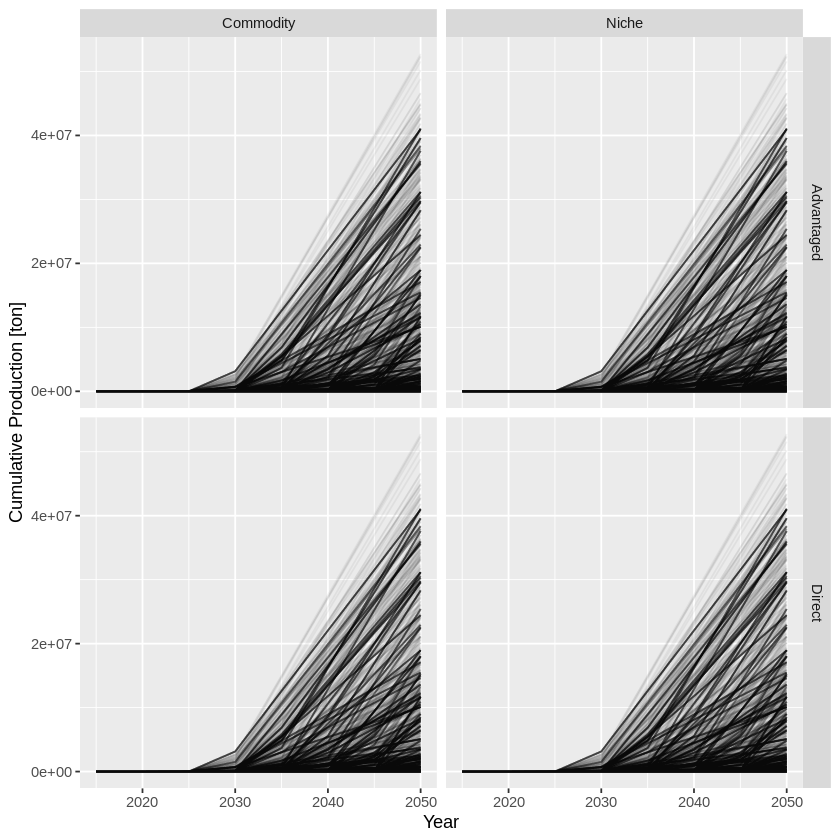

In [36]:
ggplot(z.outputs, aes(x=Time, y=`Cumulative Production`, group=Run)) +
    geom_line(alpha = 0.05) +
    facet_grid(Replacement ~ Scale) +
    xlab("Year") +
    ylab("Cumulative Production [ton]")

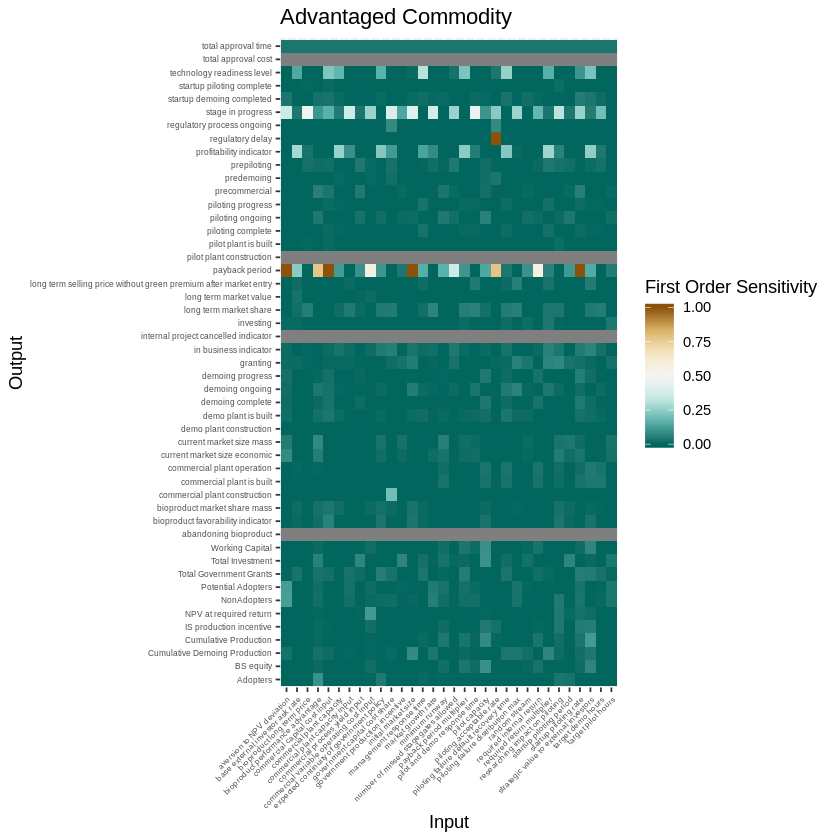

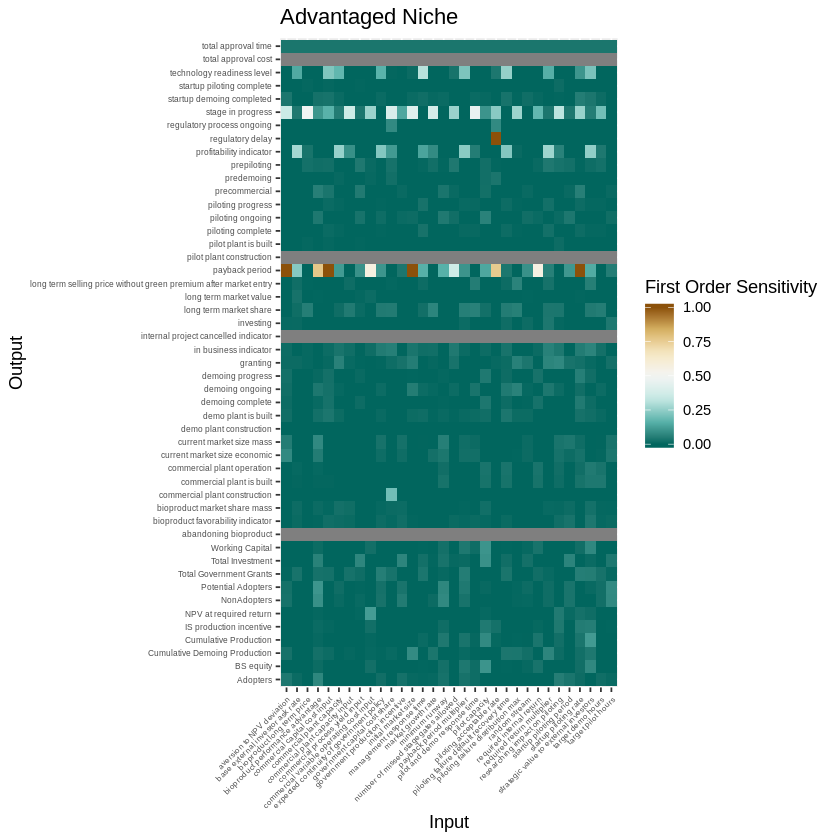

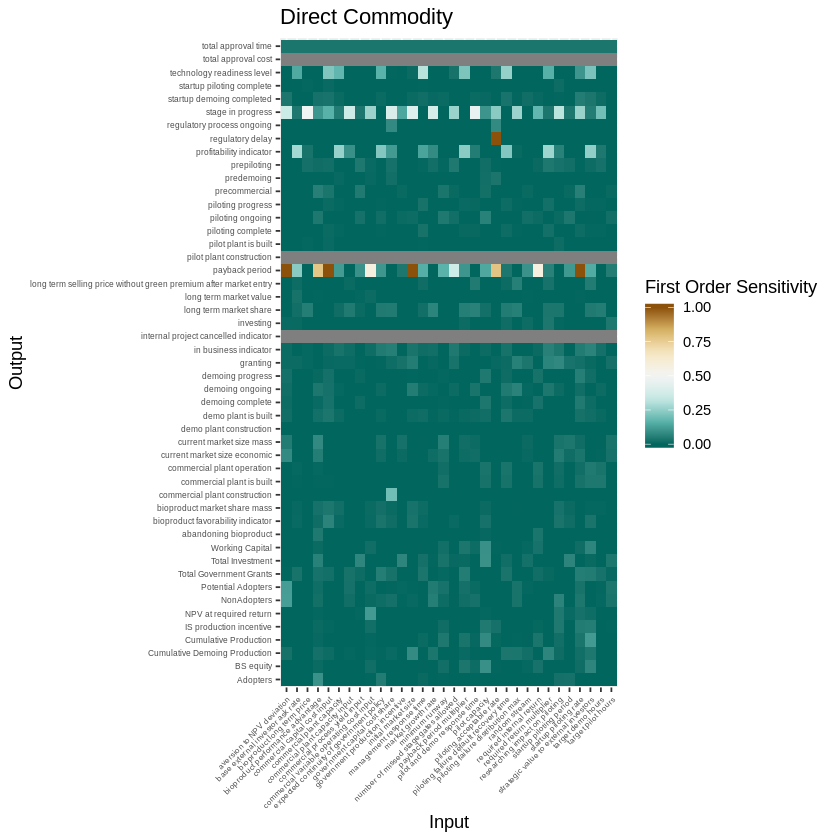

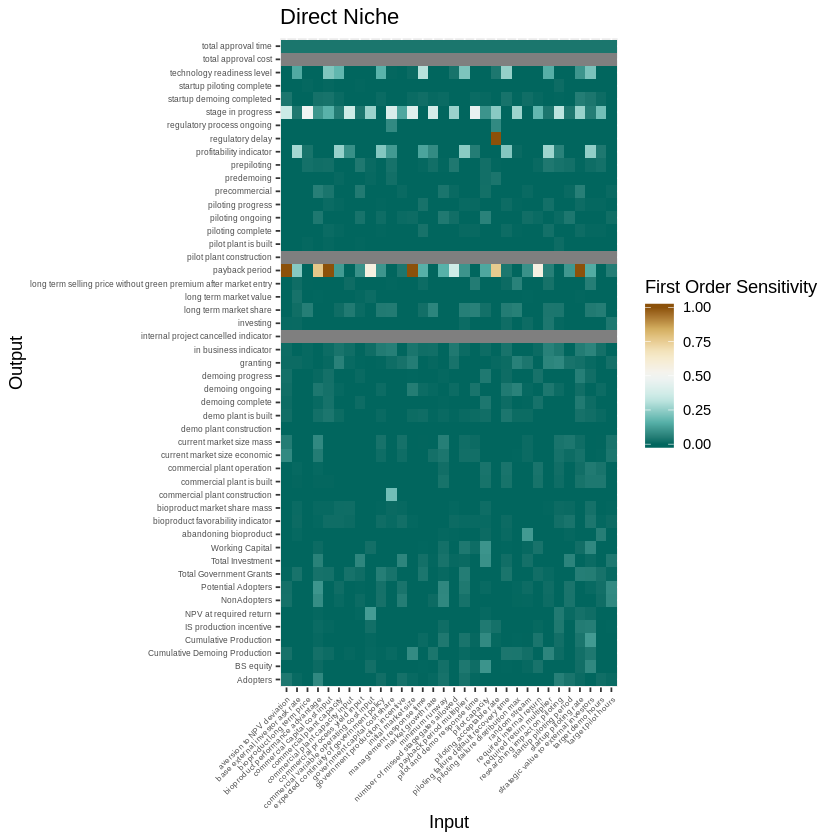

In [37]:
for (i in 1:nrow(cases)) {
    g <- ggplot(
        z.sens[
            Replacement == cases[i, Replacement] & Scale == cases[i, Scale],
            .(Input, Output, `First Order Sensitivity`=mapply(function(x) max(0, min(1, x)), S))
        ],
        aes(x=Input, y=Output, fill=`First Order Sensitivity`)
    ) +
        geom_tile() +
        scale_fill_distiller(type="div", limits=c(0, 1)) +
        theme(
            axis.text=element_text(size=5),
            axis.text.x = element_text(angle = 45, hjust=1)
        ) +
        ggtitle(paste(cases[i, Replacement], cases[i, Scale]))
    print(g)
}

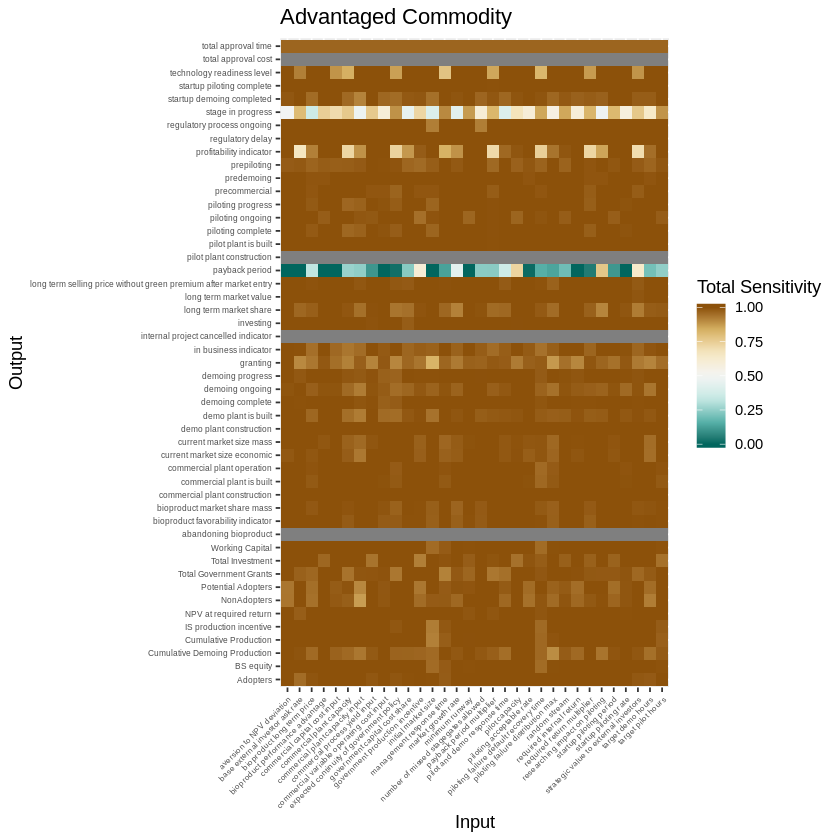

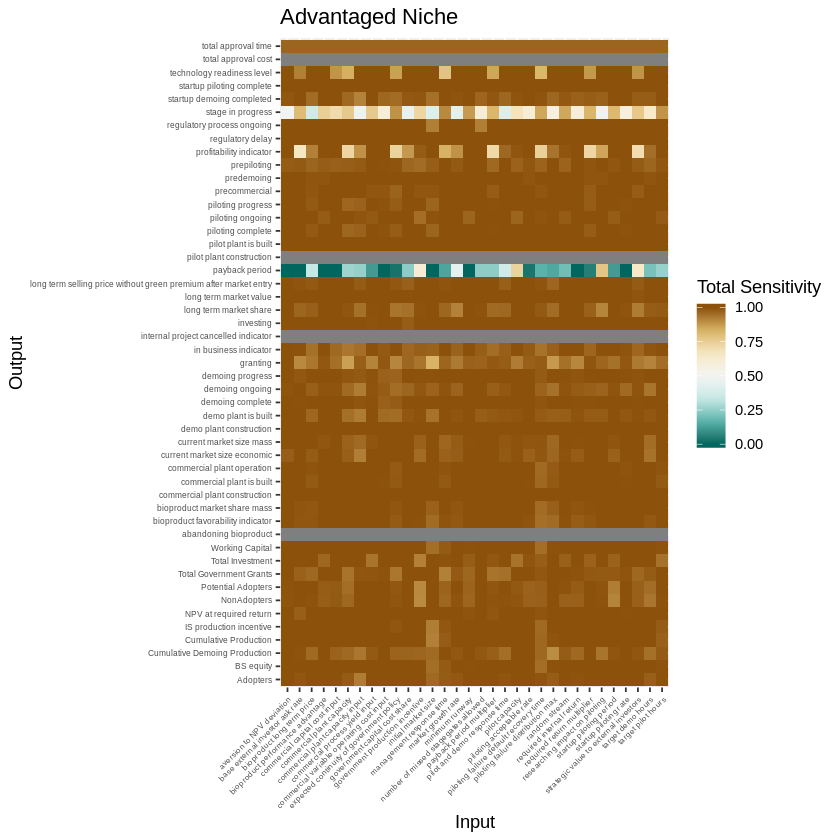

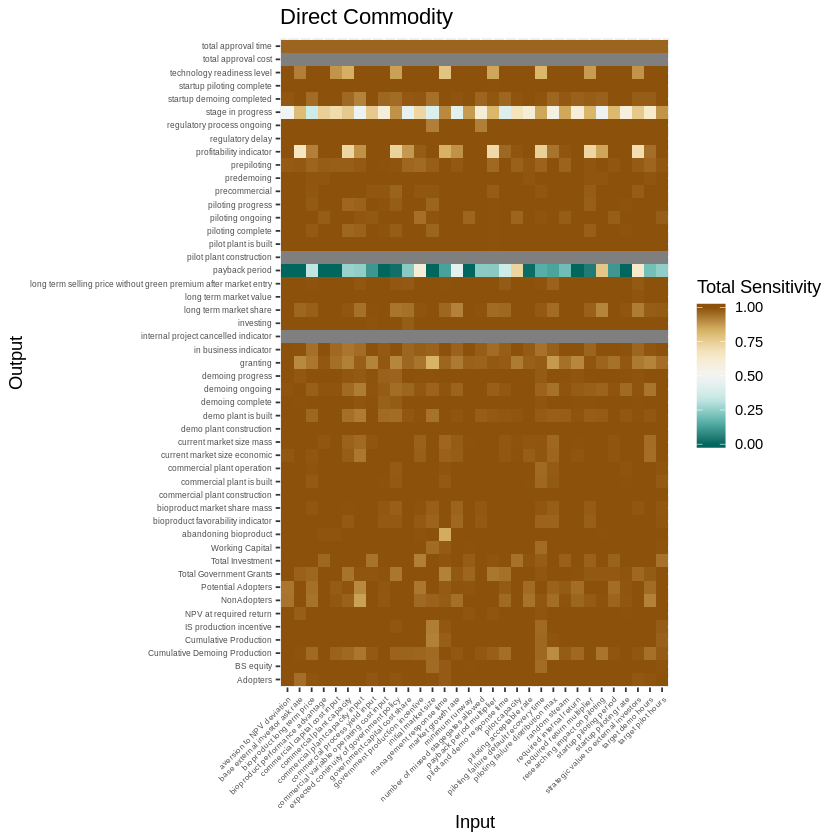

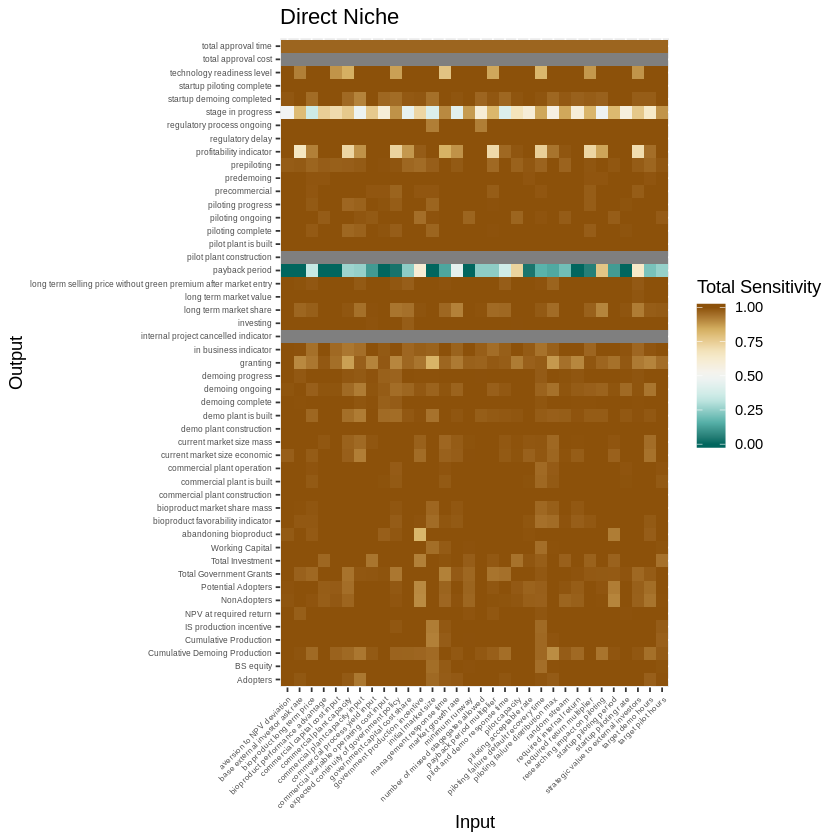

In [38]:
for (i in 1:nrow(cases)) {
    g <- ggplot(
        z.sens[
            Replacement == cases[i, Replacement] & Scale == cases[i, Scale],
            .(Input, Output, `Total Sensitivity`=mapply(function(x) max(0, min(1, x)), T))
        ],
        aes(x=Input, y=Output, fill=`Total Sensitivity`)
    ) +
        geom_tile() +
        scale_fill_distiller(type="div", limits=c(0, 1)) +
        theme(
            axis.text=element_text(size=5),
            axis.text.x = element_text(angle = 45, hjust=1)
        ) +
        ggtitle(paste(cases[i, Replacement], cases[i, Scale]))
    print(g)
}

In [48]:
z.sens.boot <- z.sens[Replacement == "Advanced" & Scale == "Niche"]
for (i in 1:100)
    z.sens.boot <- rbind(
        z.sens.boot,
        cbind(
            Replacement = cases[1, Replacement],
            Scale = cases[1, Scale],
            sensitivityIndices(z.inputs, z.outputs[Replacement == cases[1, Replacement] & Scale == cases[1, Scale] & Time == 2050])
        )
    )
z.sens.boot %>% dim

[1] 156800      6

In [49]:
z.sens[, .(S=mean(S, na.rm=TRUE), T=mean(T, na.rm=TRUE)), by=.(Input)]

Input                                    S            T        
1  aversion to NPV deviation                 0.075114525 0.9370538
2  base external investor ask rate           0.007554161 0.9676616
3  bioproduct long term price                0.001487255 0.9632146
4  bioproduct performance advantage          0.023567987 0.9855529
5  commercial capital cost input             0.049619632 0.9238469
6  commercial plant capacity                 0.007389120 0.9614596
7  commercial plant capacity input           0.002145865 0.9583133
8  commercial process yield input           -0.002859087 0.9858643
9  commercial variable operating cost input  0.013800909 0.9461605
10 expected continuity of government policy  0.011772077 0.9583666
11 government capital cost share             0.013077482 0.9751624
12 government production incentive          -0.011859782 0.9847243
13 initial market size                       0.033848570 0.9250455
14 management response time                  0.012494626 0.9700685
15 market growth rate                        0.005957633 0.9771349
16 minimum runway                           -0.001393473 0.9872221
17 number of missed stagegates allowed       0.007553910 0.9834935
18 payback period multiplier                 0.016600295 0.9666606
19 pilot and demo response time              0.004772934 0.9781716
20 pilot capacity                            0.010566977 1.0003013
21 piloting acceptable rate                  0.034569780 0.9763130
22 piloting failure default recovery time    0.015935124 0.9551323
23 piloting failure distribution max        -0.002163284 0.9683268
24 random stream                            -0.007484951 0.9916453
25 required internal return                  0.009949672 0.9692409
26 required return multiplier                0.012216642 0.9684690
27 researching impact on piloting            0.016134559 0.9870979
28 startup piloting period                  -0.007685540 0.9942018
29 startup piloting rate                     0.063977691 0.9440531
30 strategic value to external investors     0.029762980 0.9766706
31 target demo hours                         0.004115283 0.9731069
32 target pilot hours                       -0.007698507 0.9935702

In [50]:
z.sens.boot %>% summary

 Replacement           Scale              Input              Output         
 Length:156800      Length:156800      Length:156800      Length:156800     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
       S                T         
 Min.   :-0.381   Min.   :-2.515  
 1st Qu.:-0.015   1st Qu.: 0.982  
 Median :-0.002   Median : 1.002  
 Mean   : 0.014   Mean   : 0.969  
 3rd Qu.: 0.016   3rd Qu.: 1.015  
 Max.   : 3.046   Max.   : 1.473  
 NA's   :12800    NA's   :12800   

Warning message:
"Removed 12800 rows containing non-finite values (stat_boxplot)."

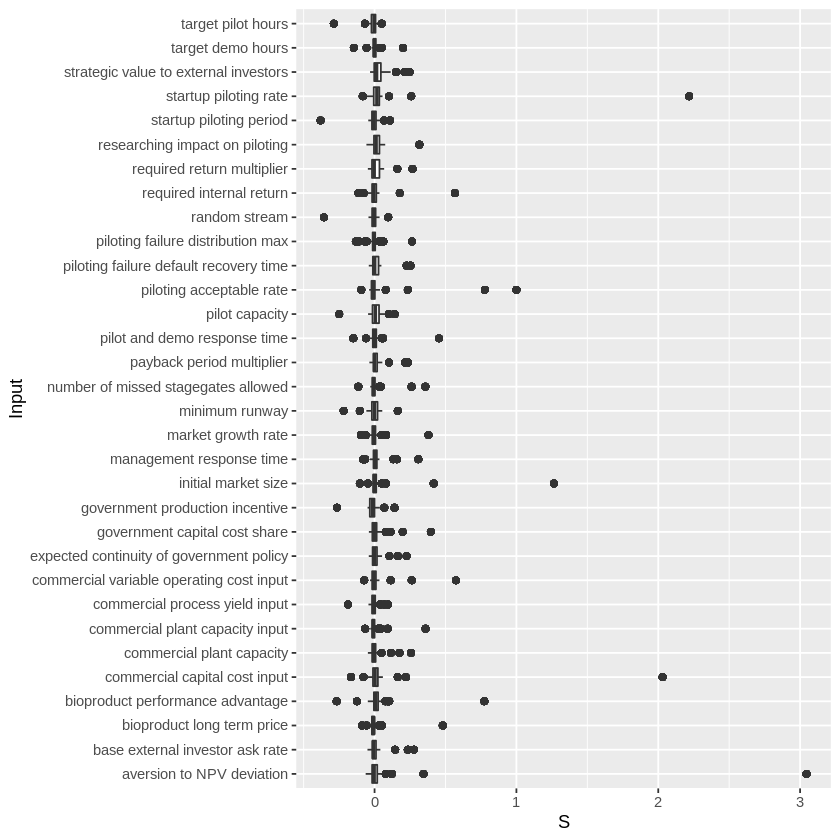

In [51]:
ggplot(z.sens.boot, aes(x=Input, y=S)) +
    geom_boxplot() +
    coord_flip()

Warning message:
"Removed 12800 rows containing non-finite values (stat_boxplot)."

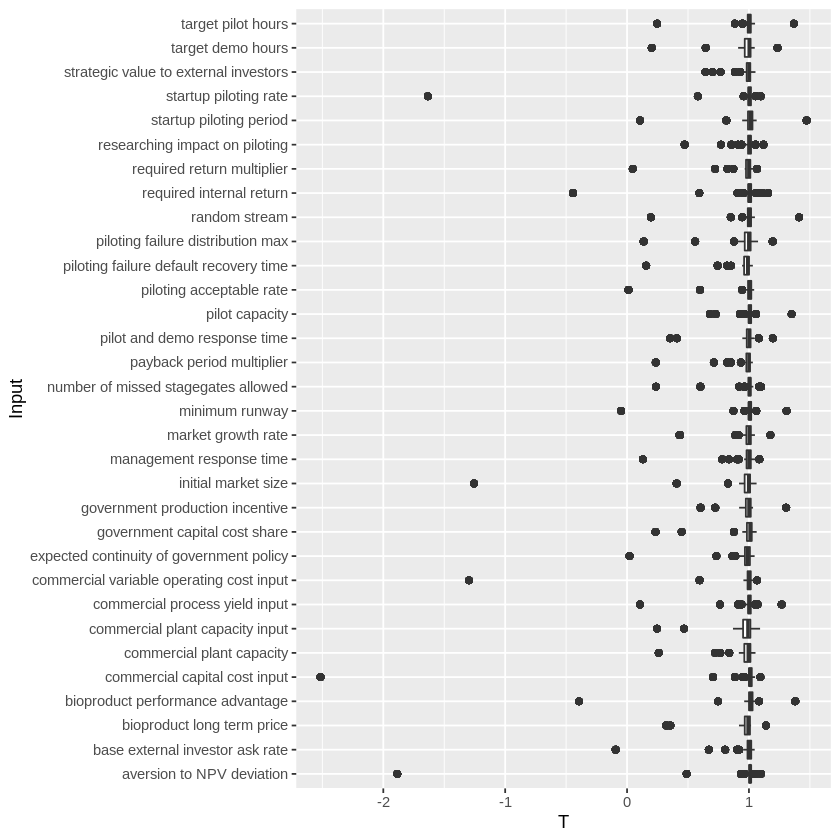

In [54]:
ggplot(z.sens.boot, aes(x=Input, y=T)) +
    geom_boxplot() +
    coord_flip()

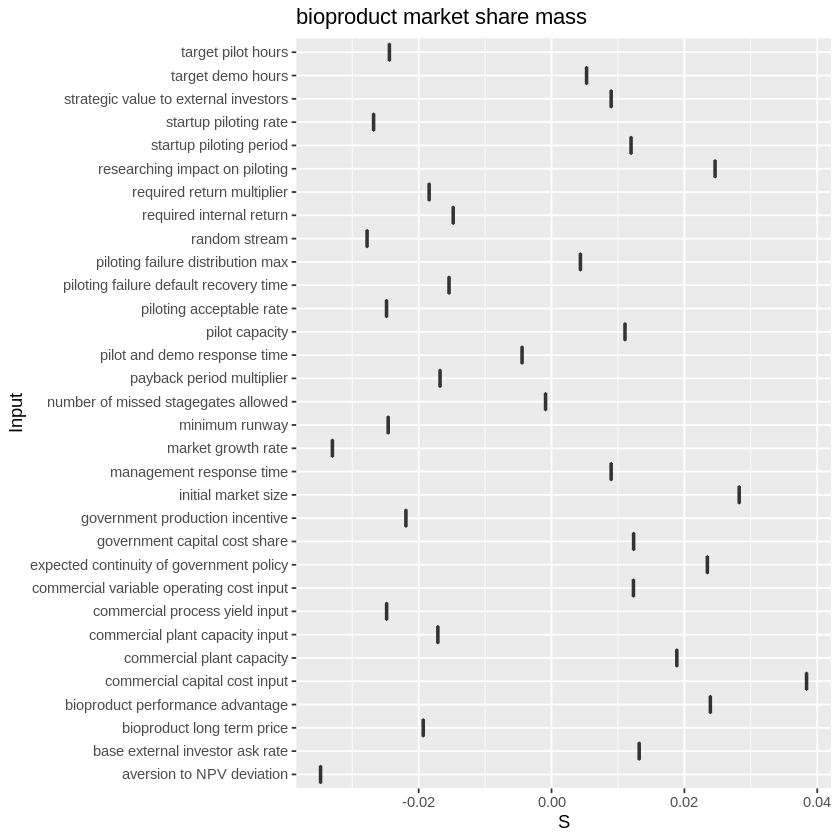

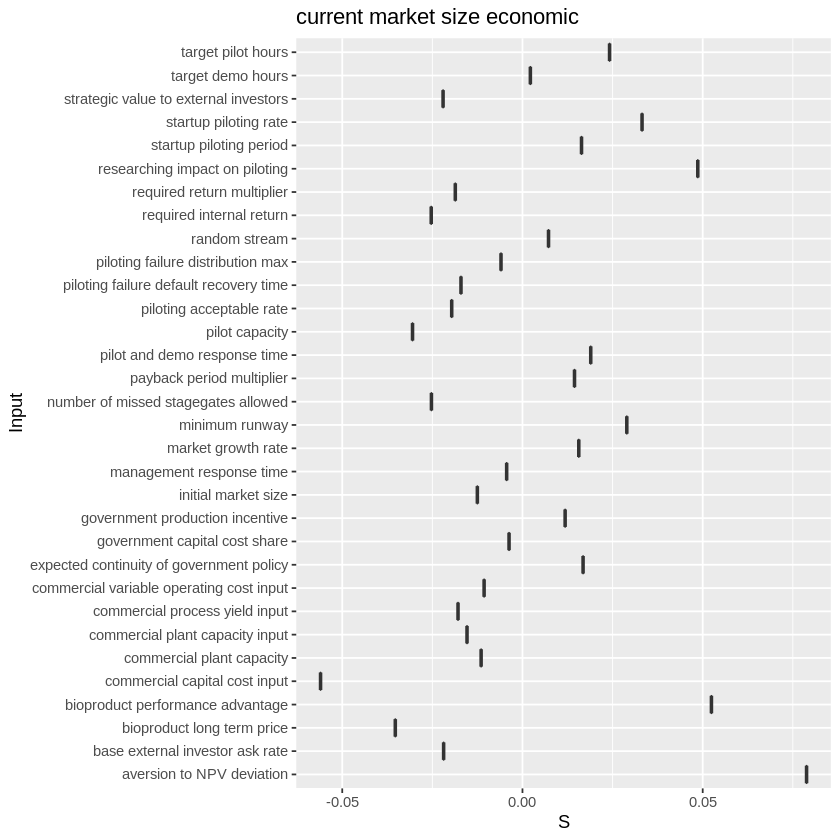

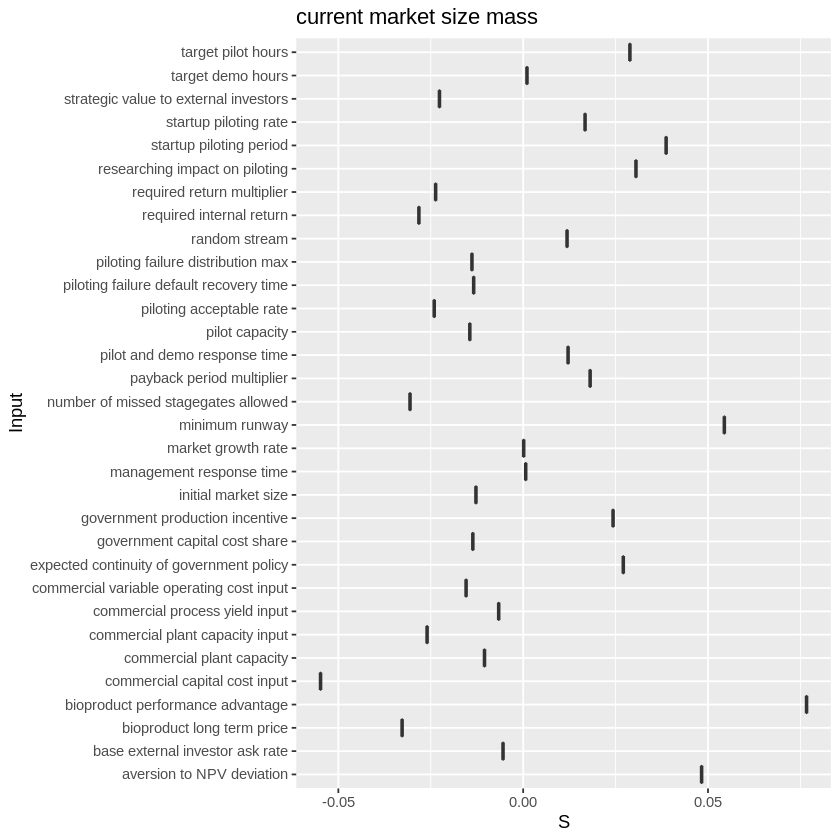

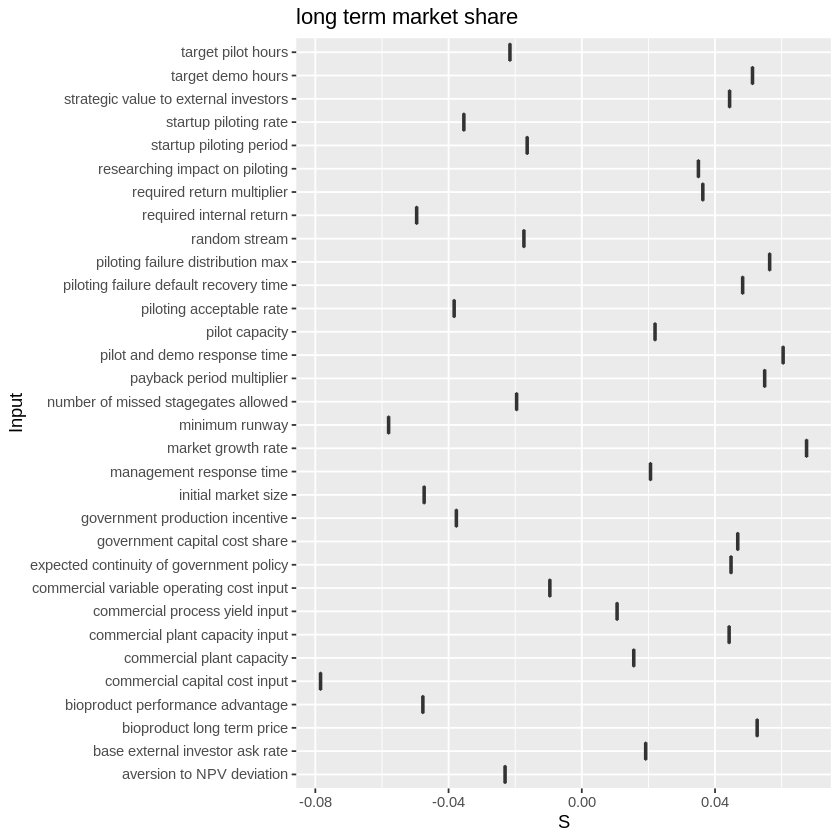

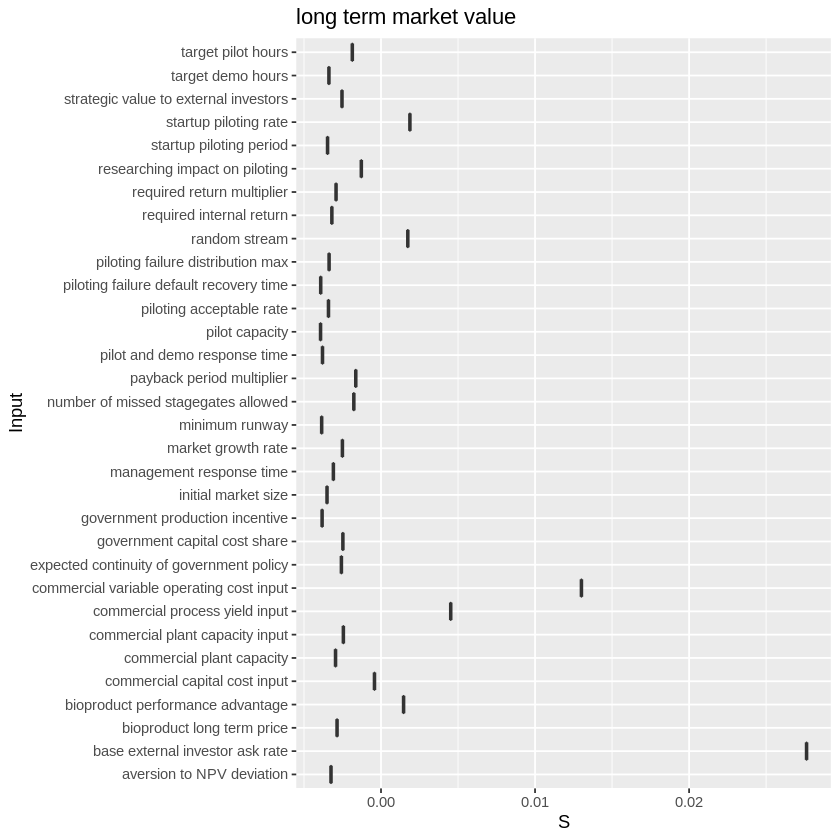

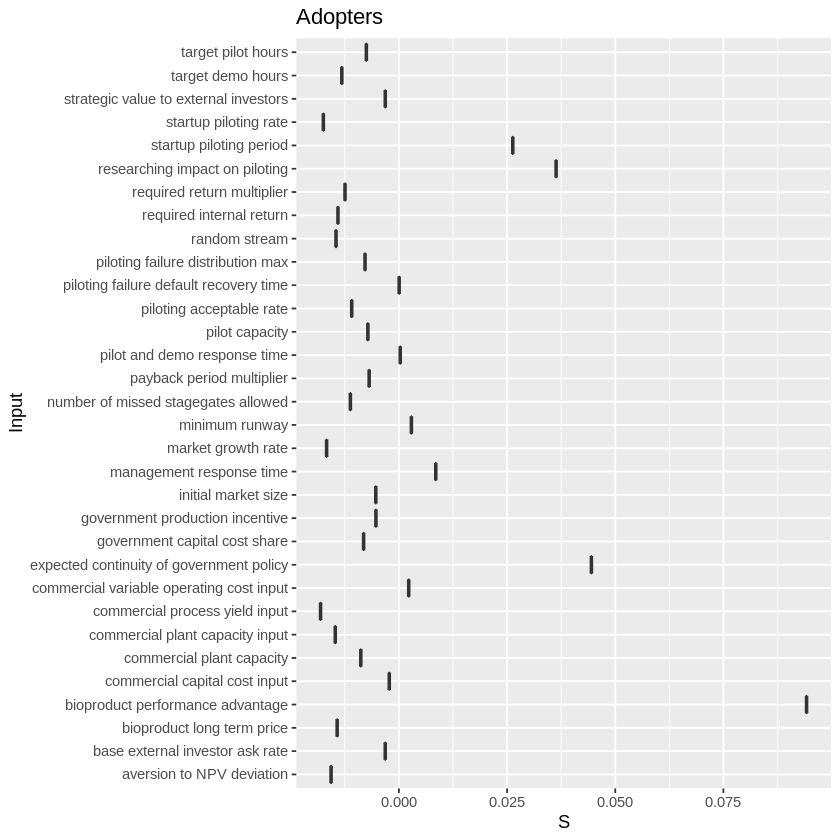

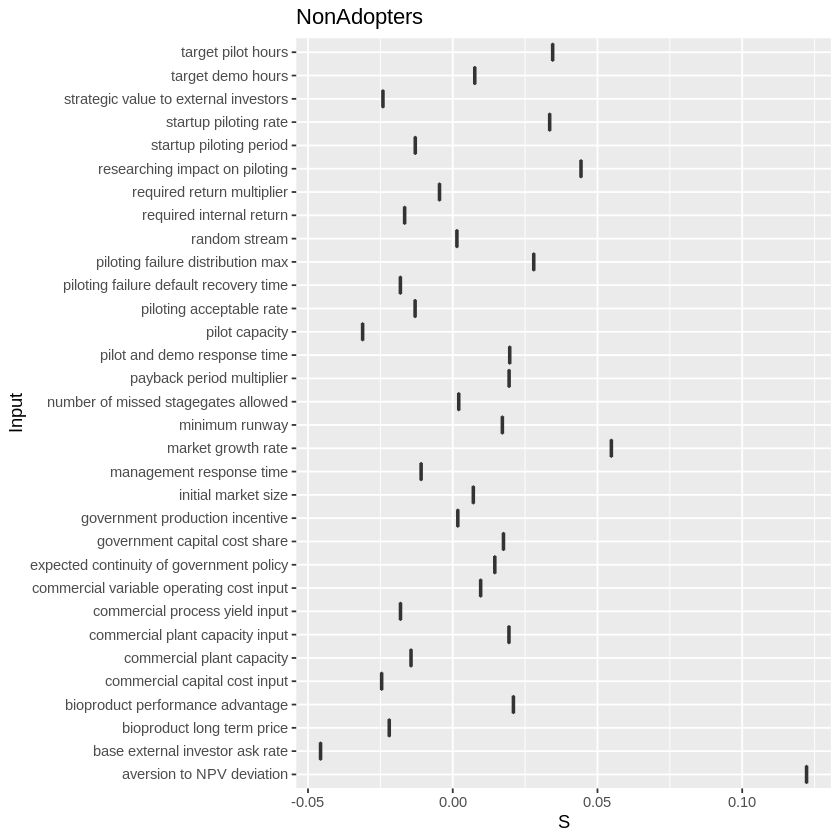

Warning message:
"Removed 3200 rows containing non-finite values (stat_boxplot)."

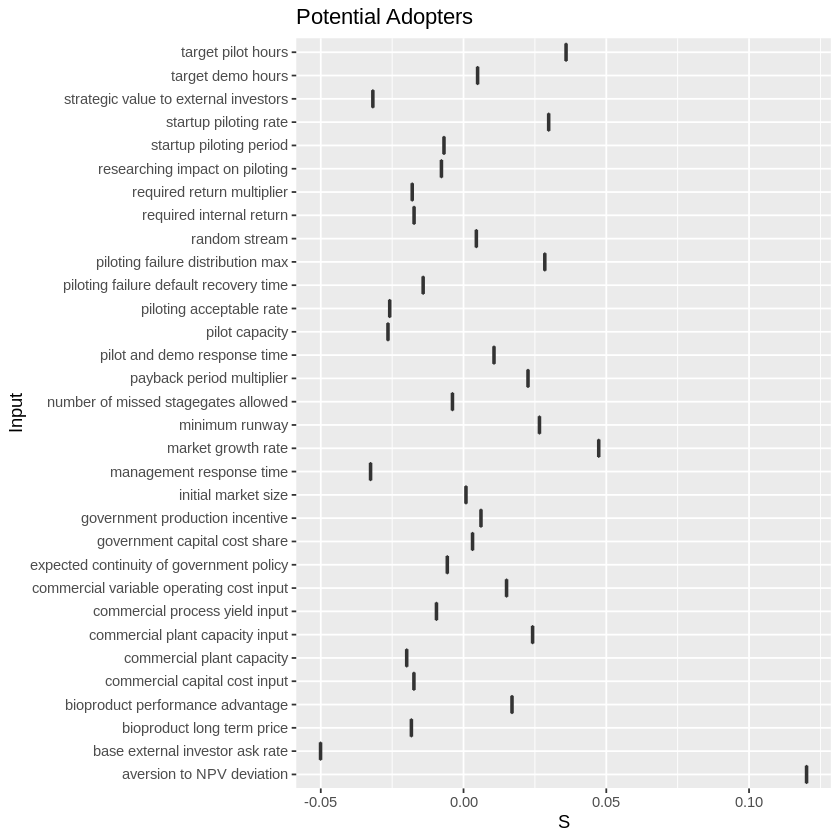

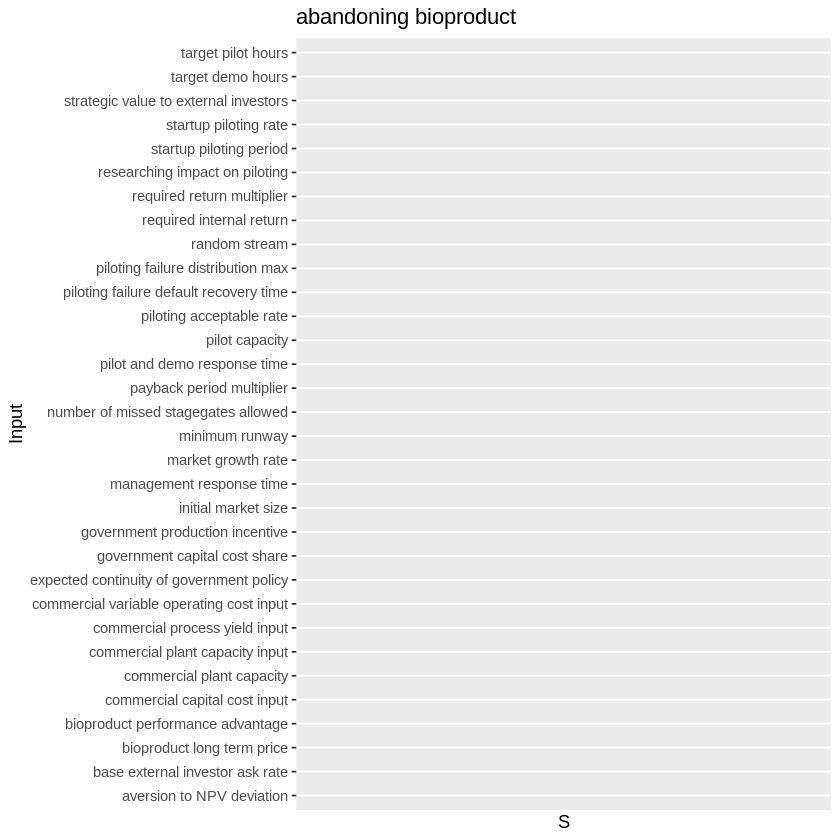

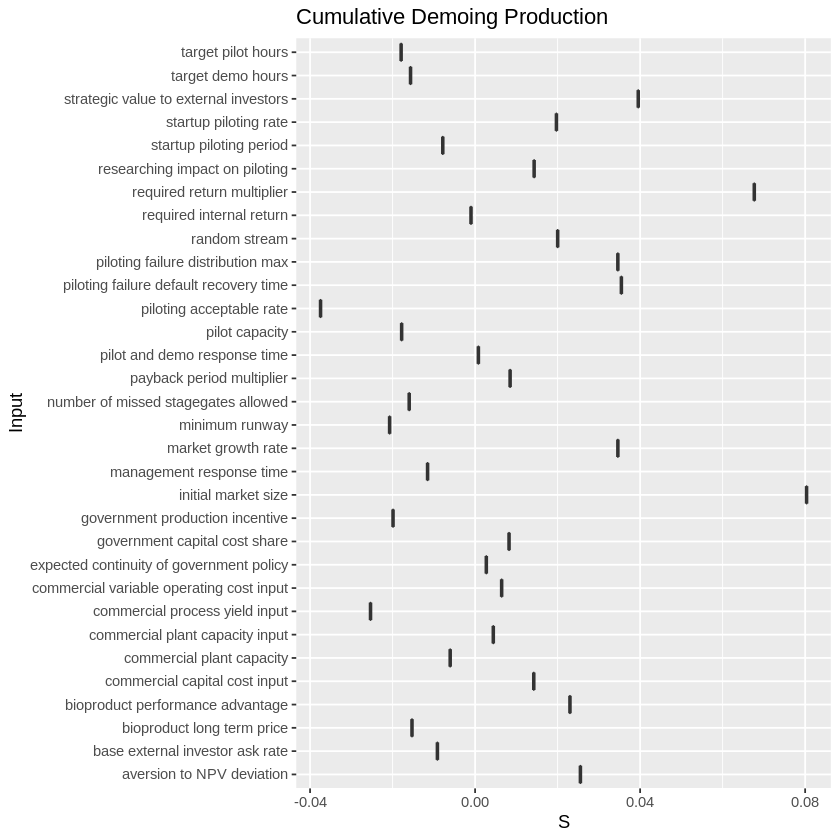

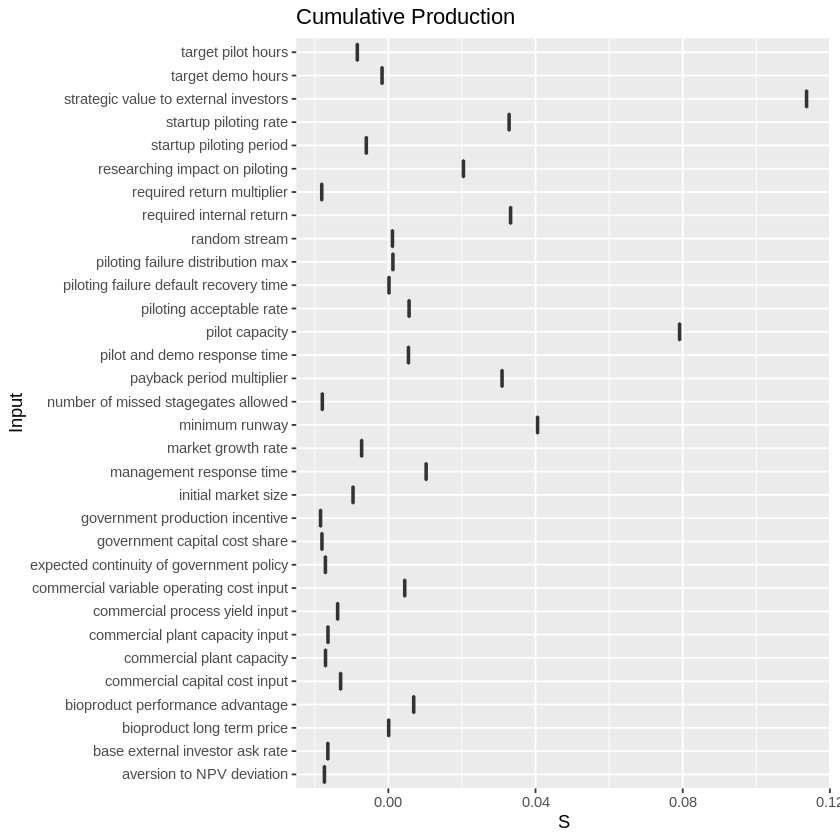

Warning message:
"Removed 3200 rows containing non-finite values (stat_boxplot)."

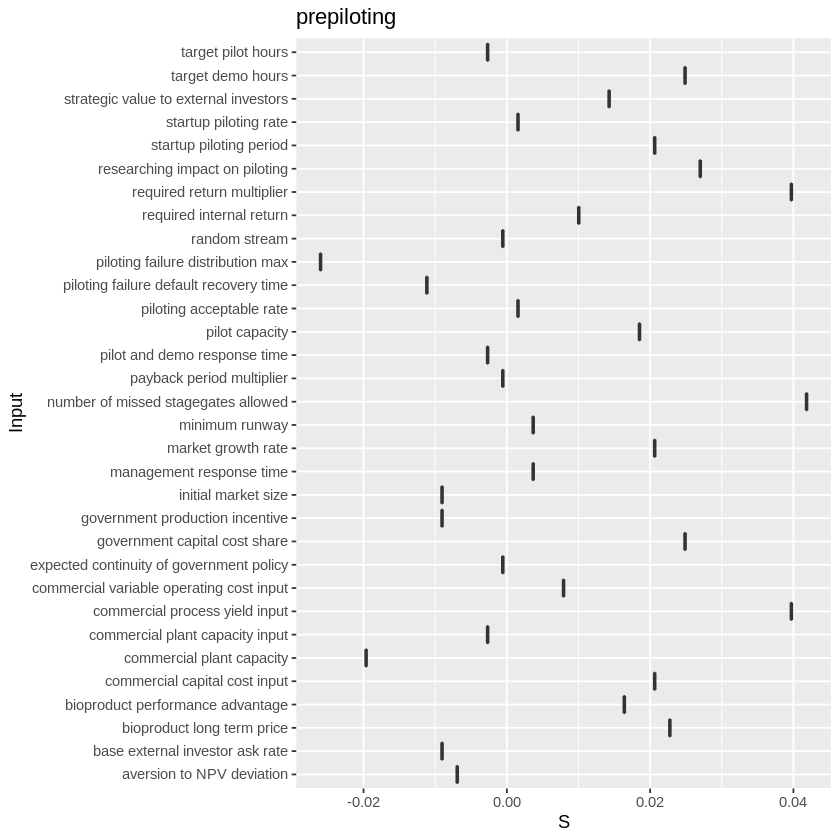

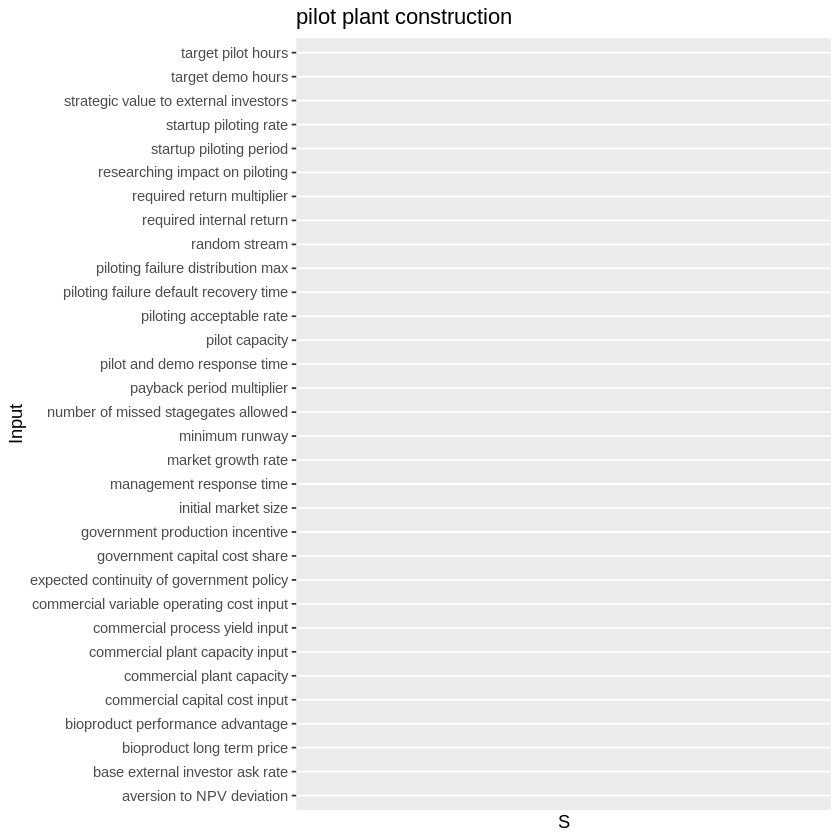

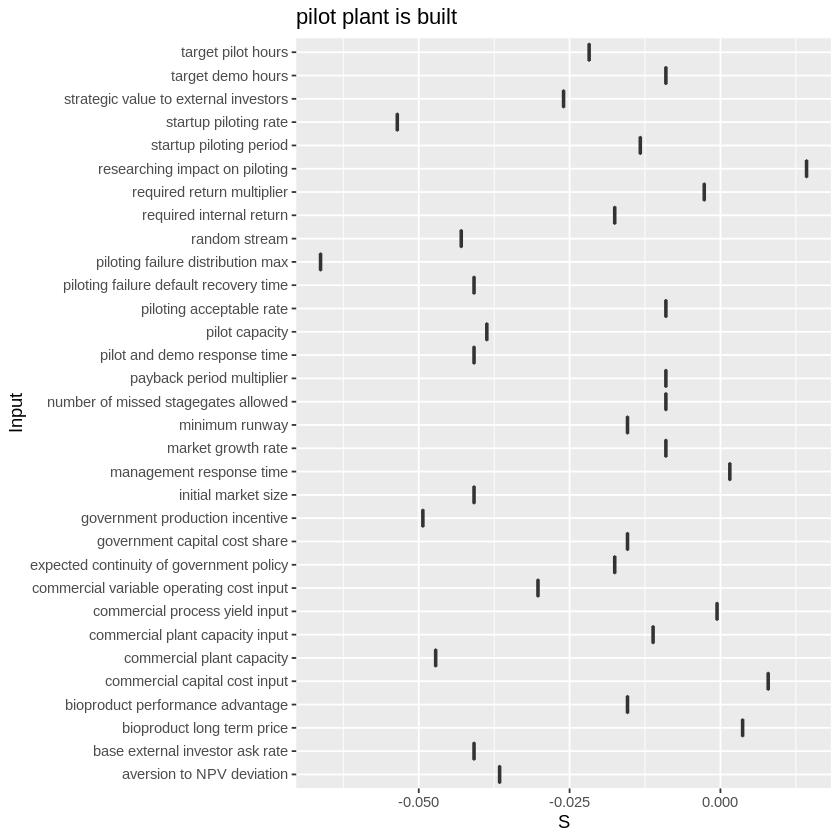

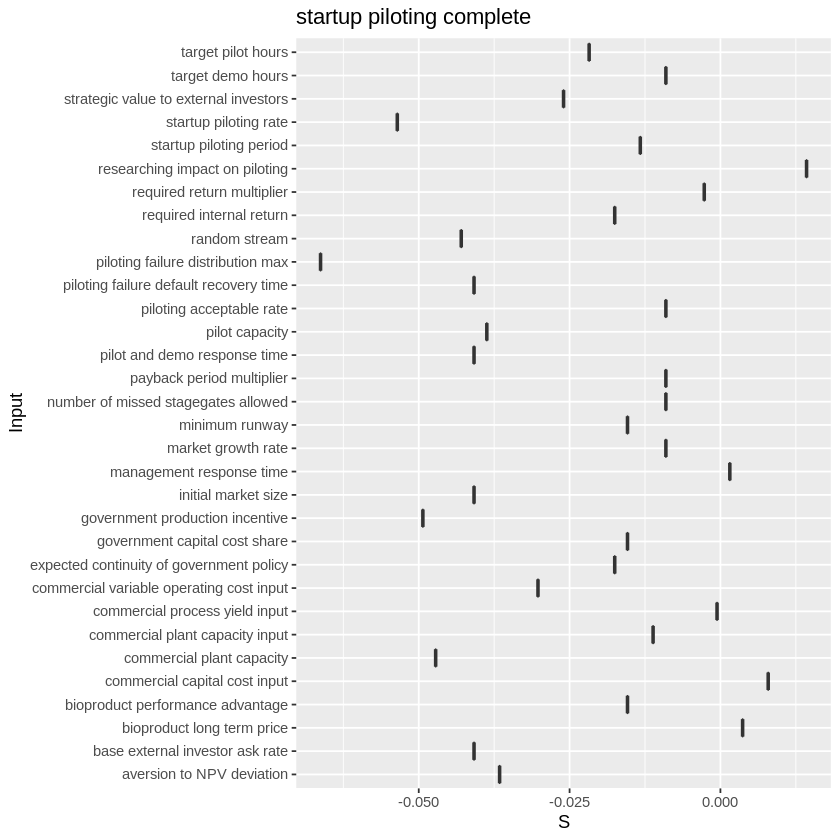

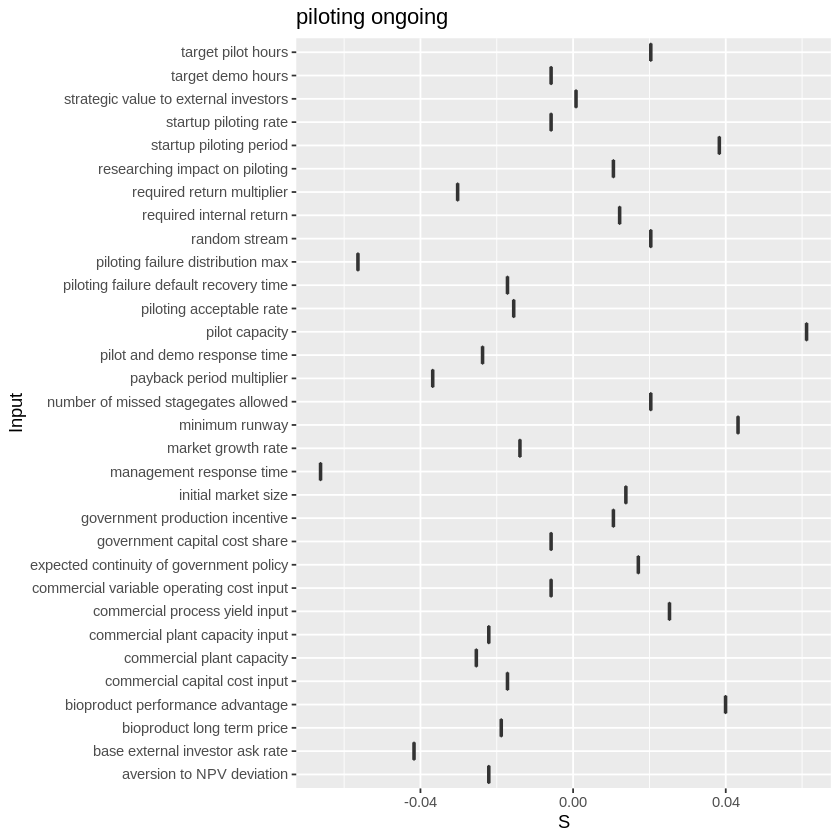

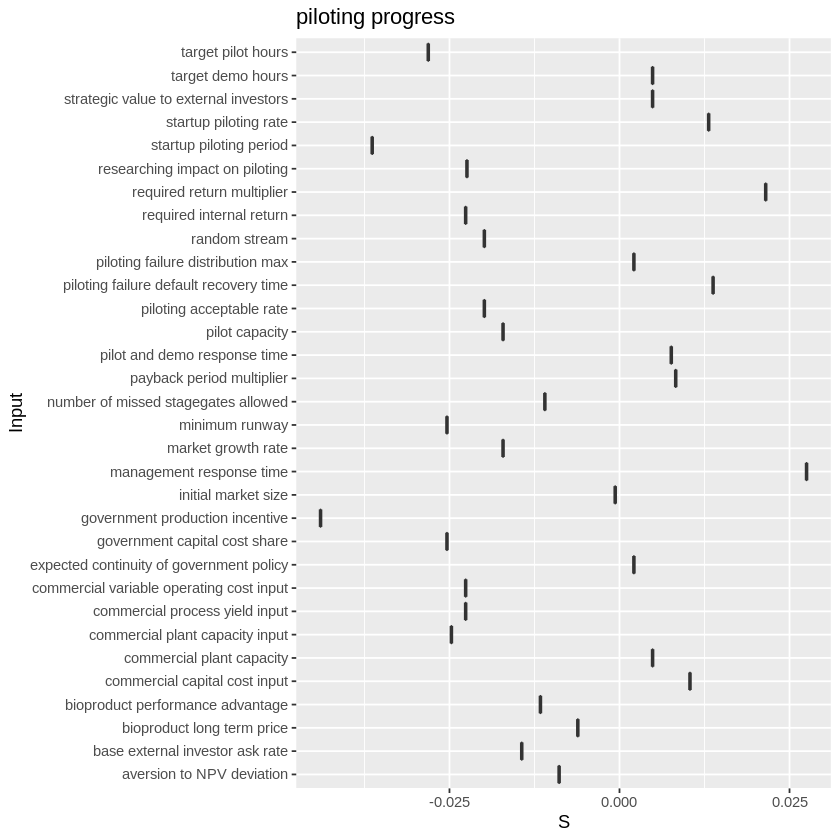

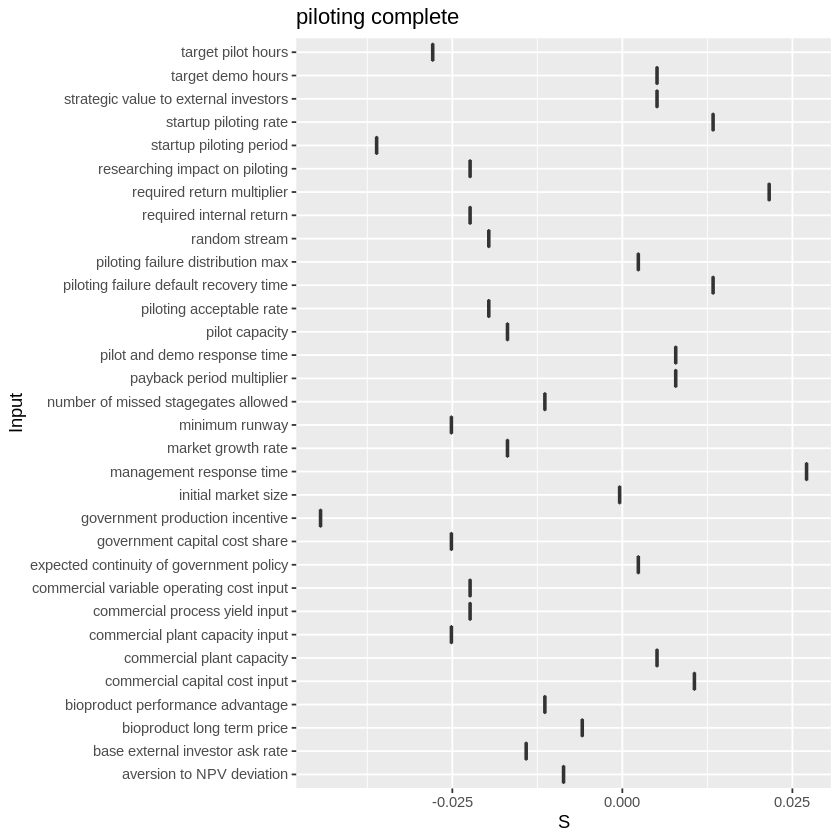

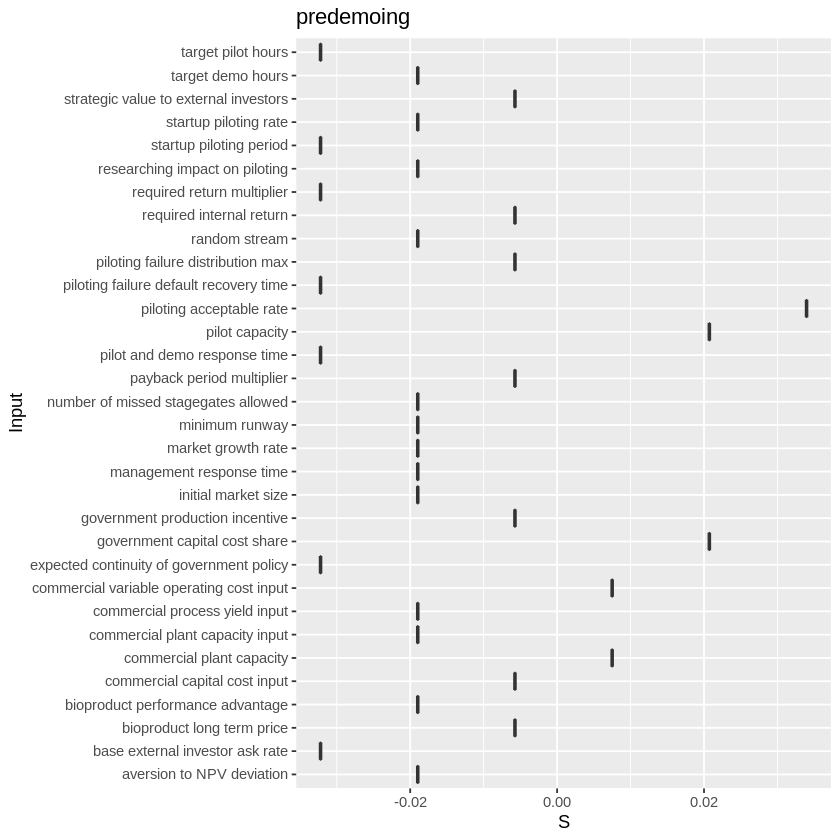

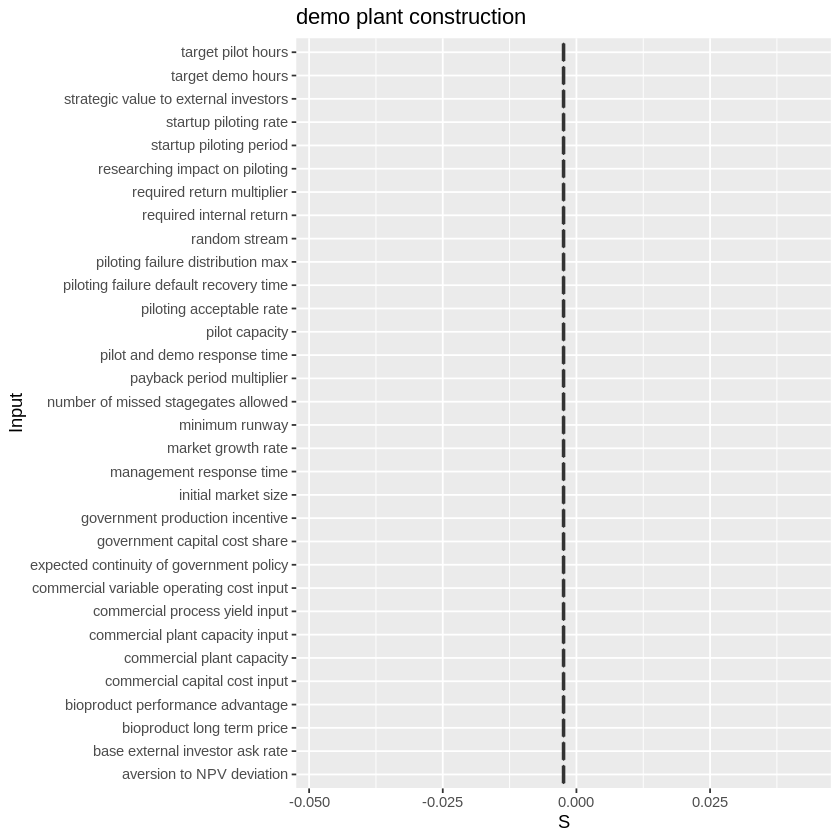

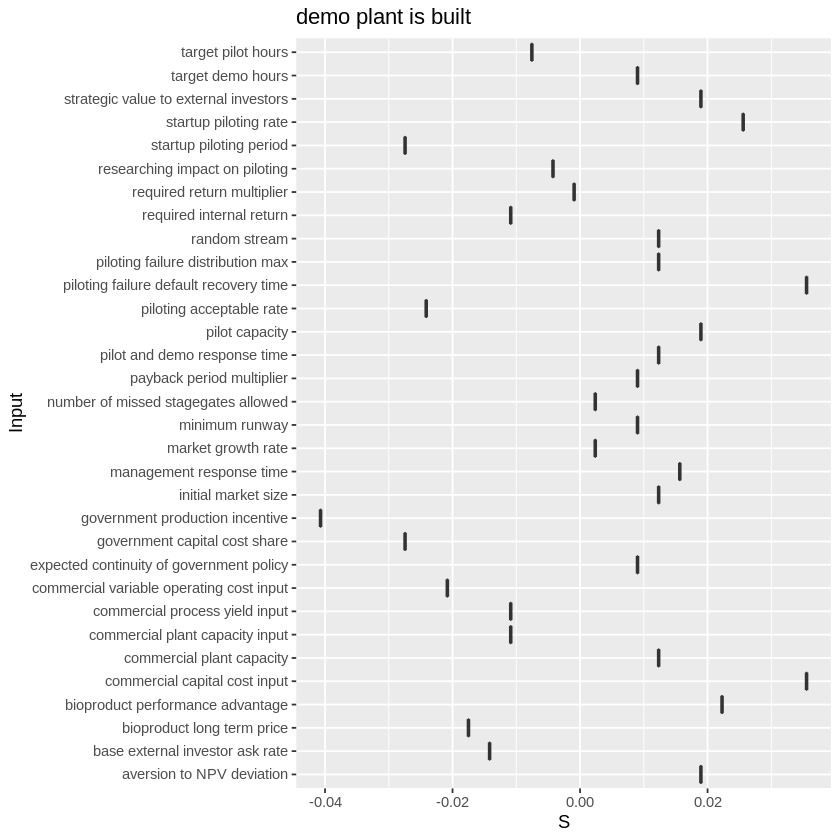

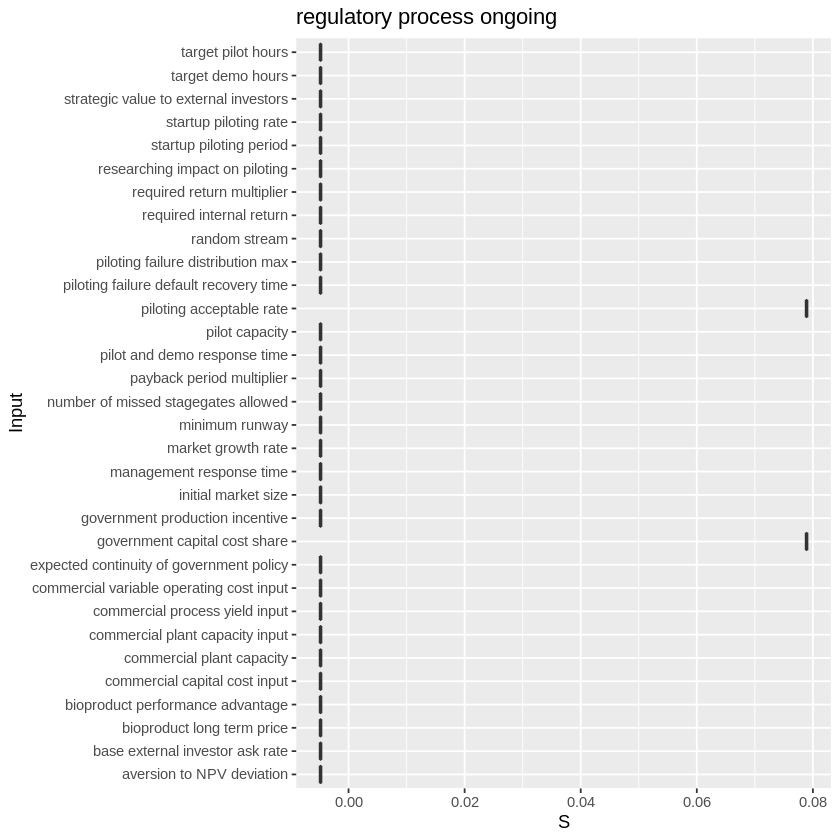

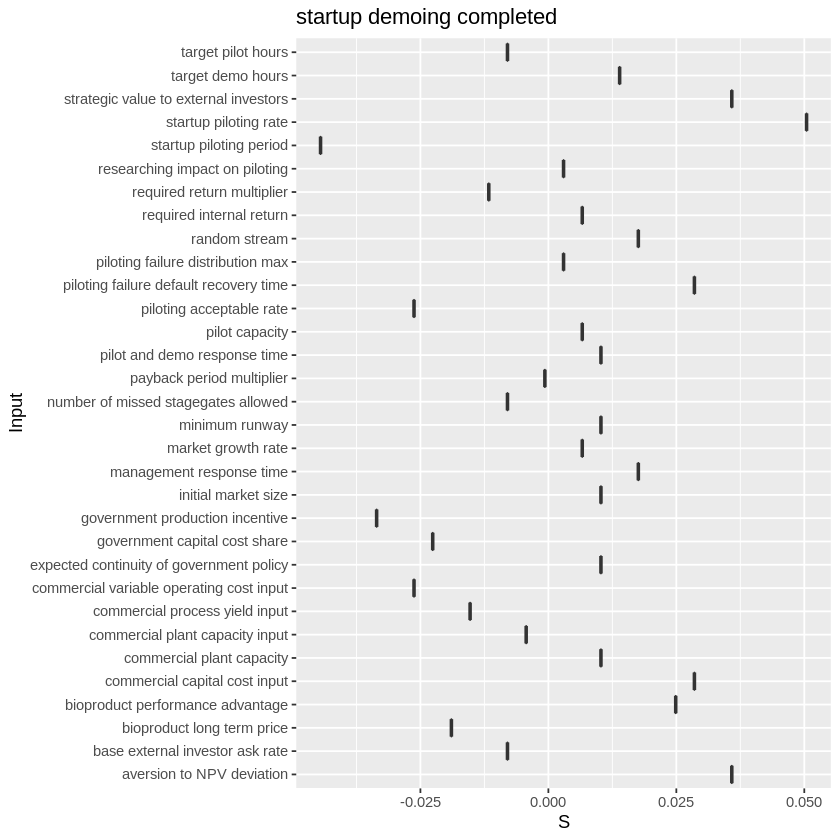

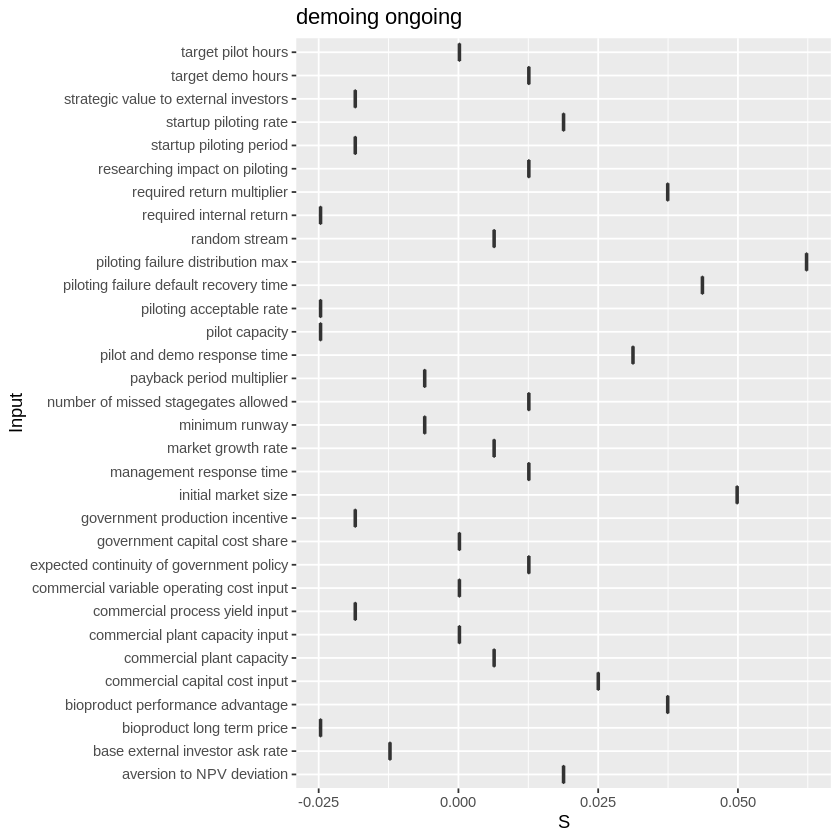

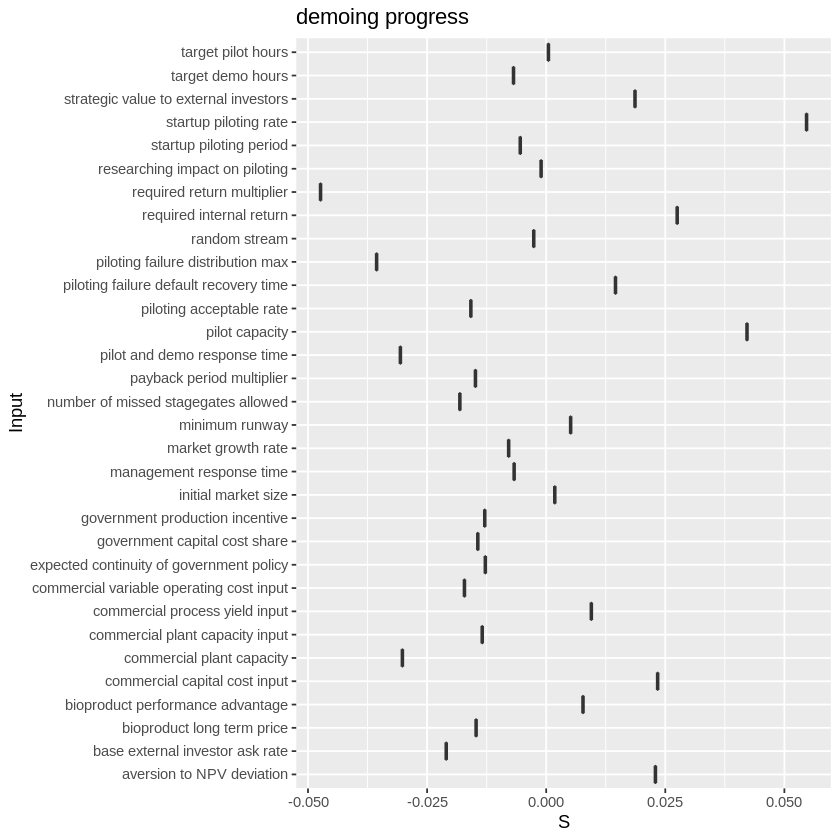

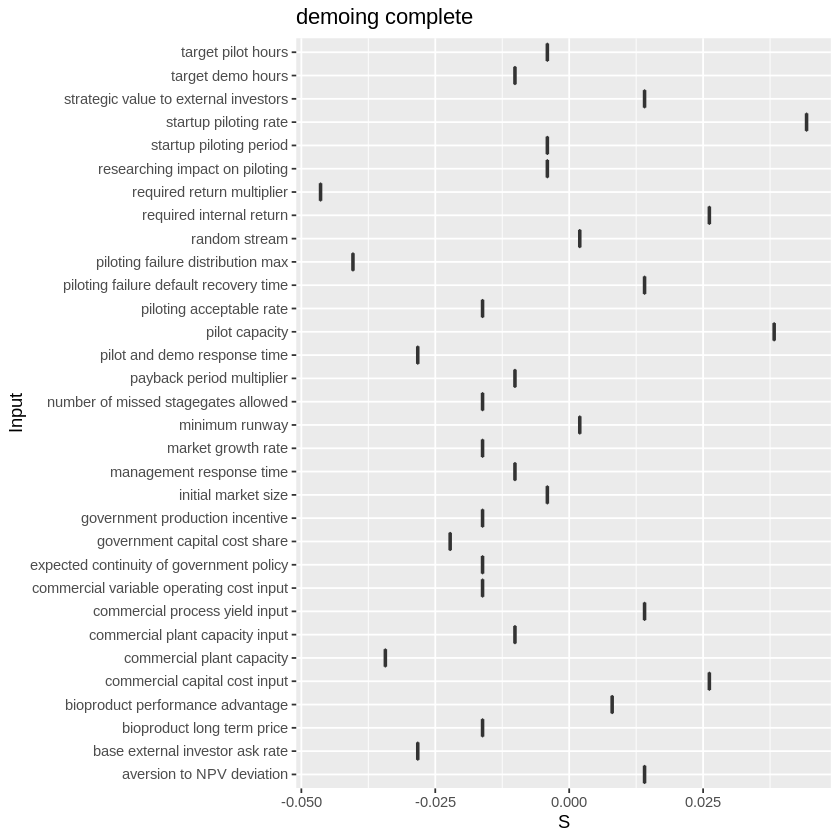

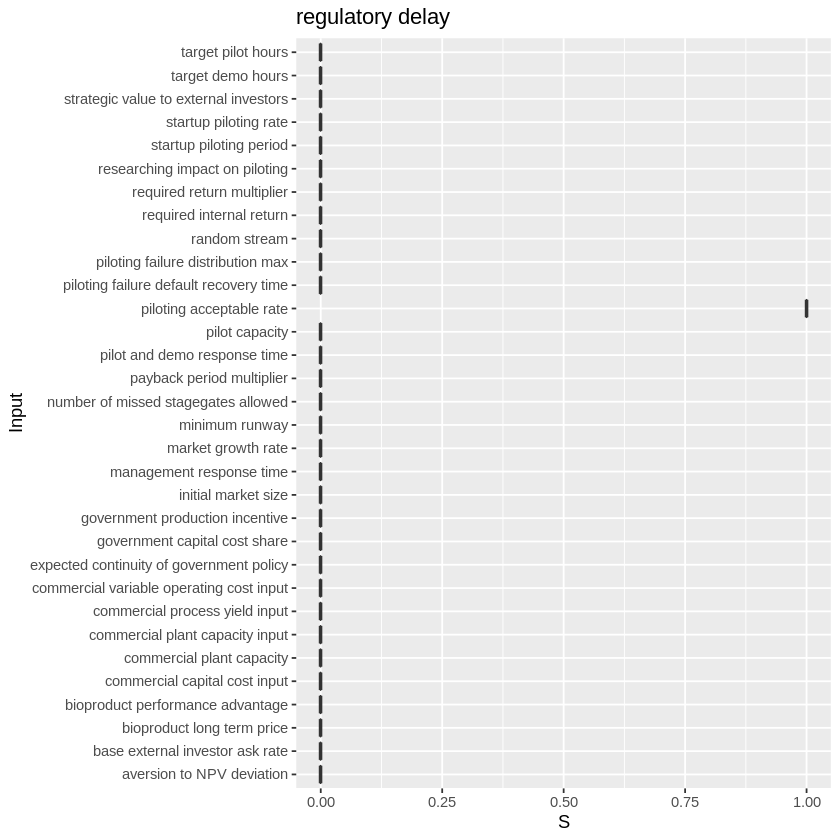

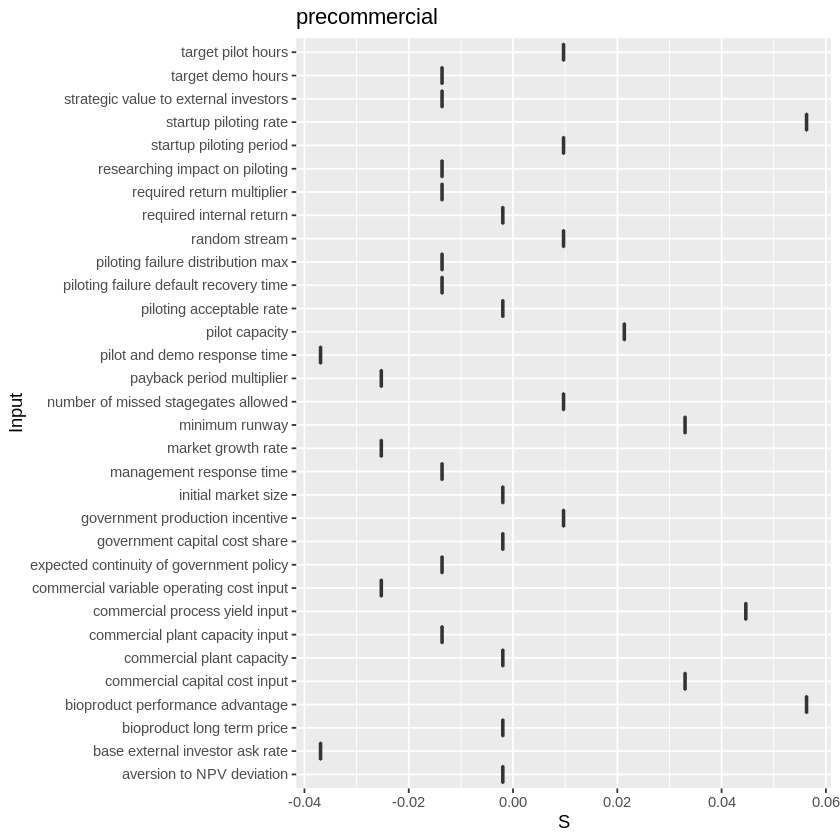

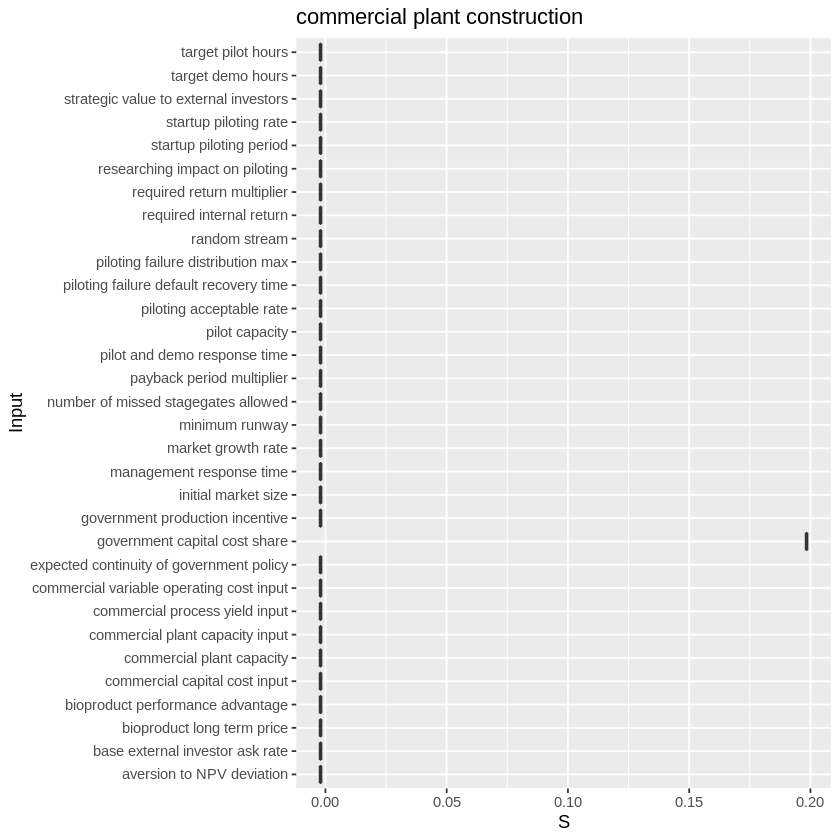

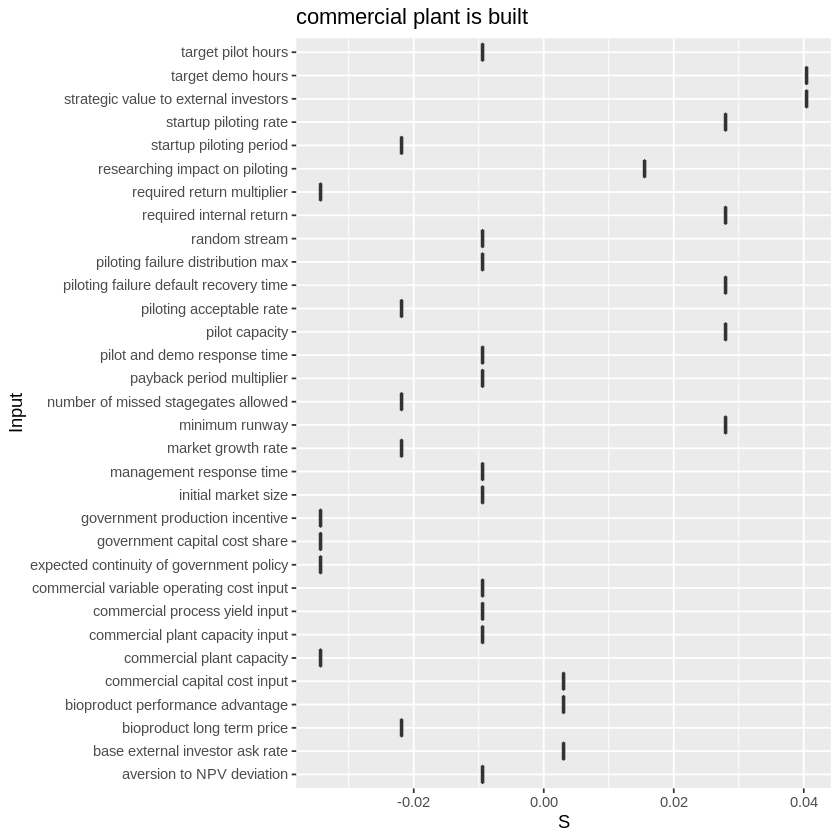

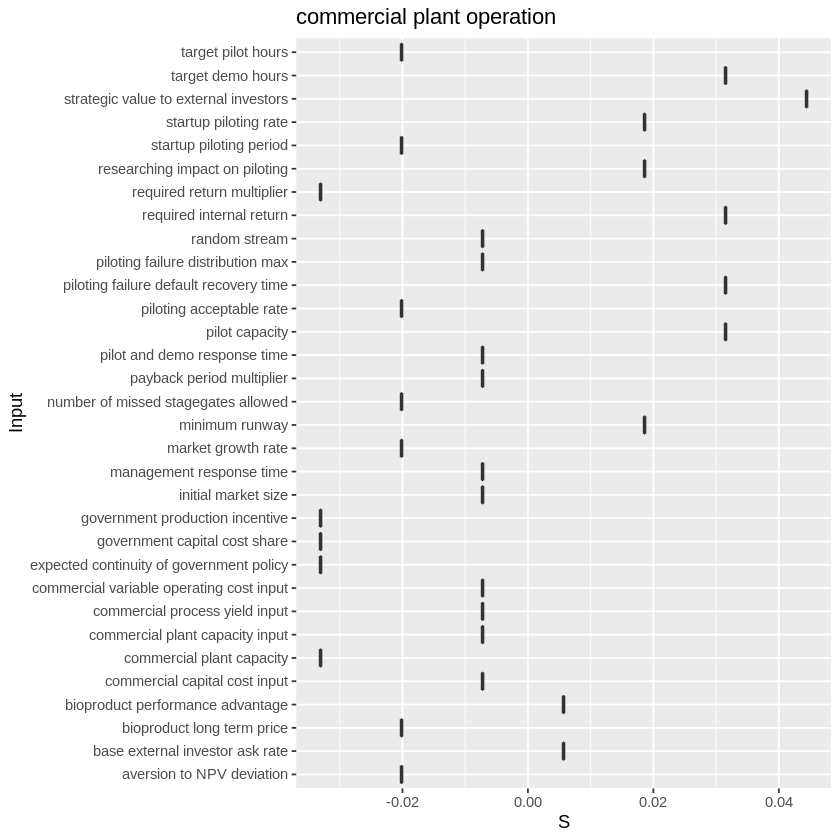

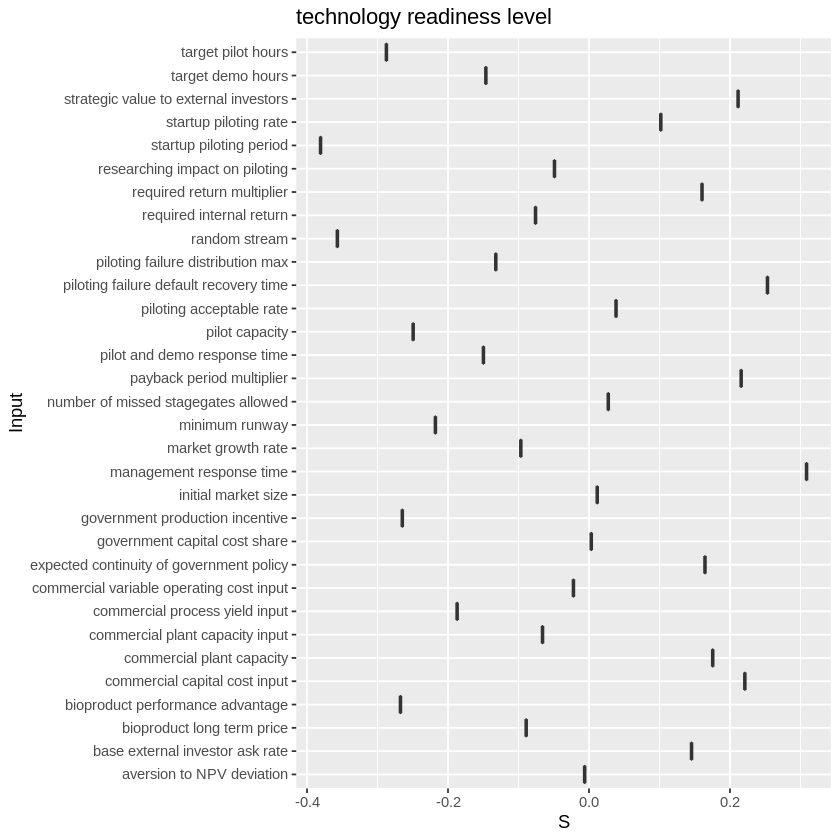

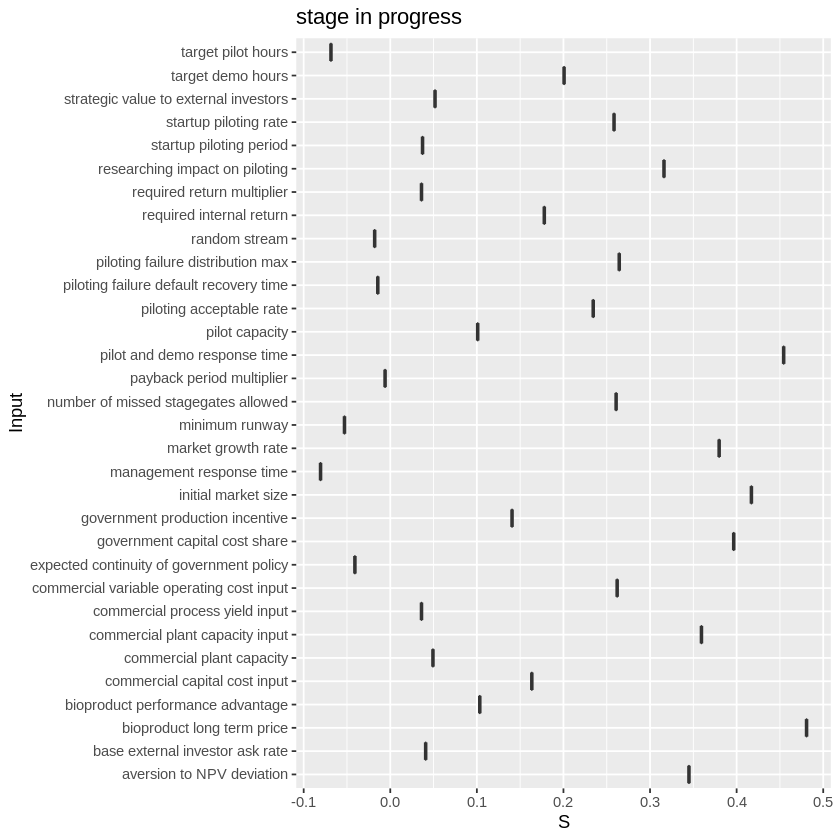

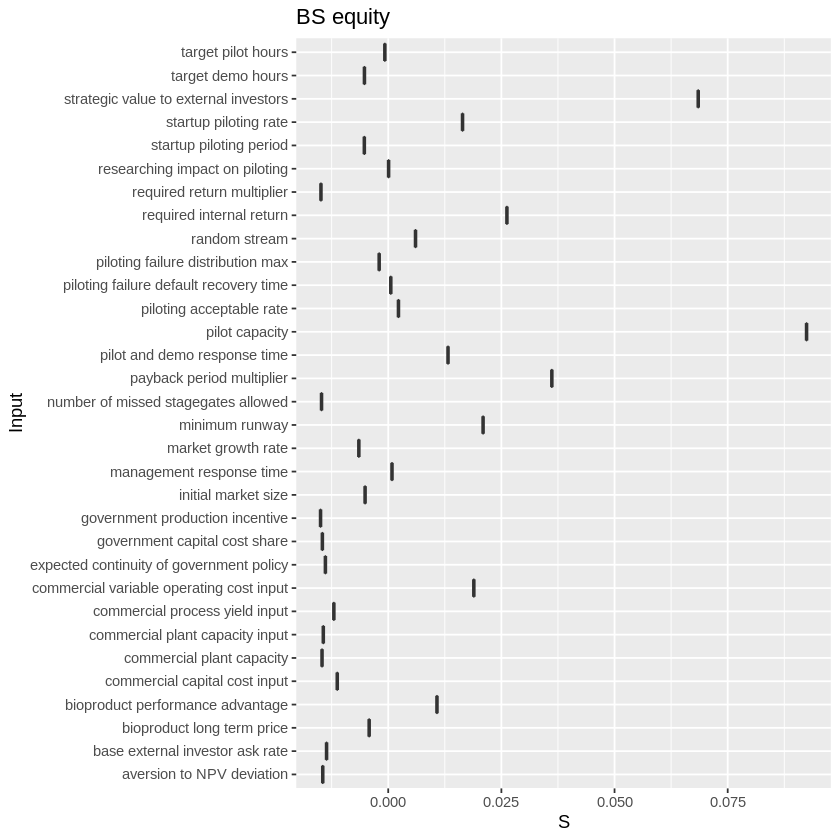

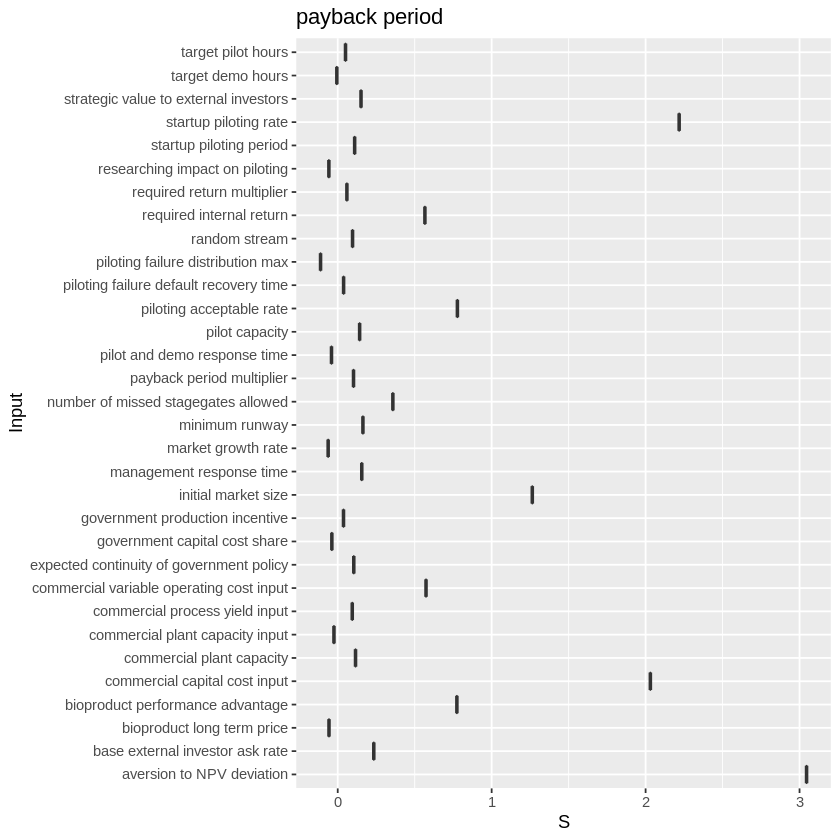

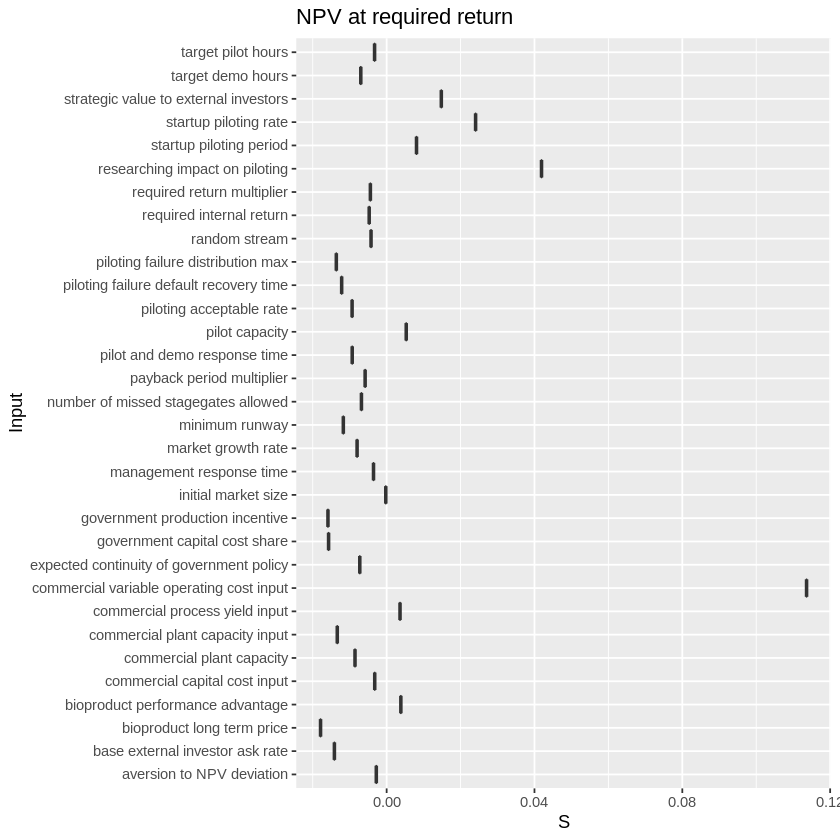

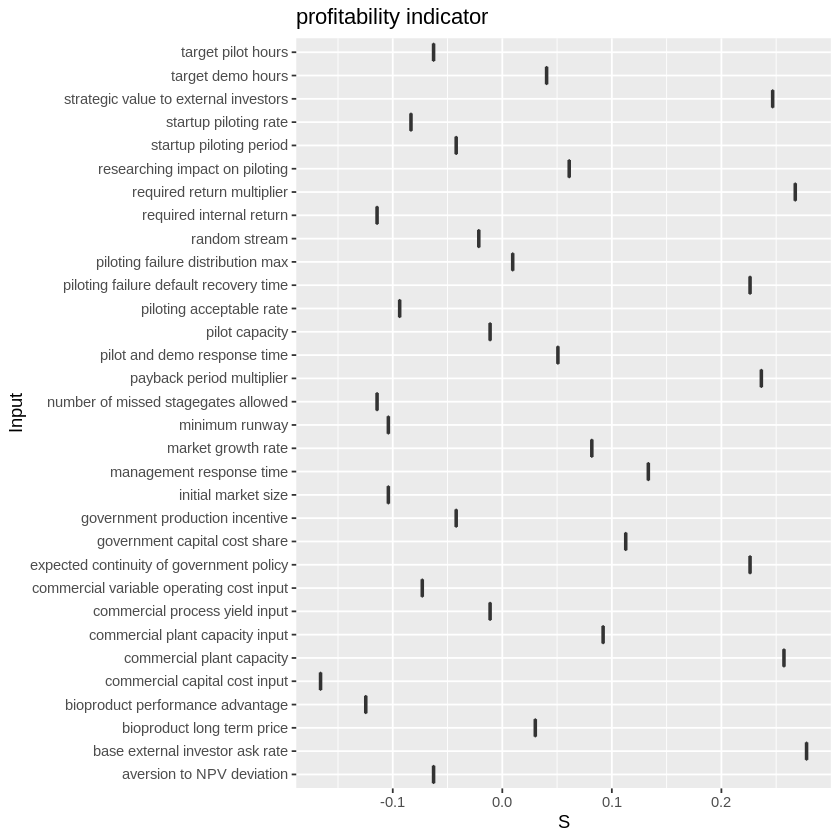

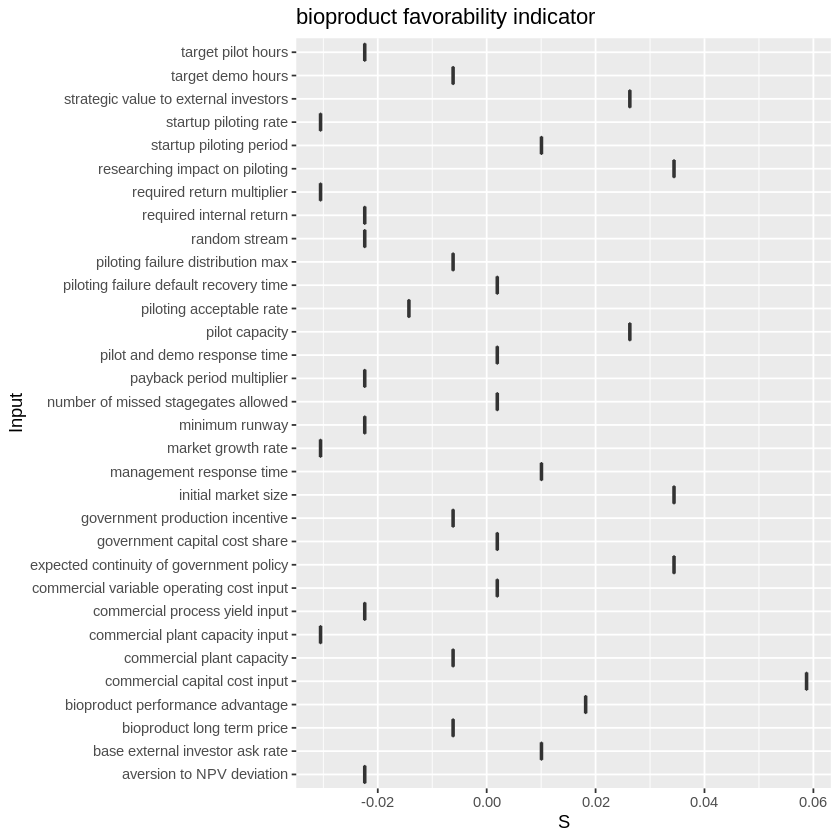

Warning message:
"Removed 3200 rows containing non-finite values (stat_boxplot)."

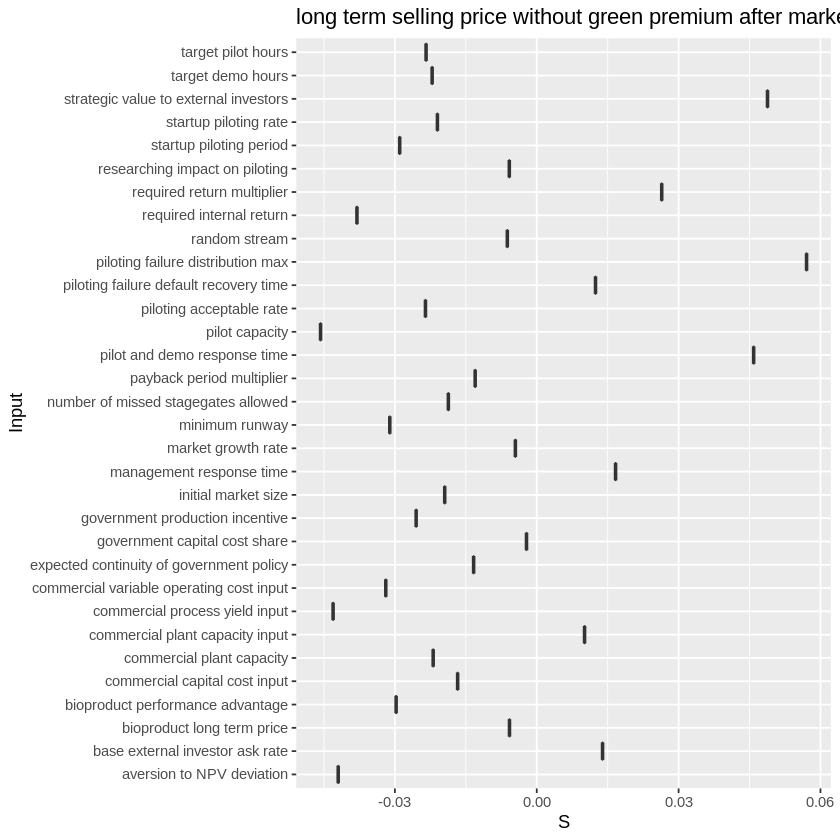

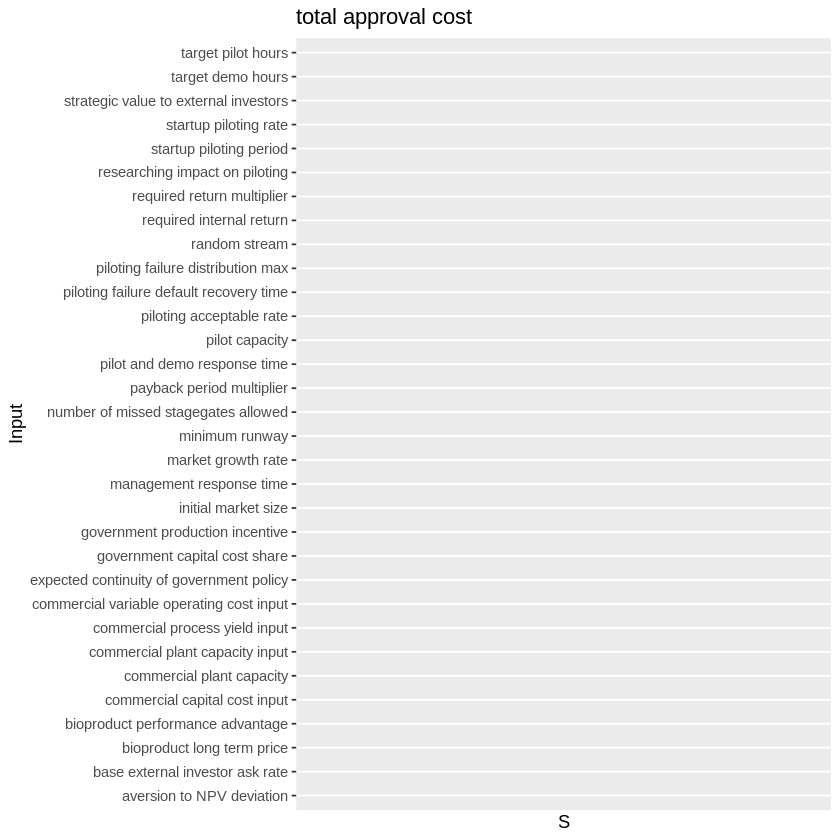

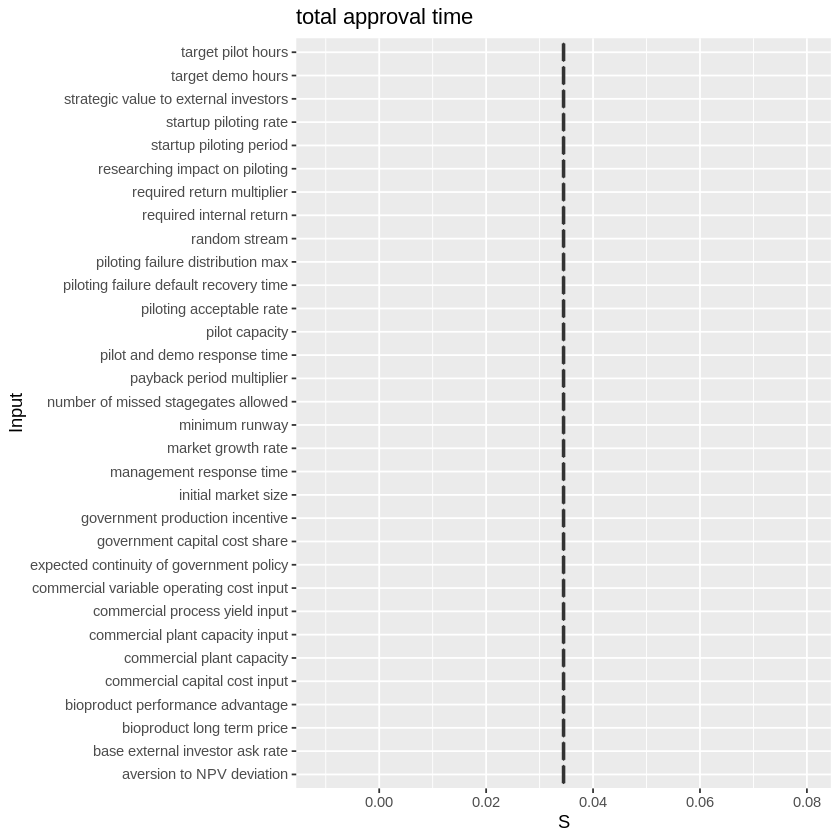

Warning message:
"Removed 3200 rows containing non-finite values (stat_boxplot)."

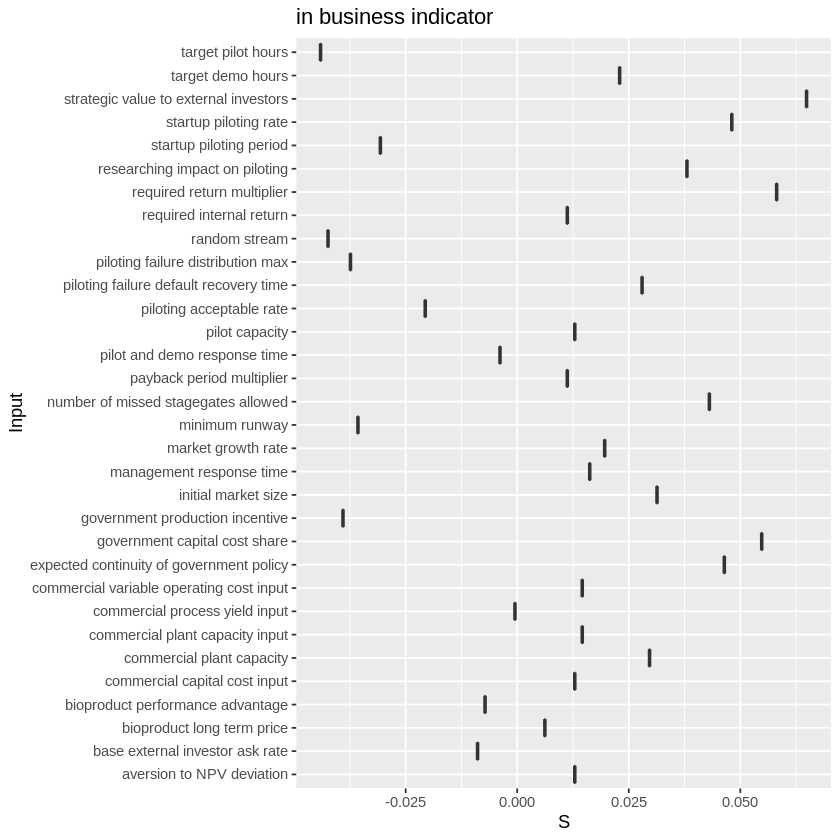

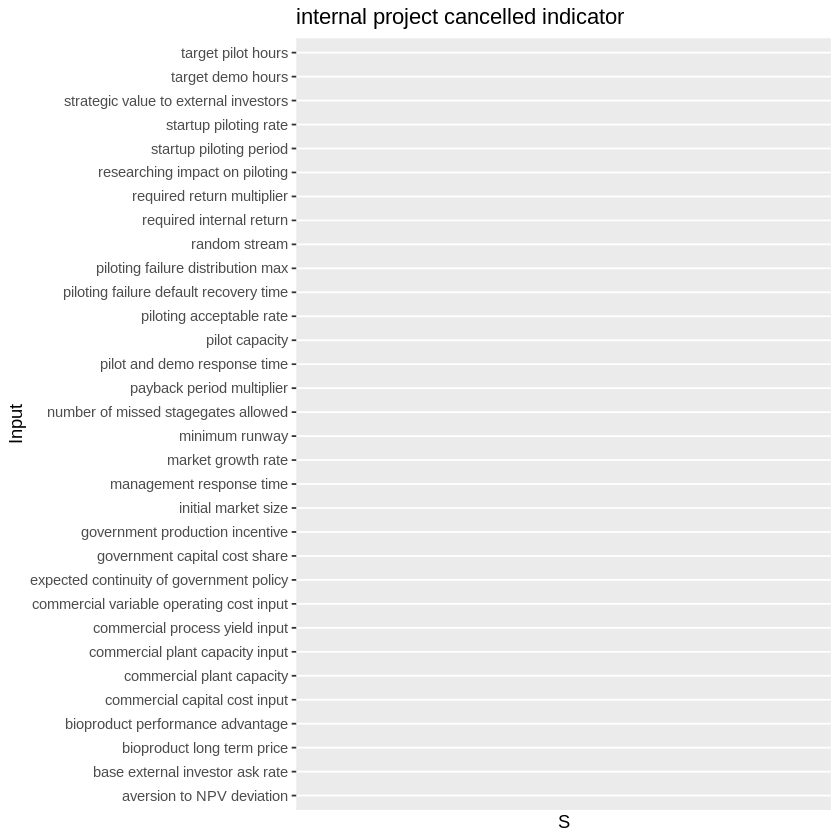

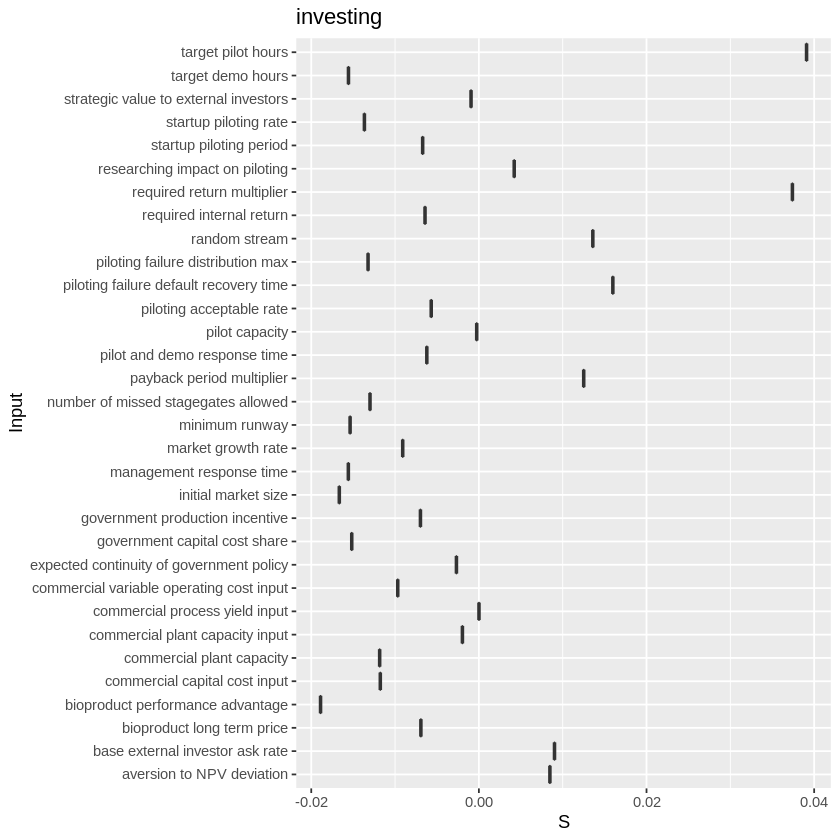

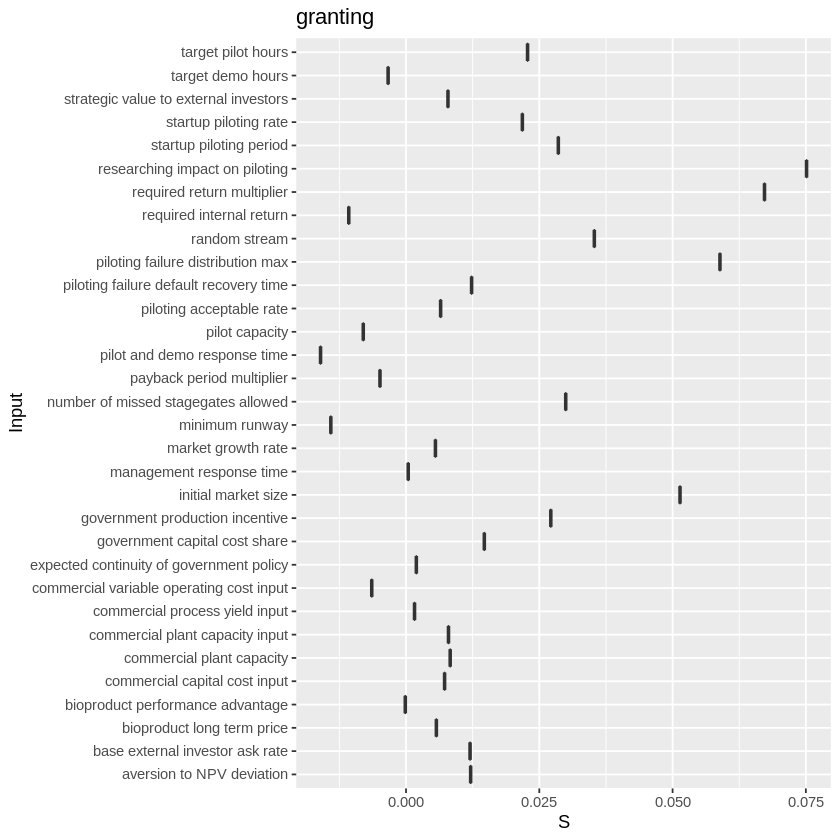

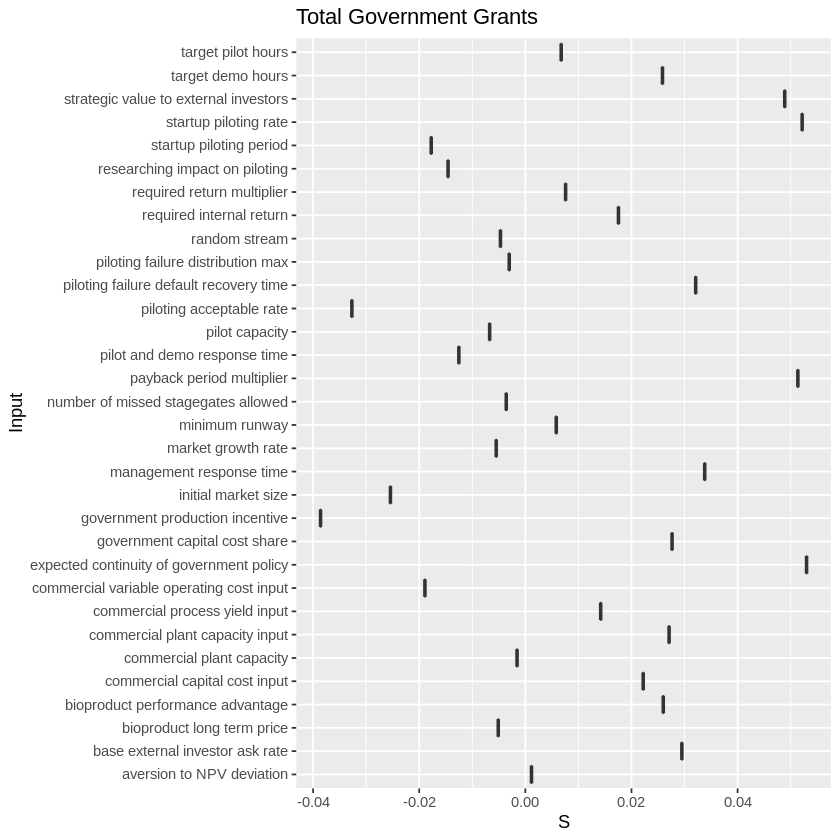

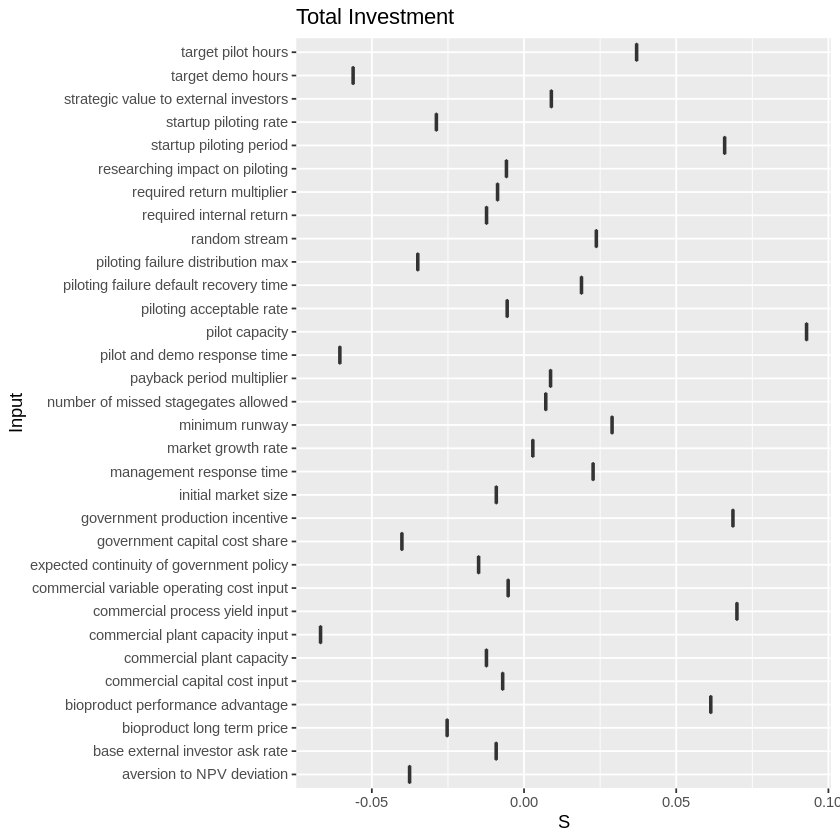

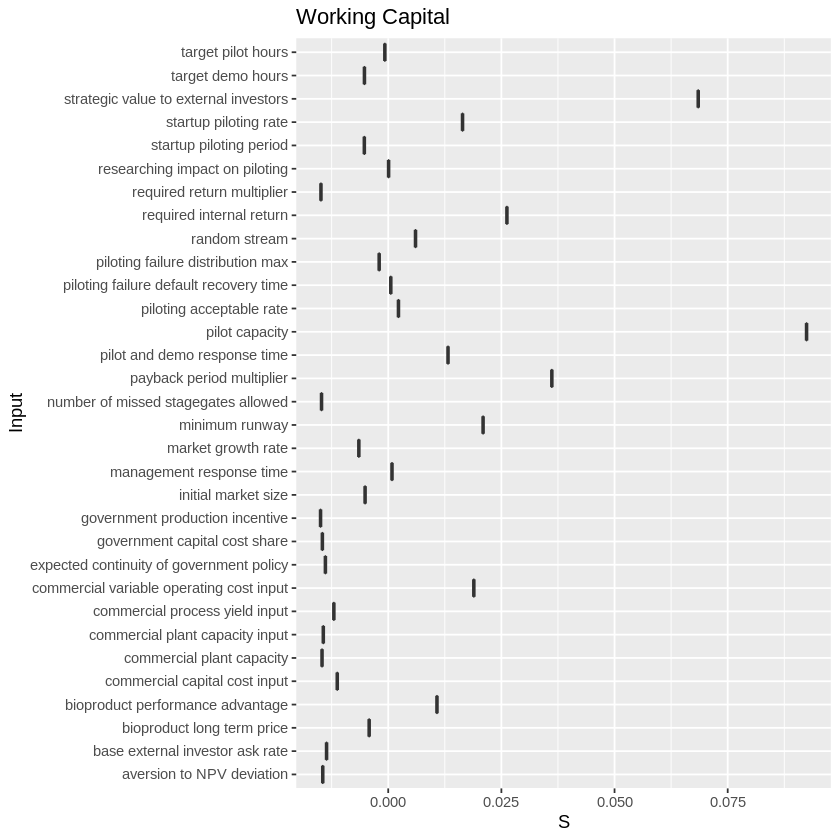

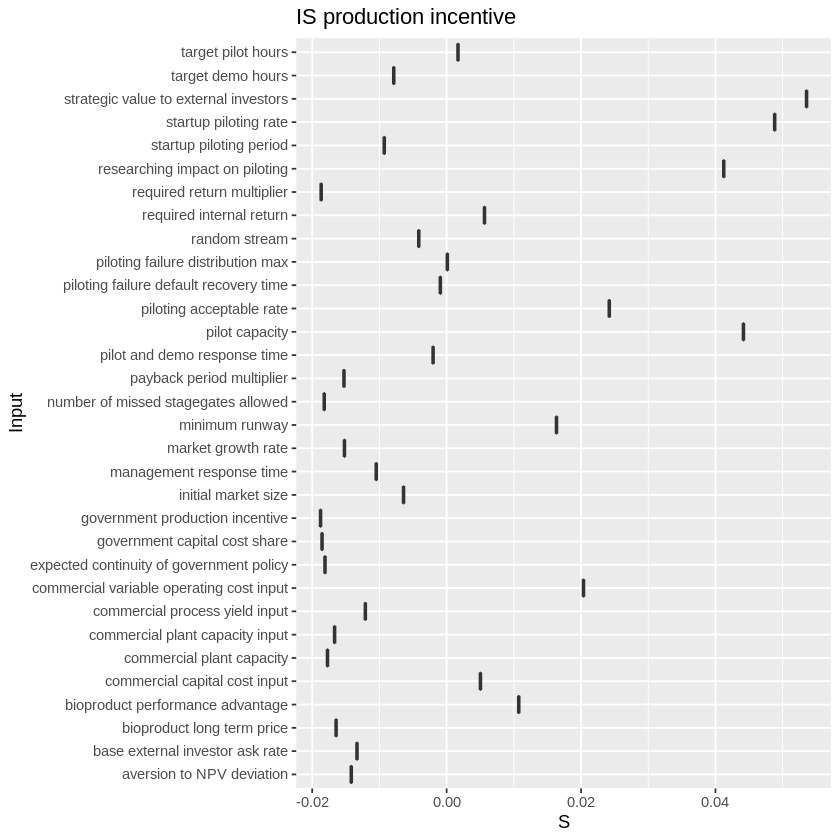

In [52]:
for (output in z.sens.boot[, unique(Output)]) {
    g <- ggplot(z.sens.boot[Output == output], aes(x=Input, y=S)) +
        geom_boxplot() +
        coord_flip() +
        ggtitle(output)
    print(g)
}

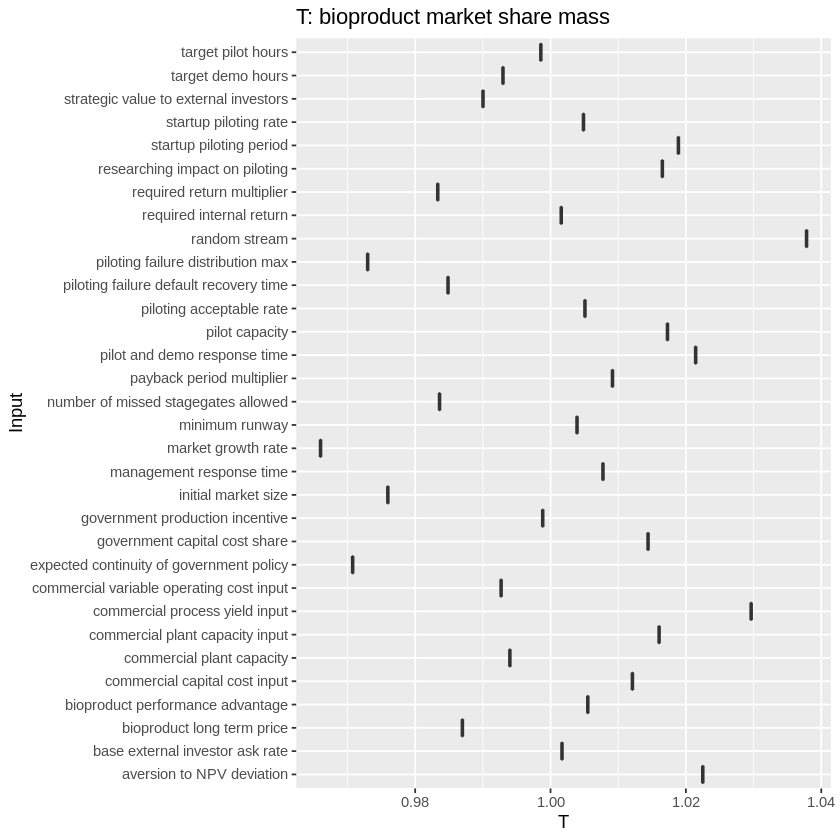

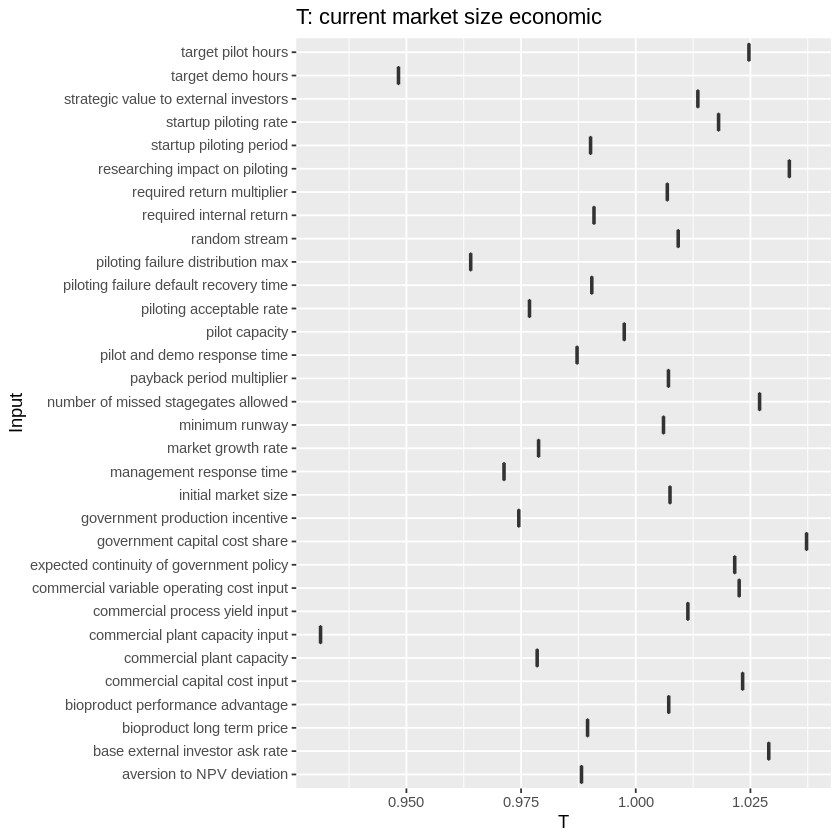

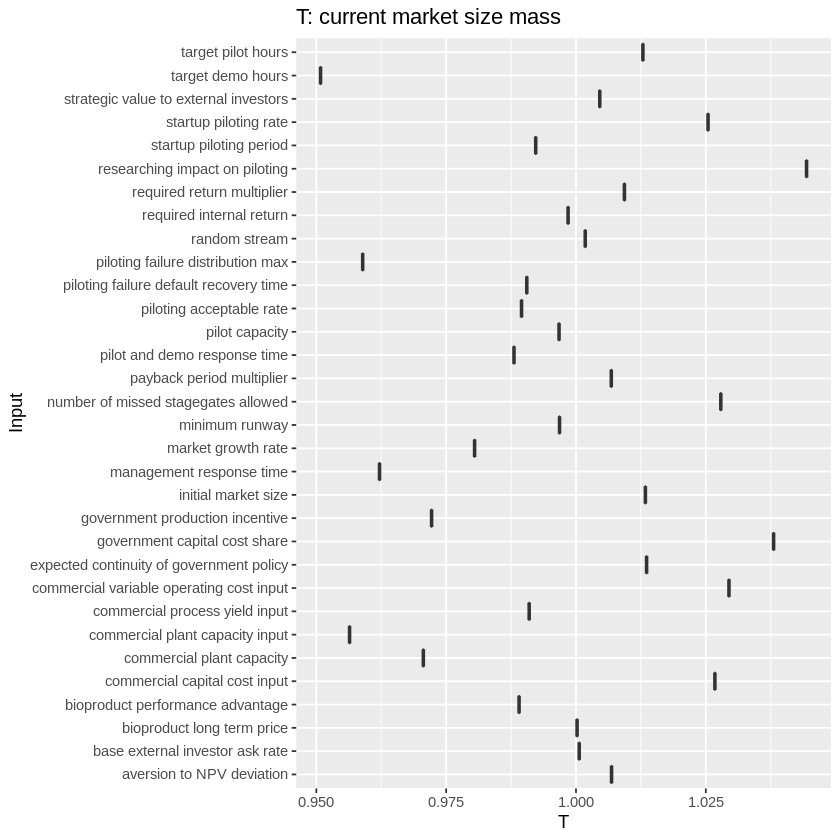

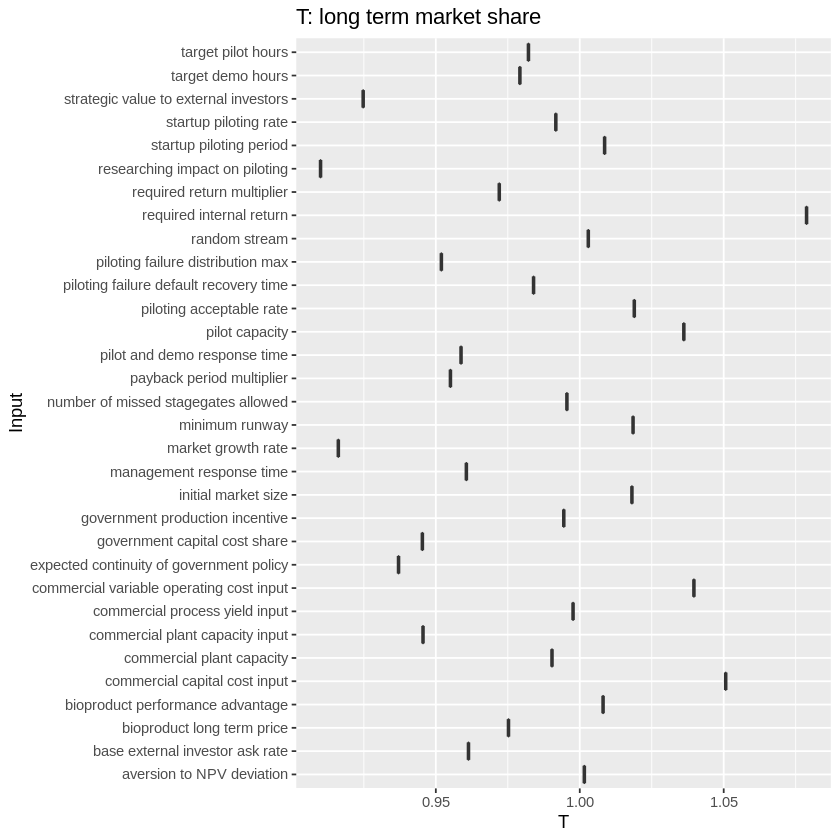

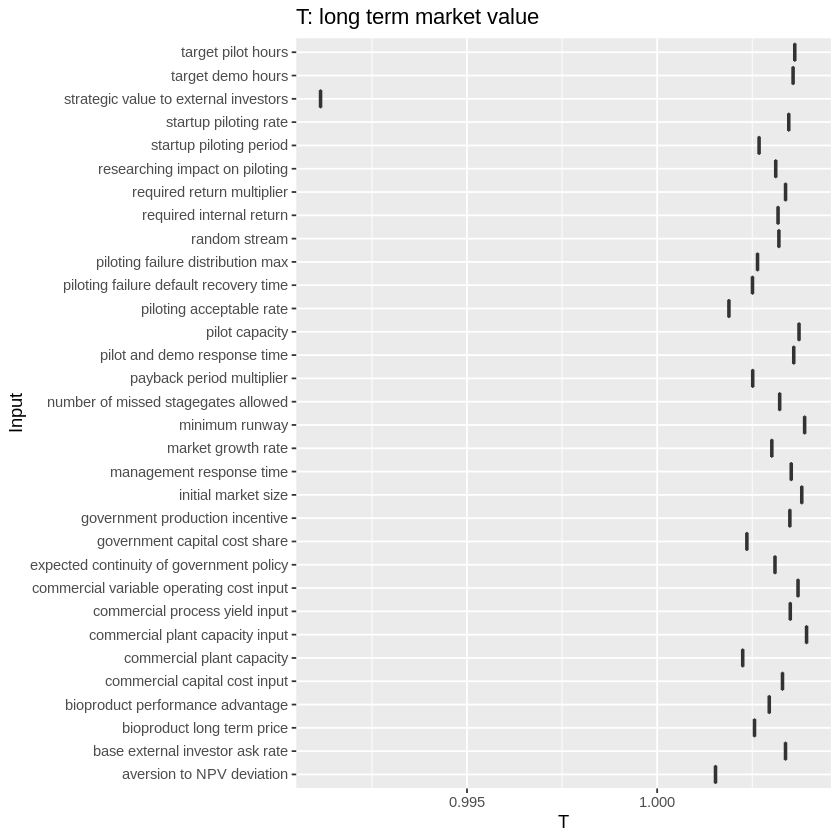

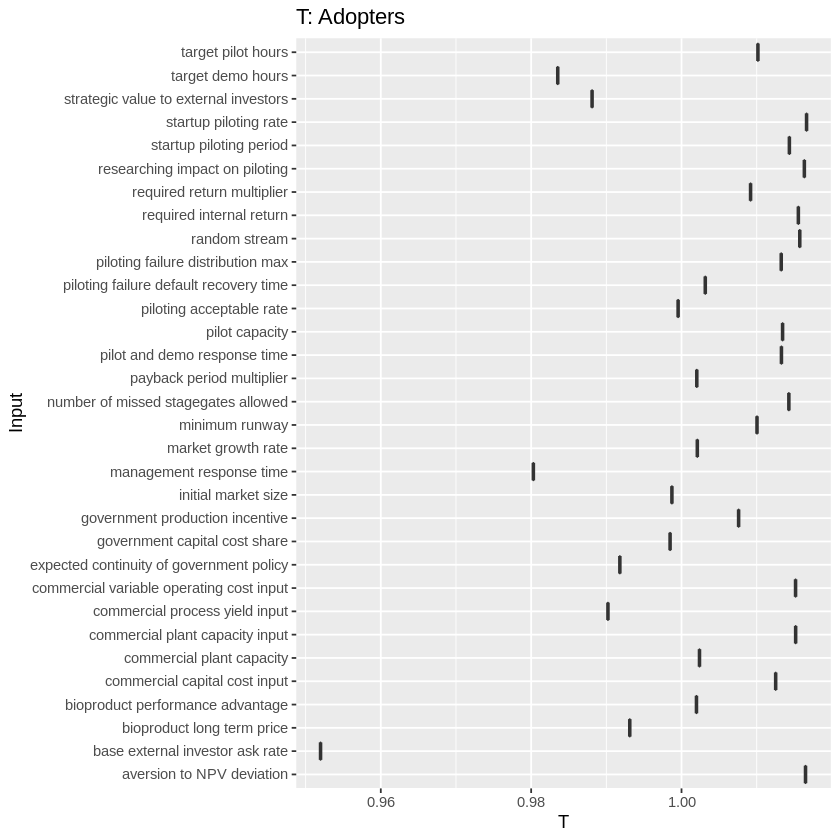

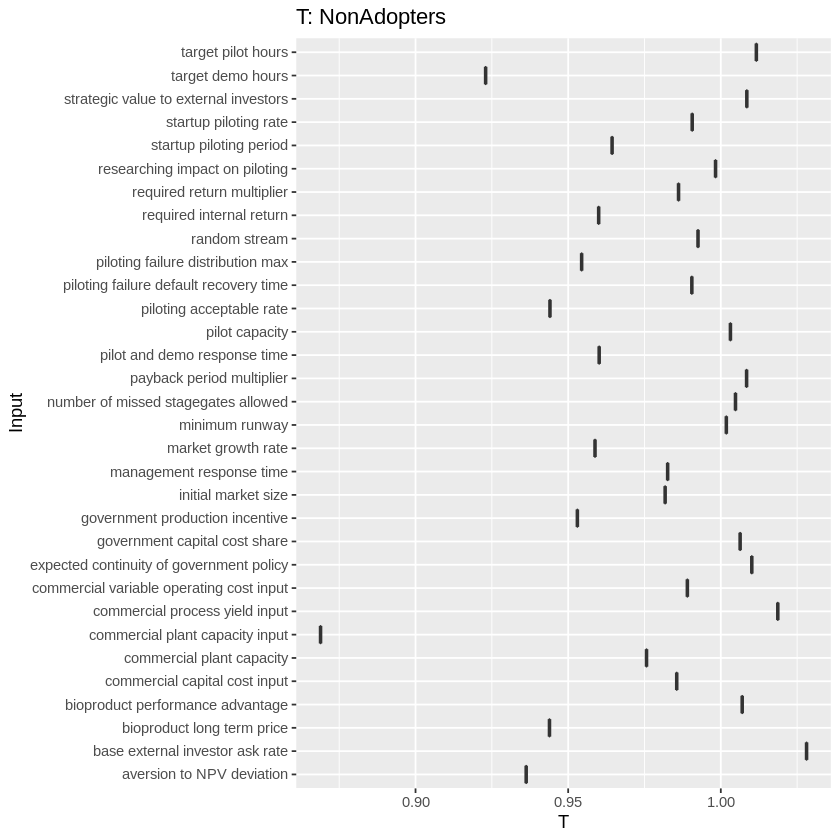

Warning message:
"Removed 3200 rows containing non-finite values (stat_boxplot)."

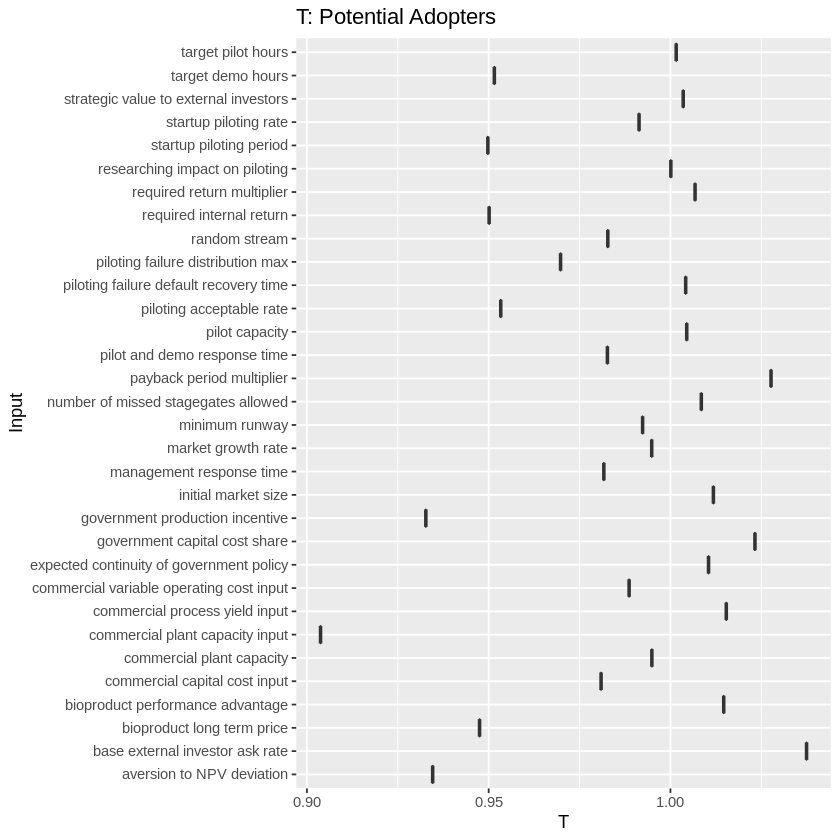

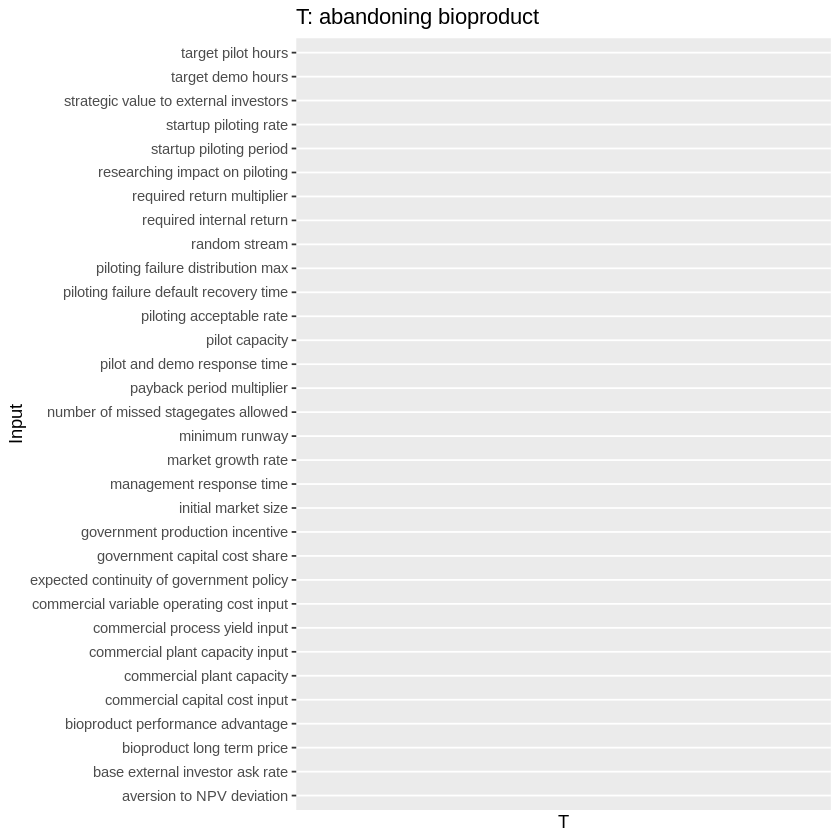

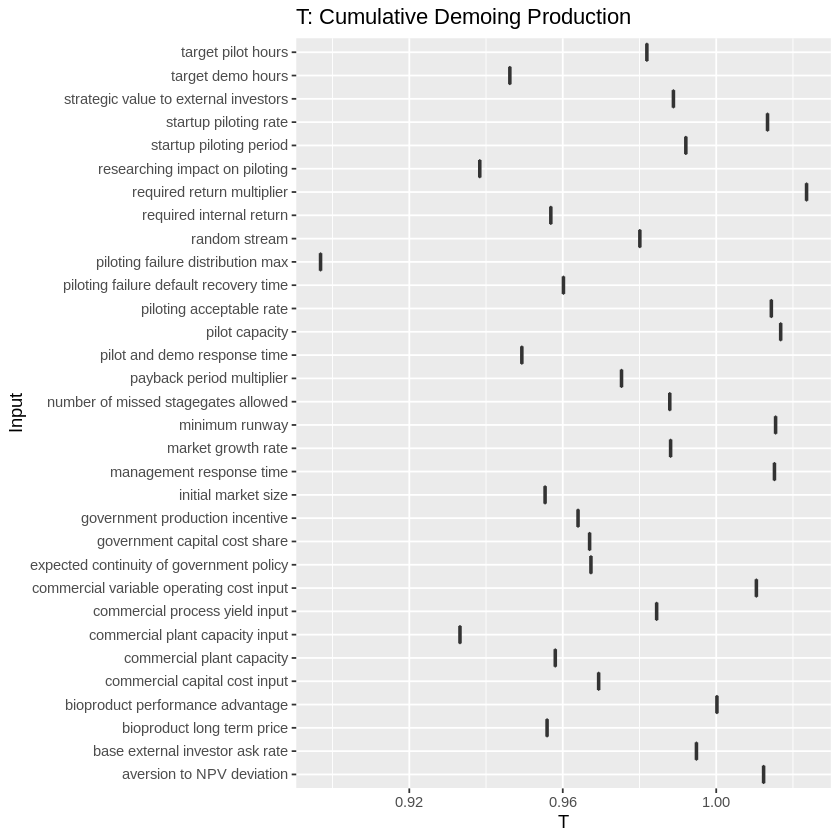

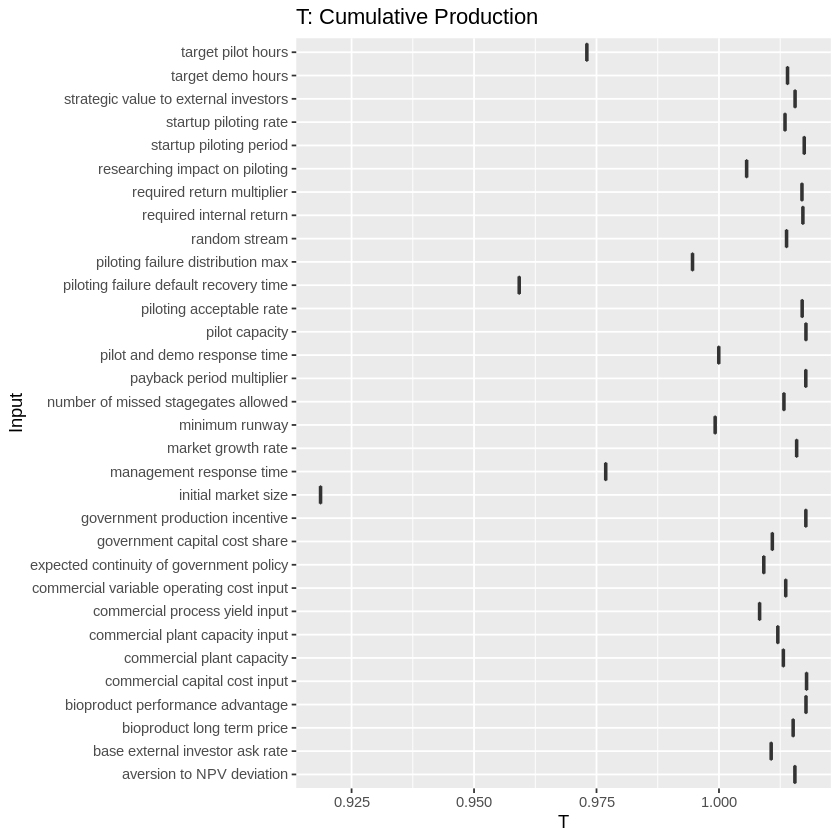

Warning message:
"Removed 3200 rows containing non-finite values (stat_boxplot)."

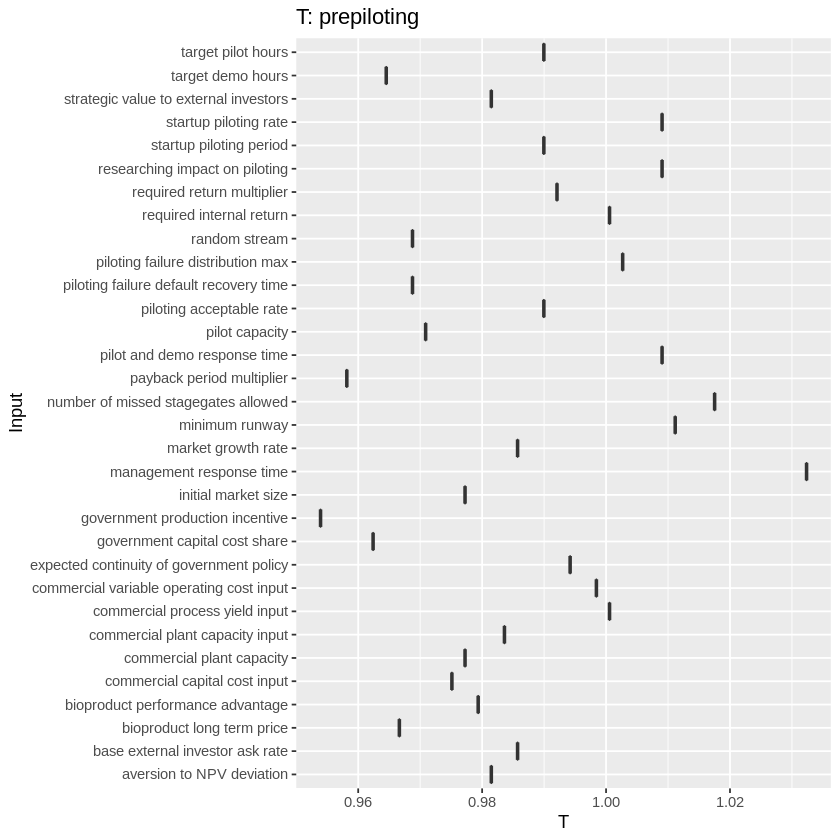

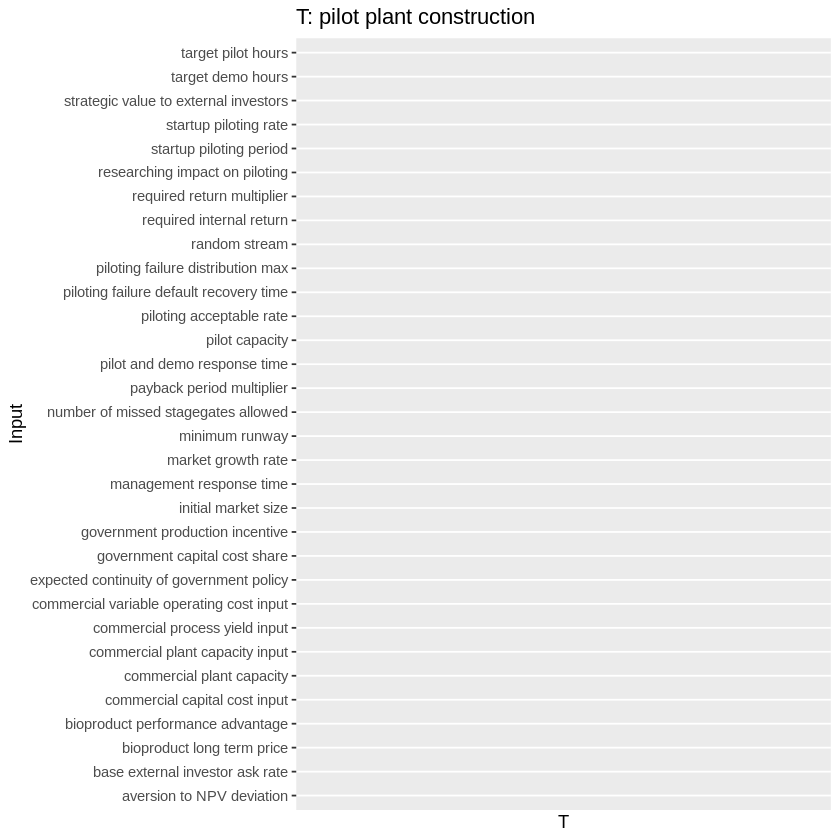

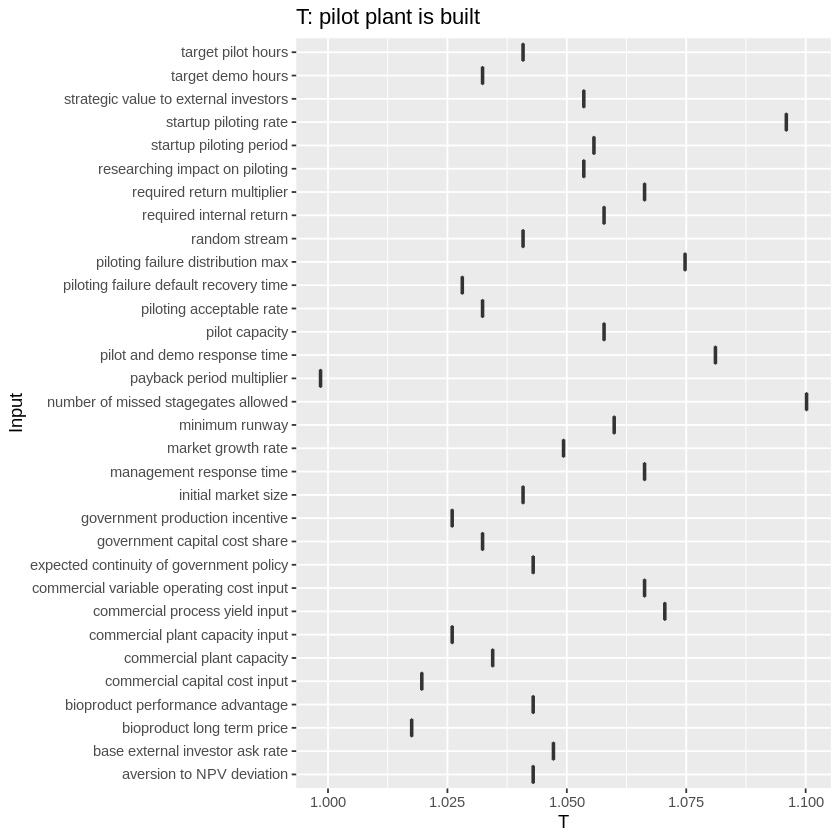

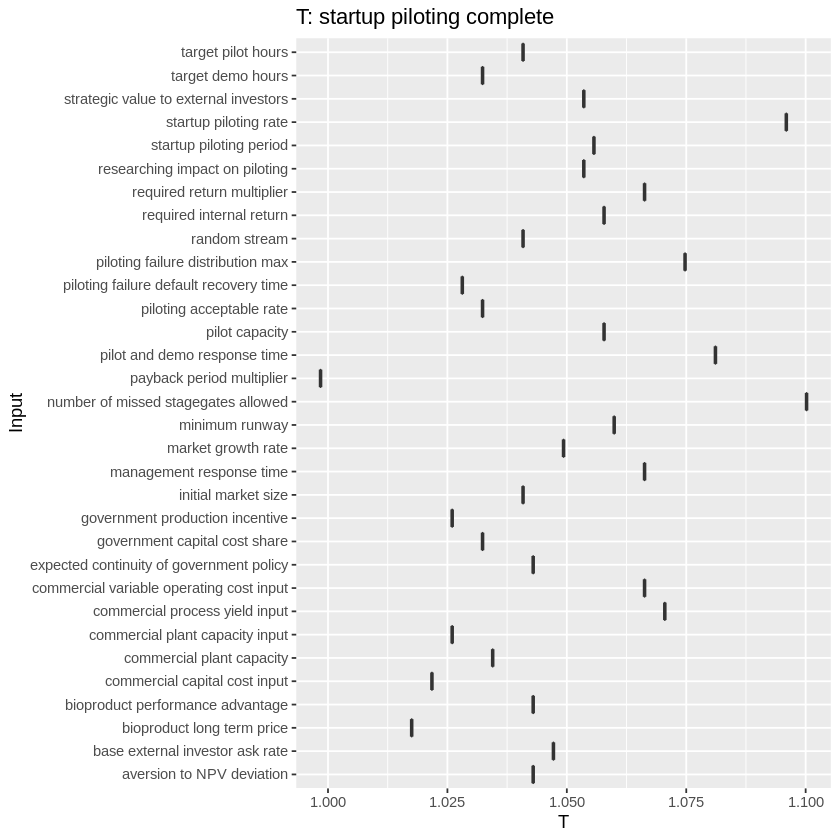

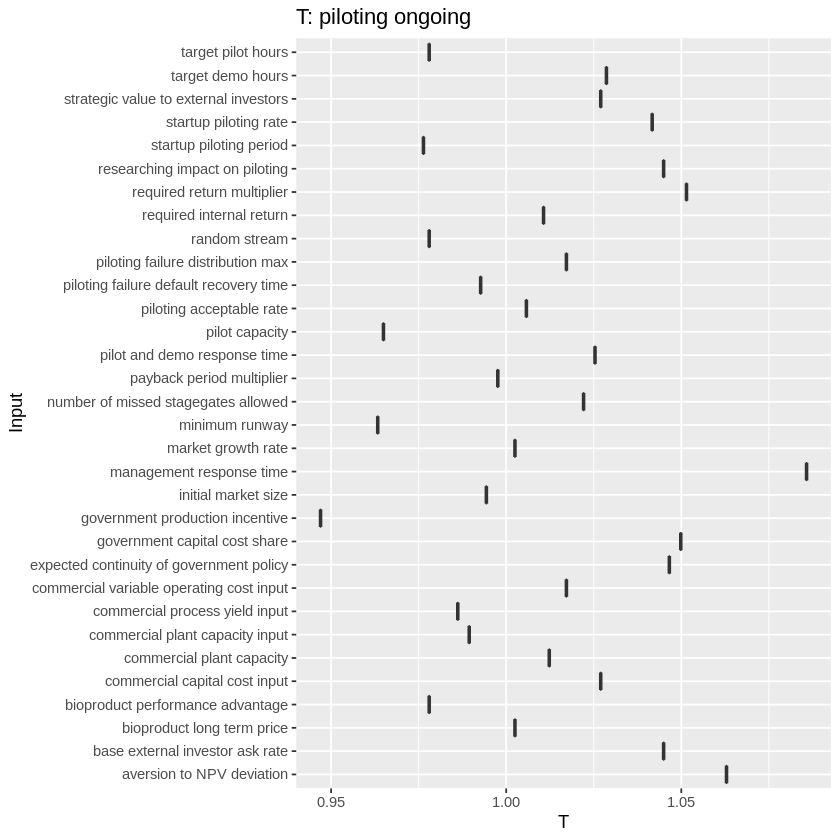

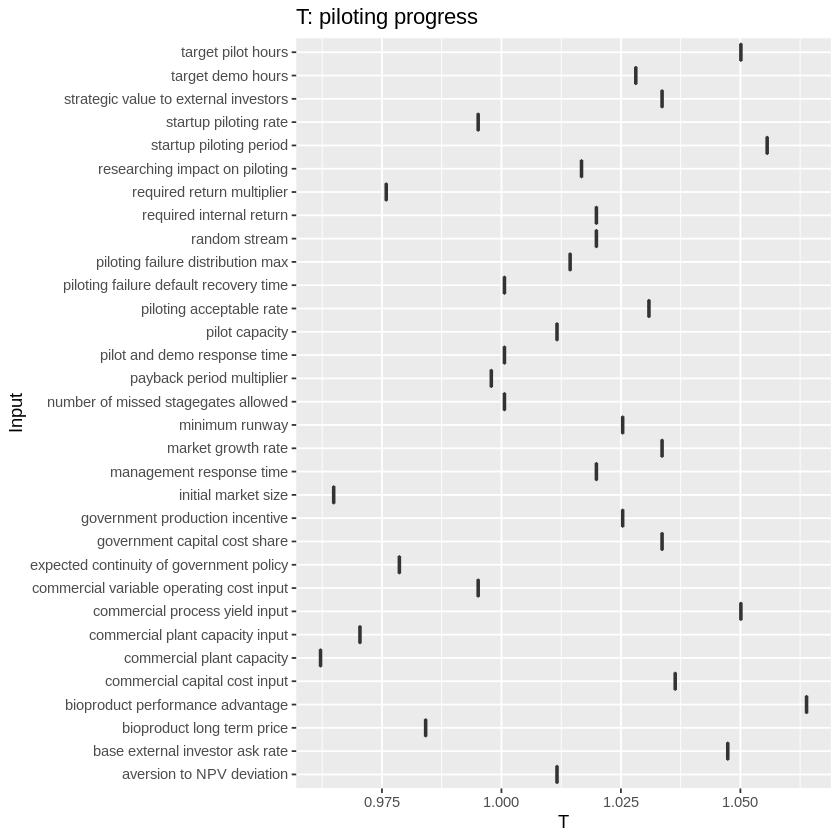

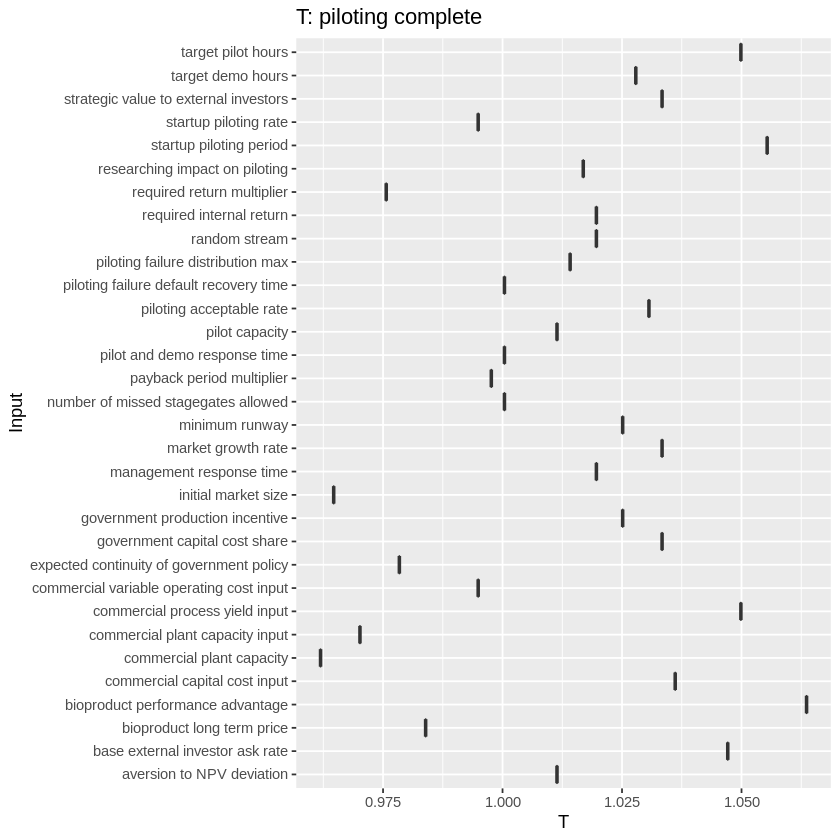

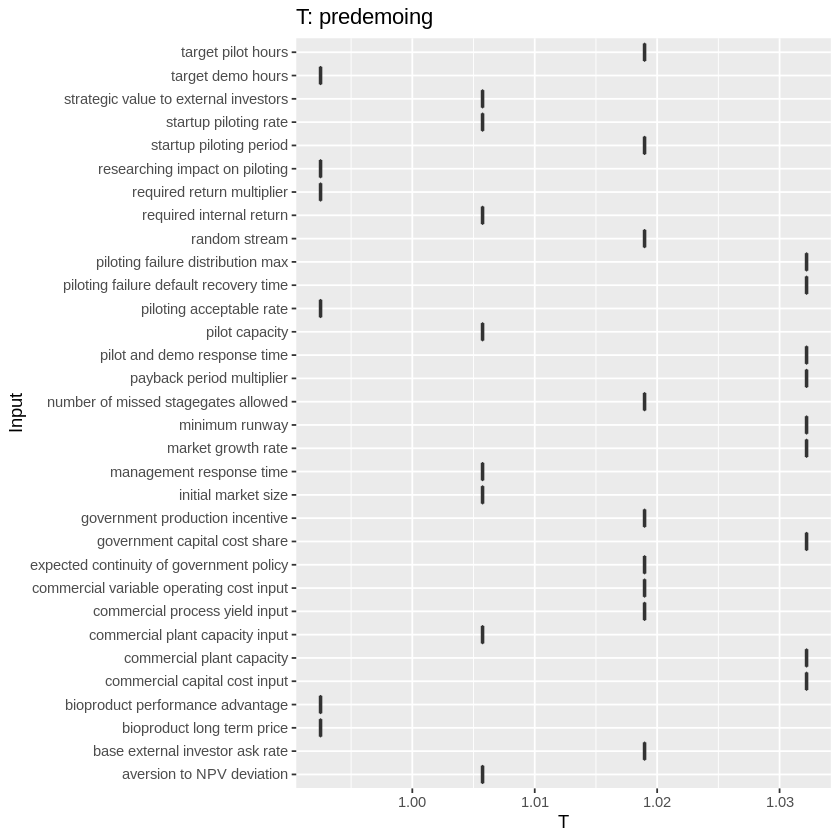

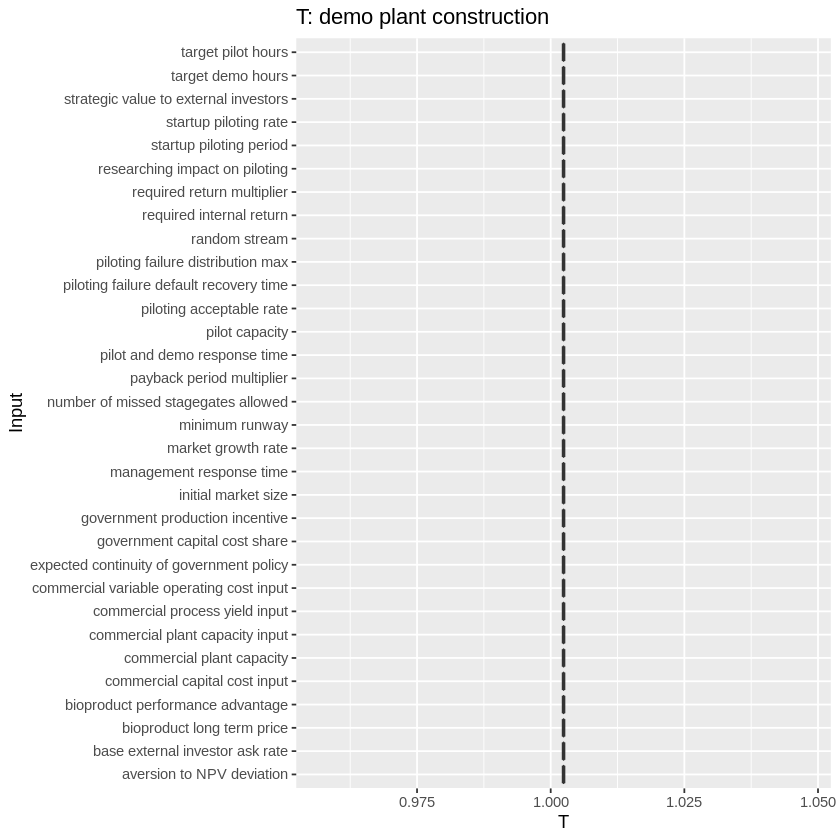

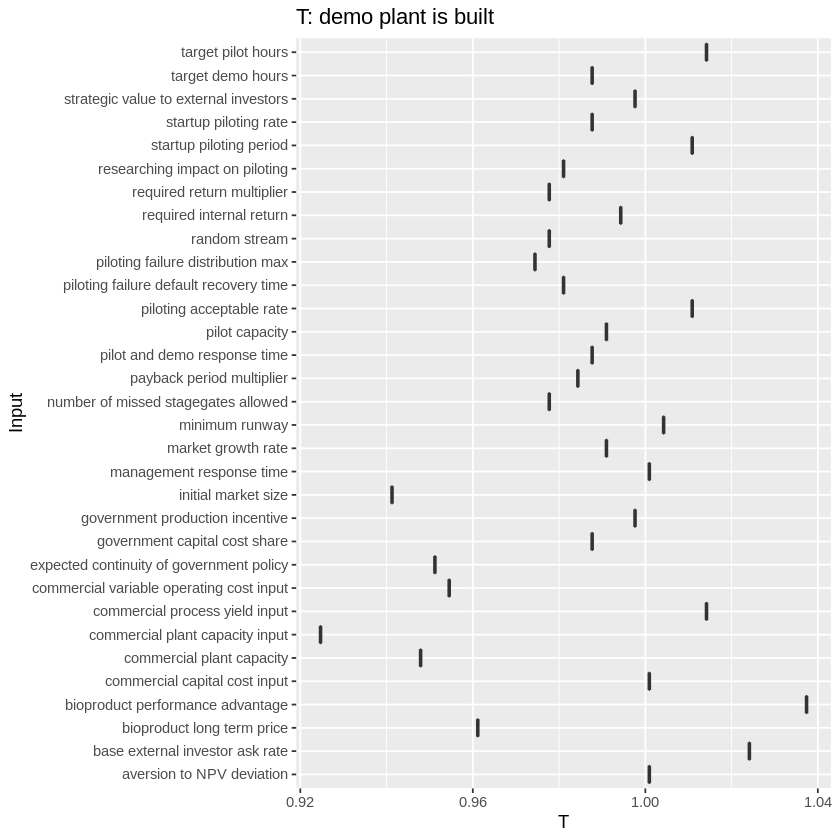

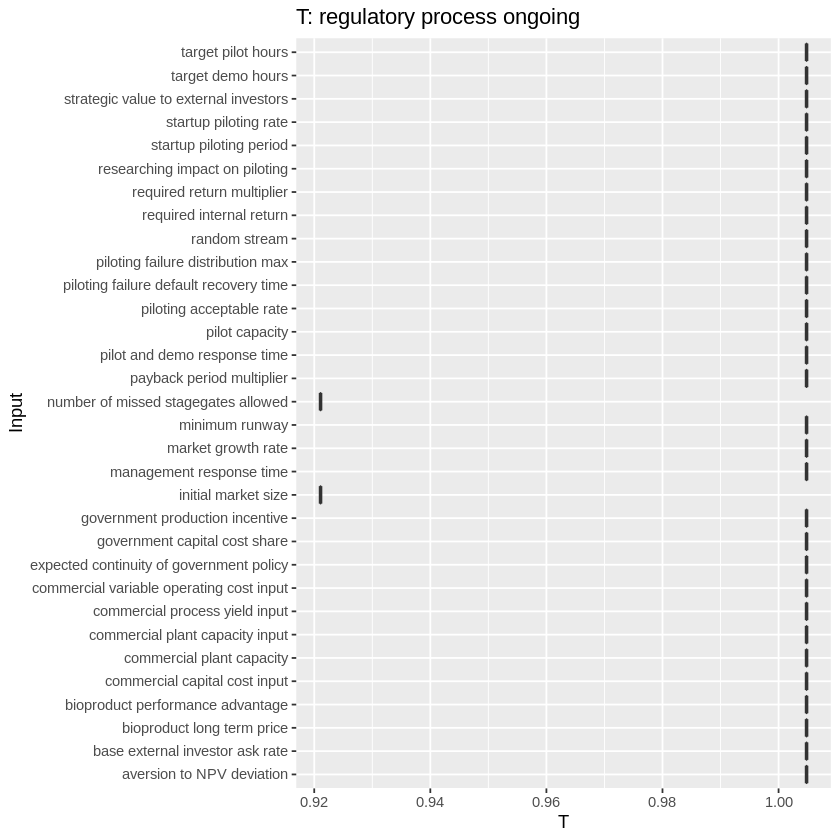

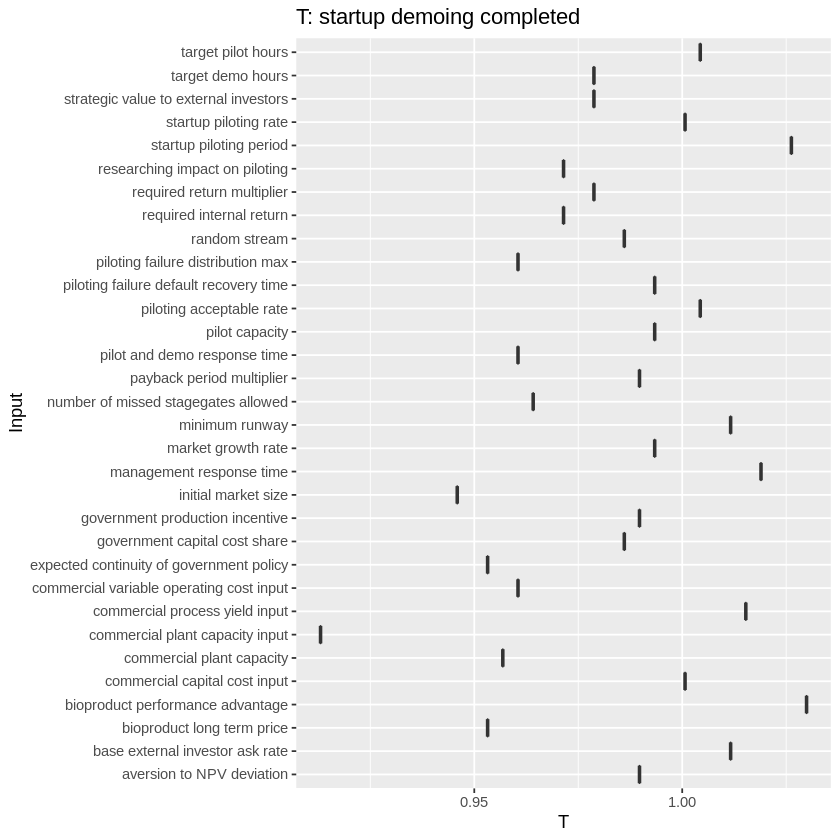

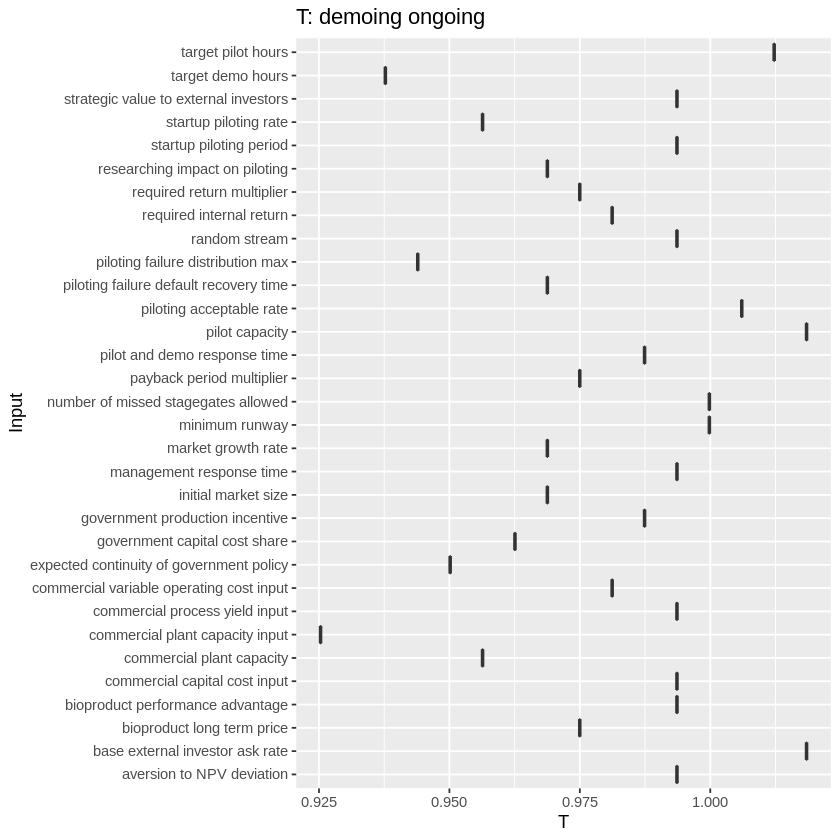

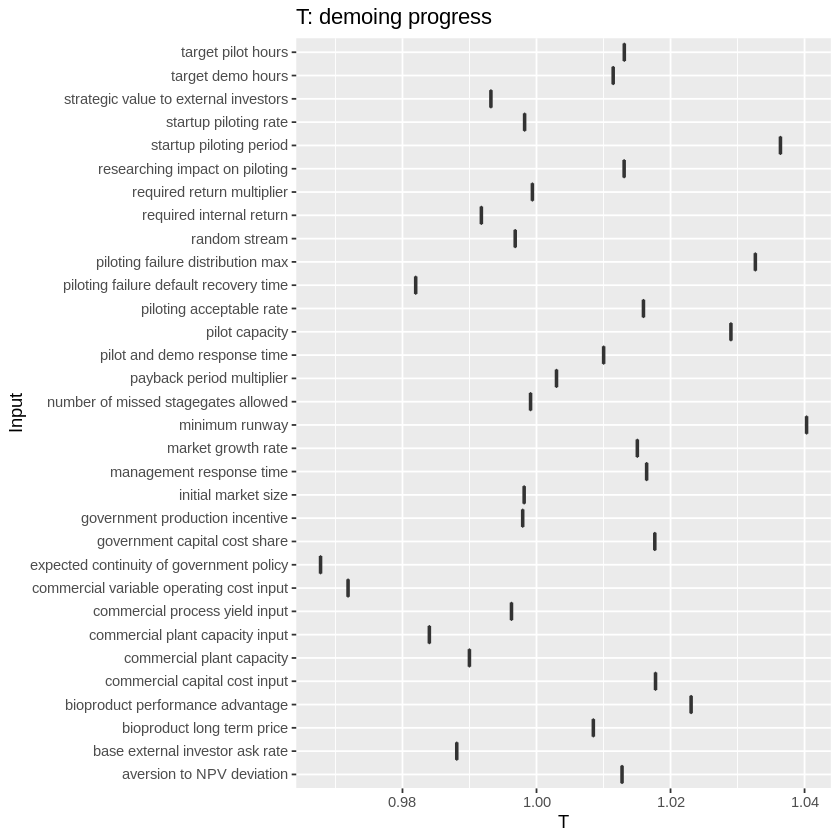

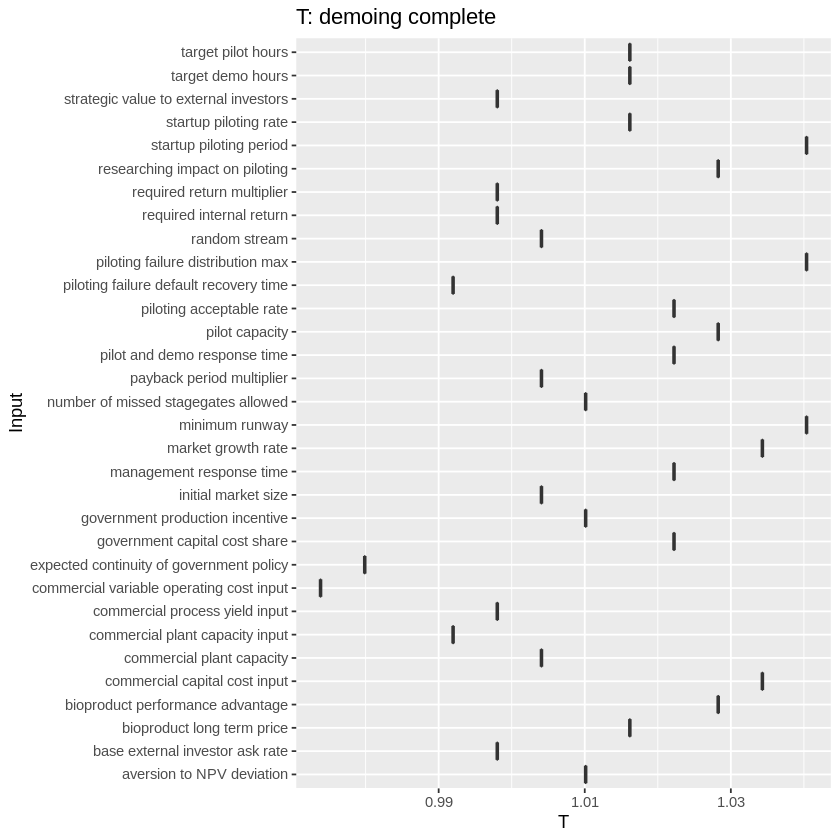

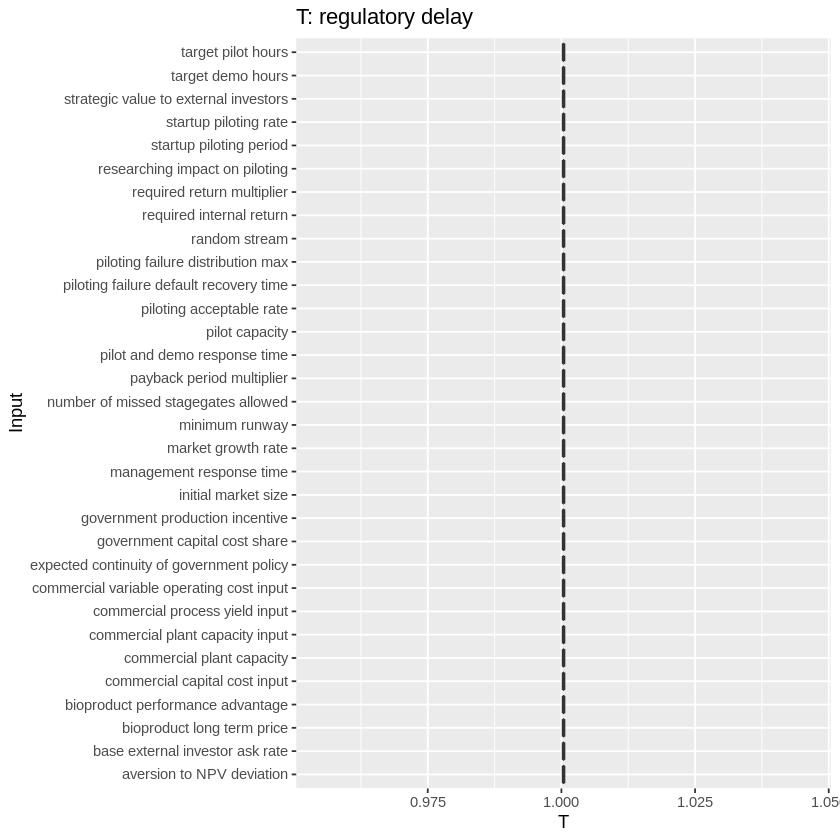

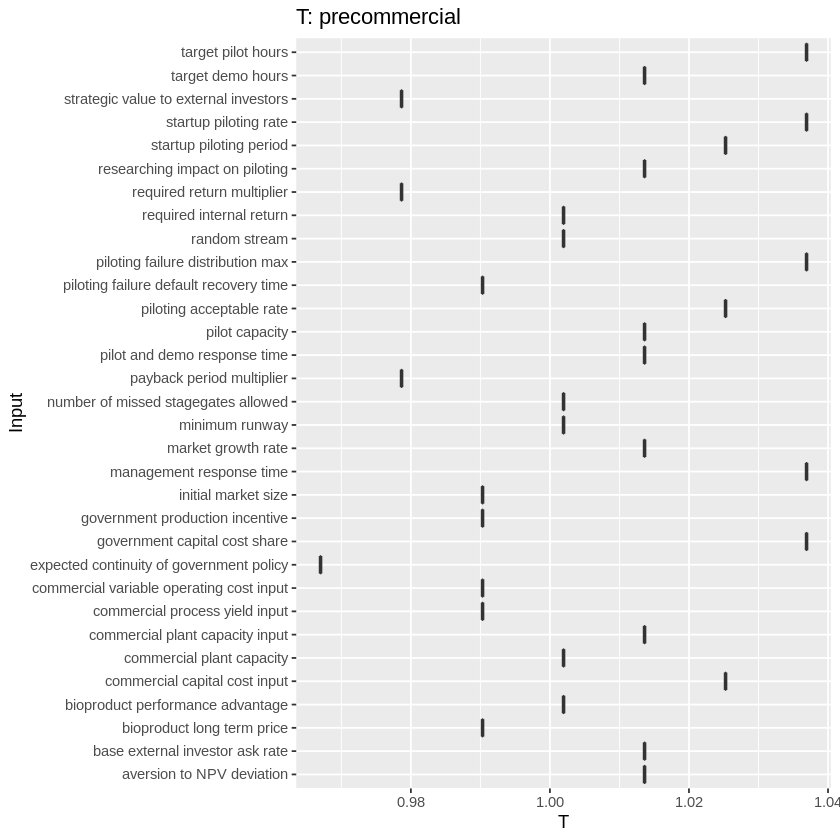

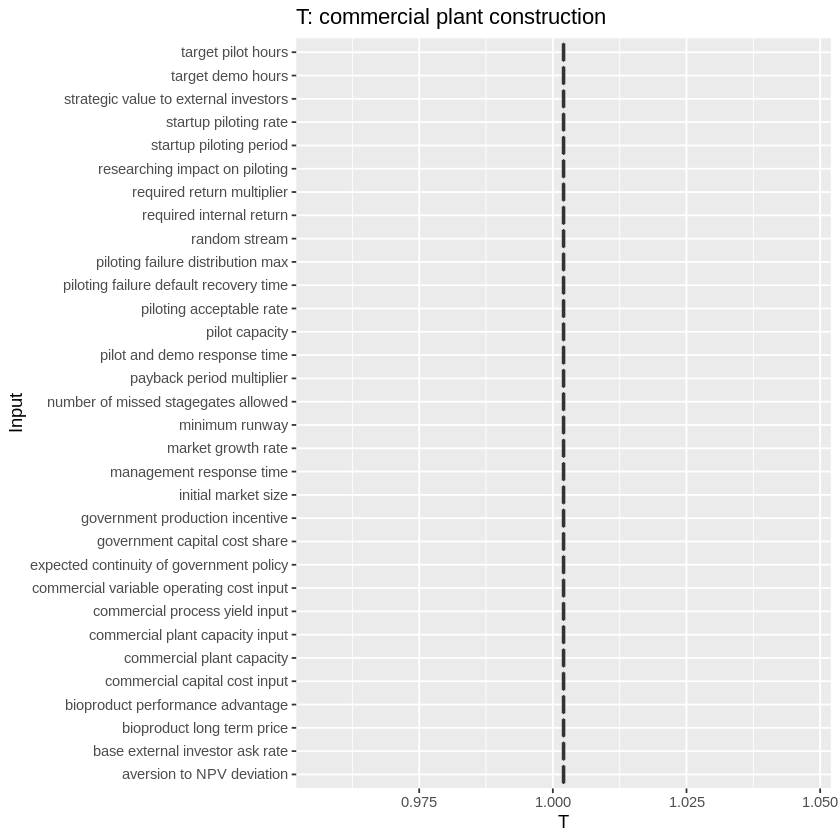

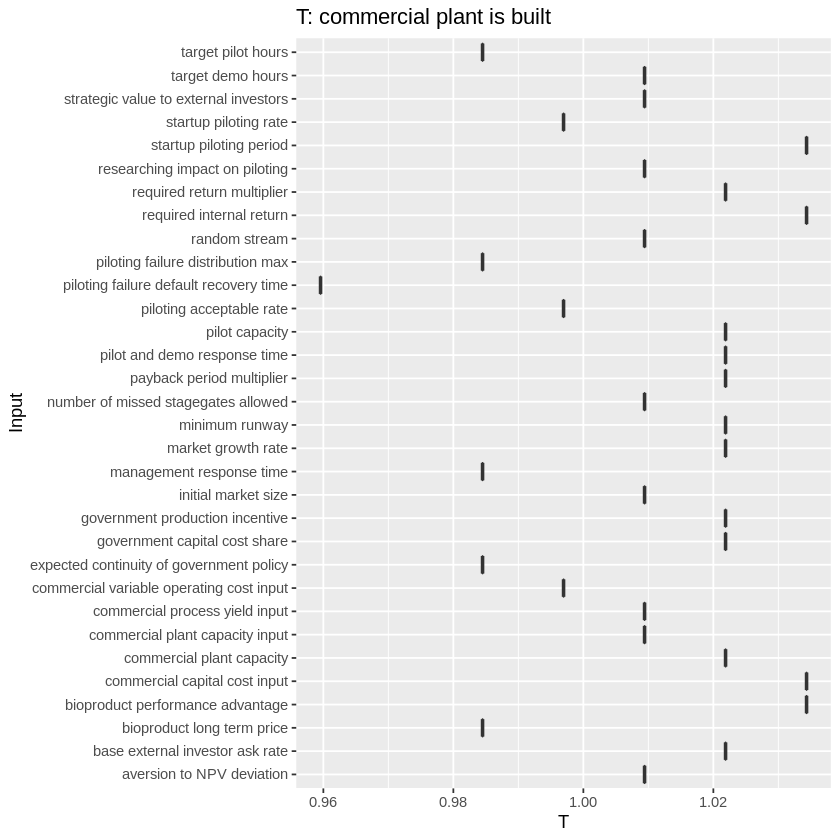

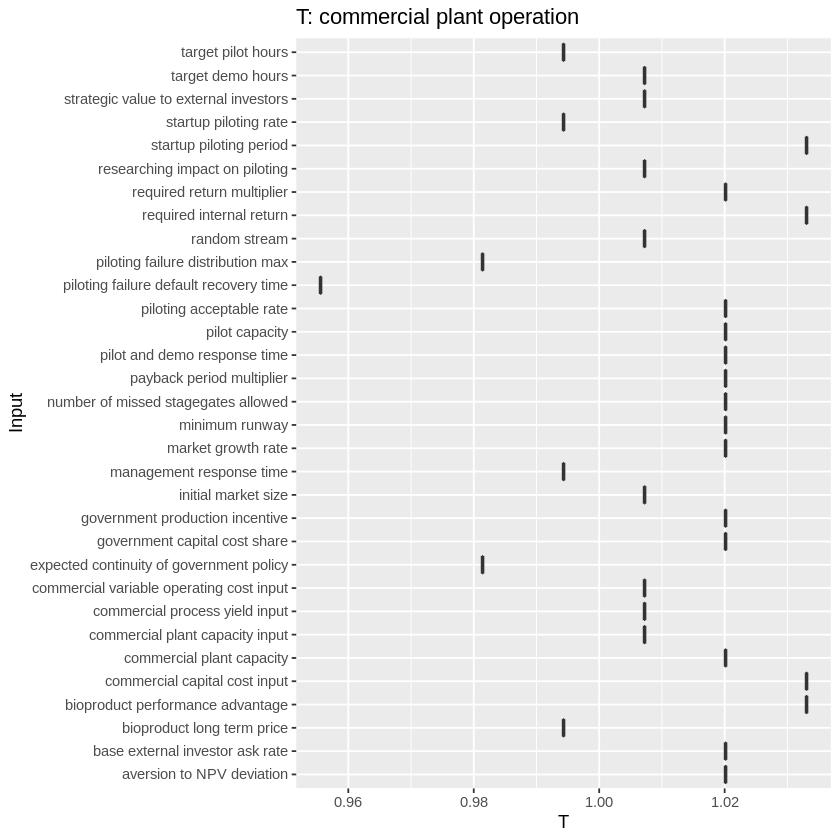

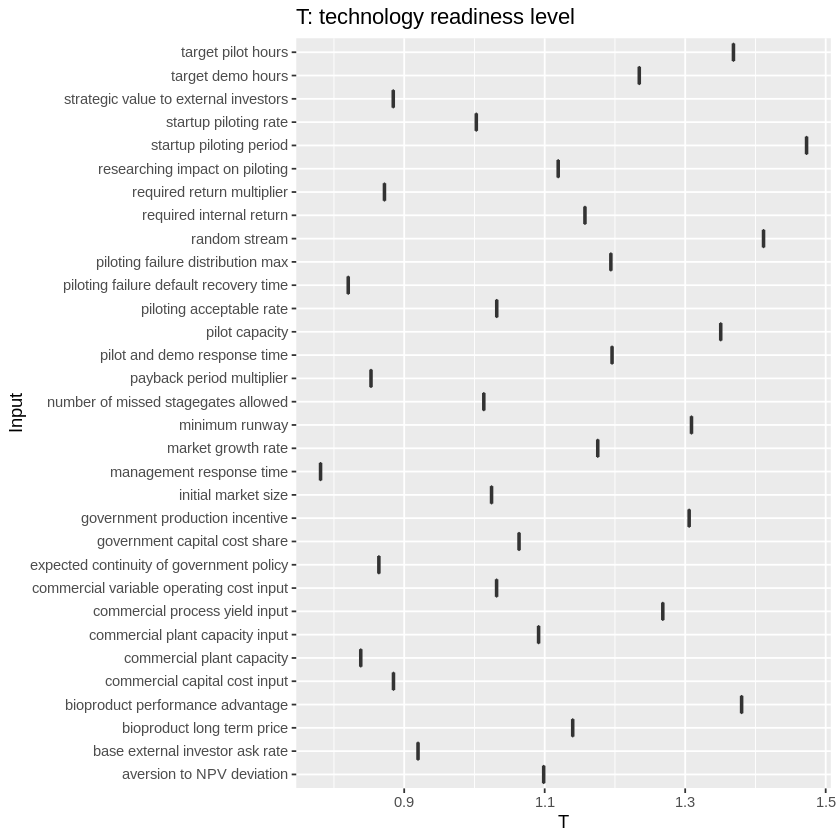

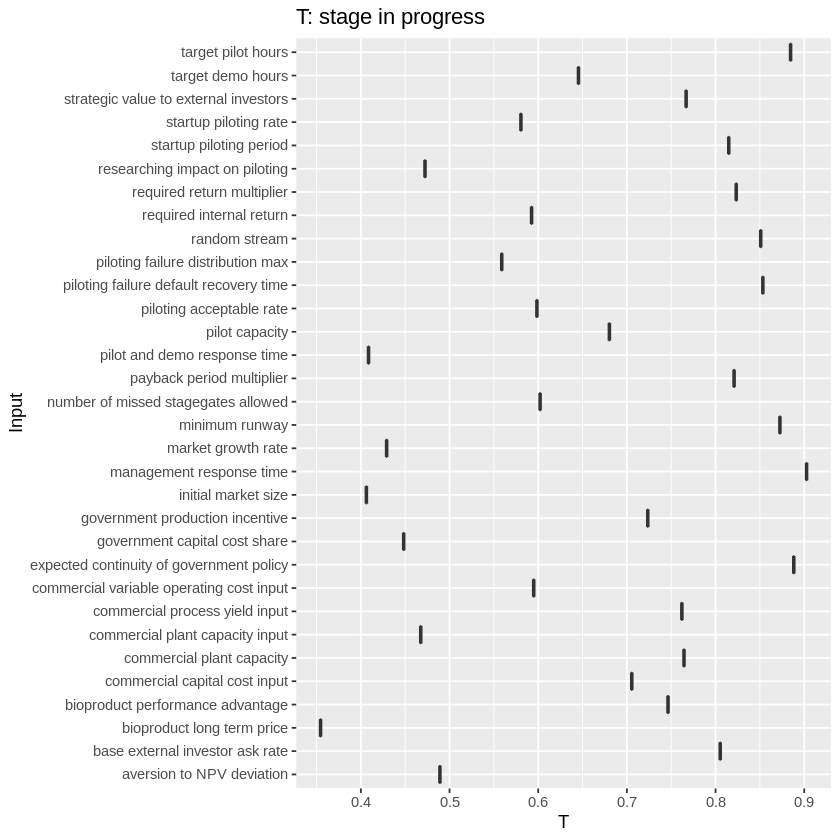

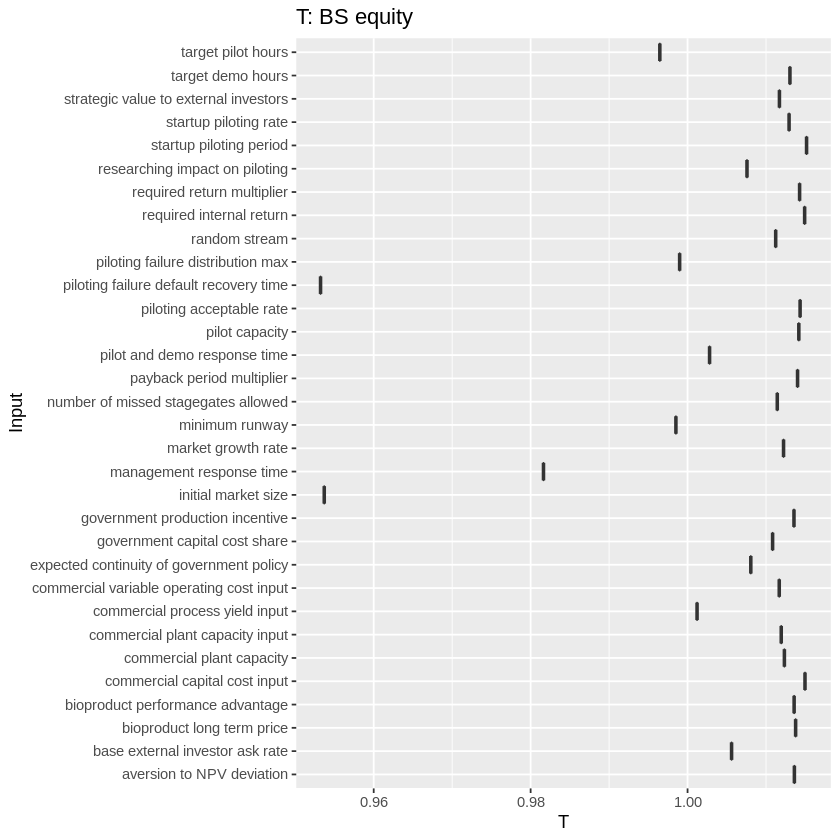

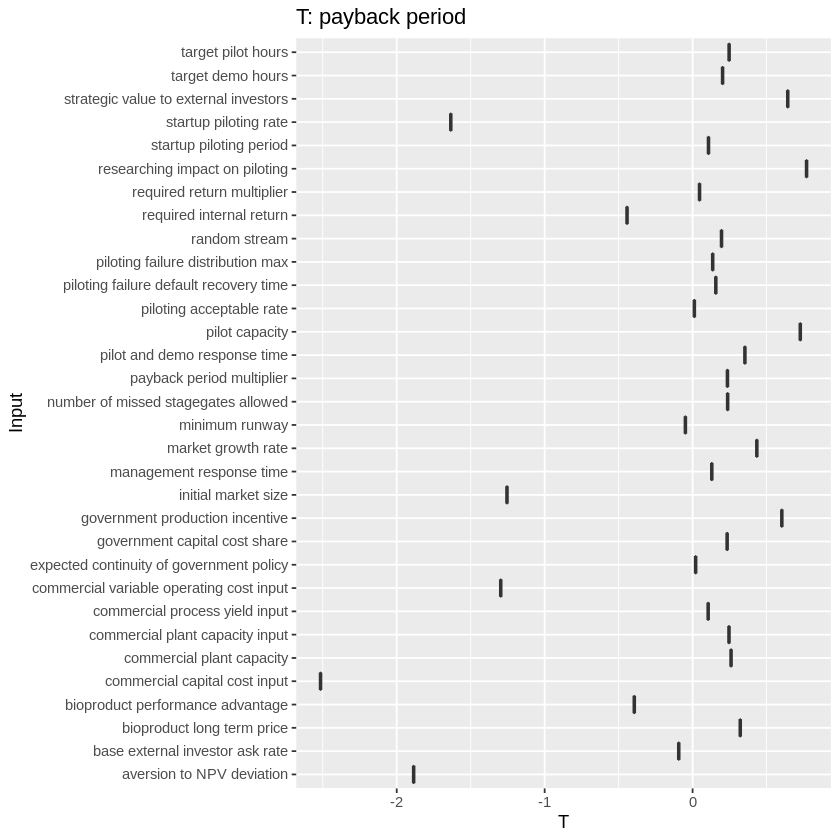

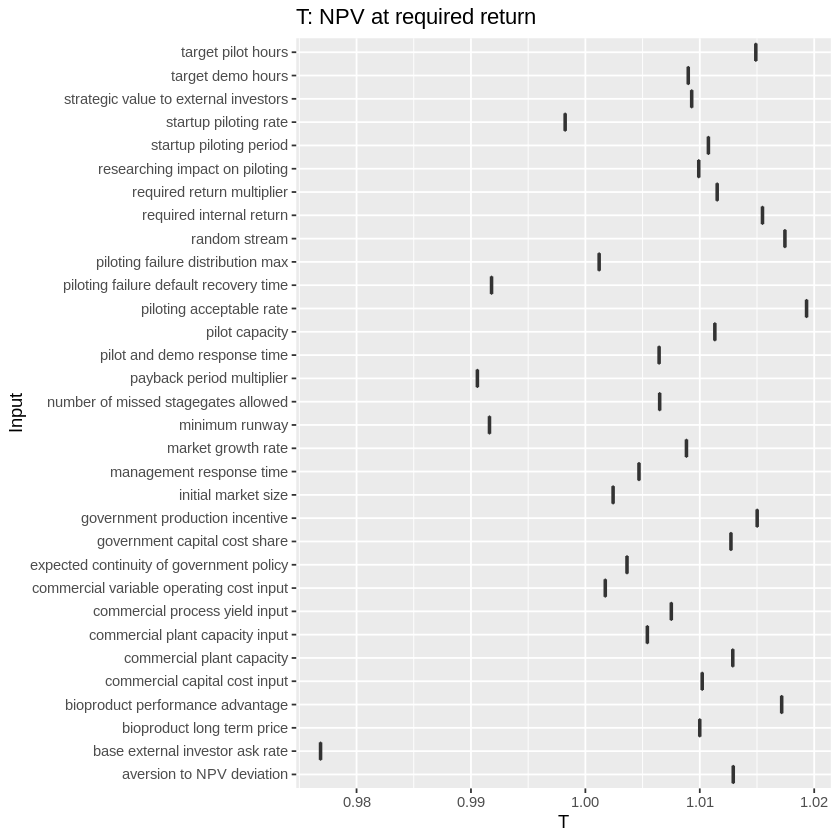

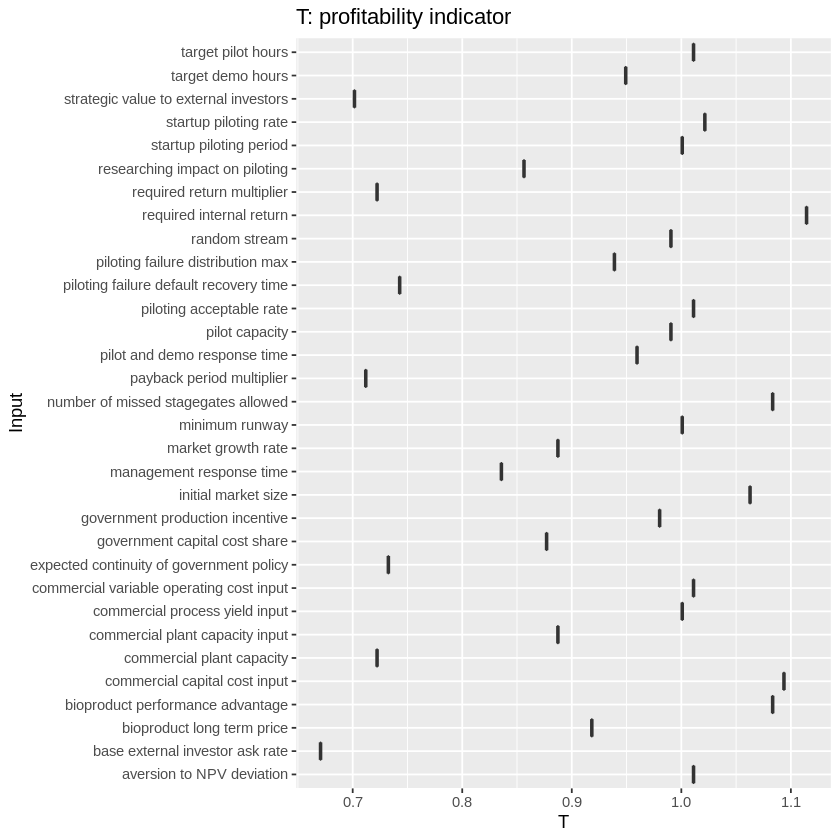

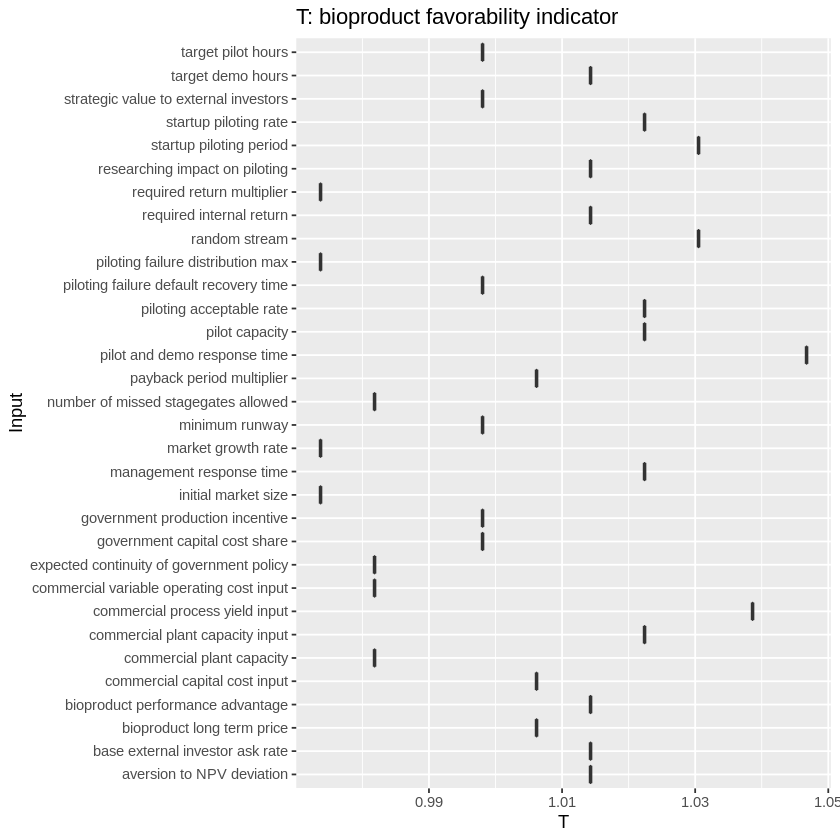

Warning message:
"Removed 3200 rows containing non-finite values (stat_boxplot)."

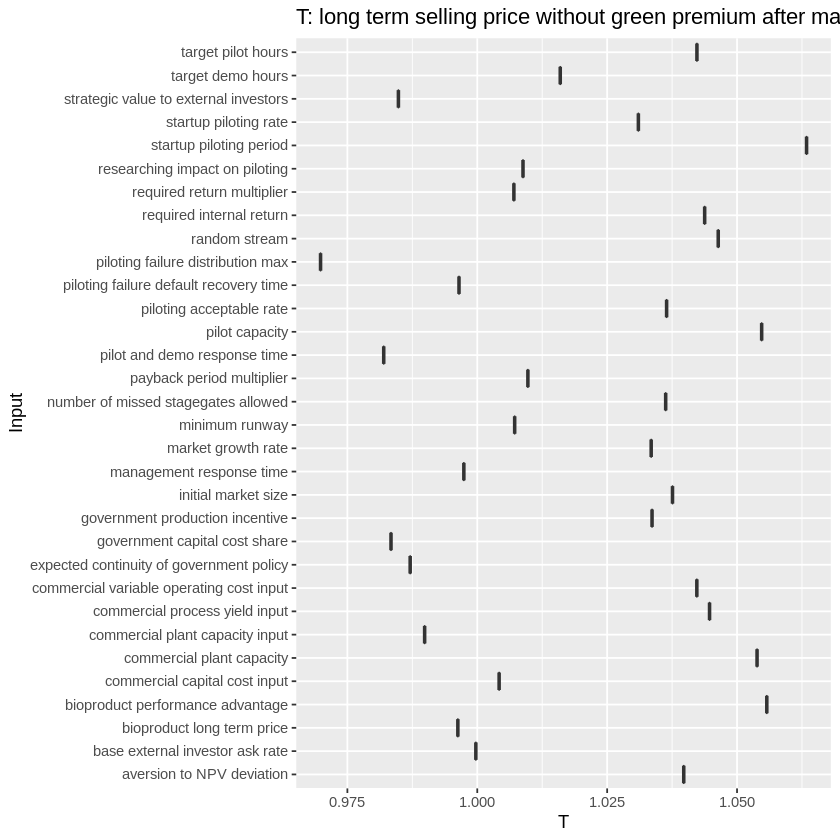

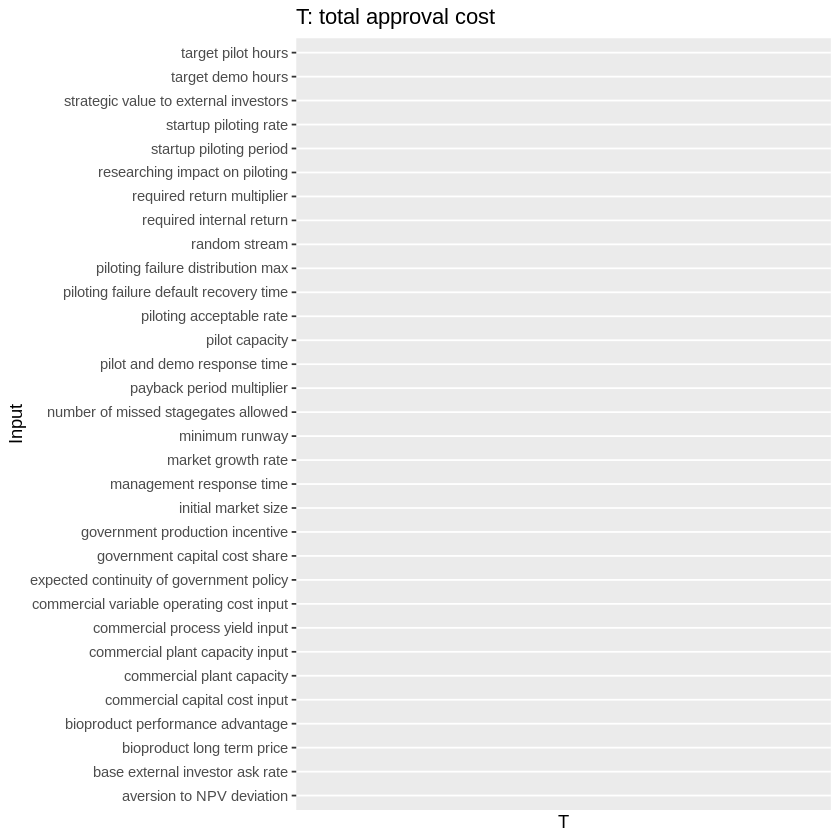

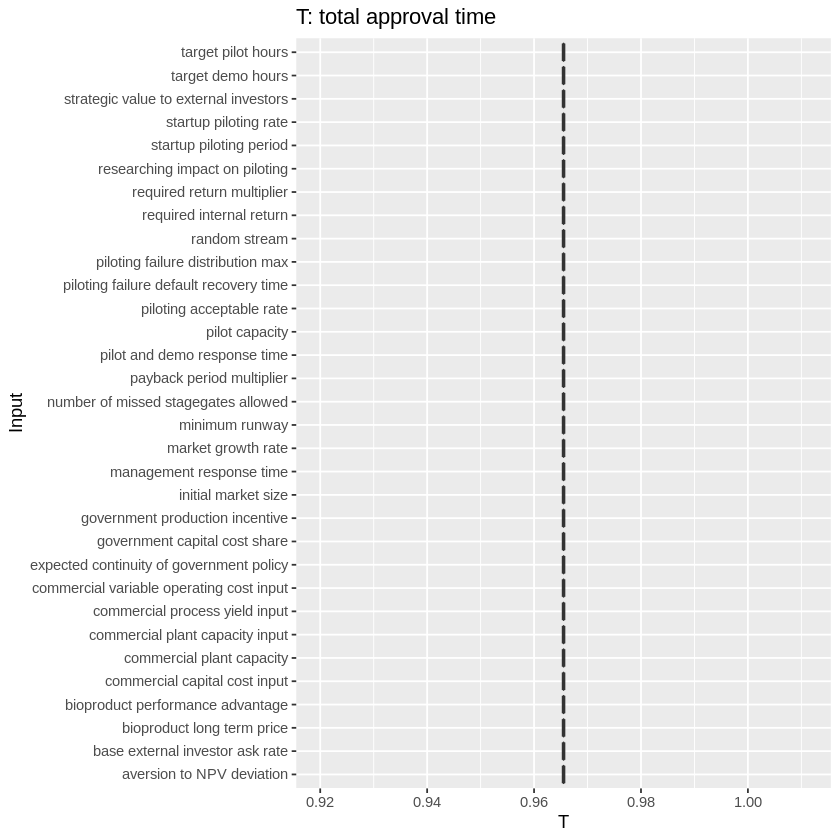

Warning message:
"Removed 3200 rows containing non-finite values (stat_boxplot)."

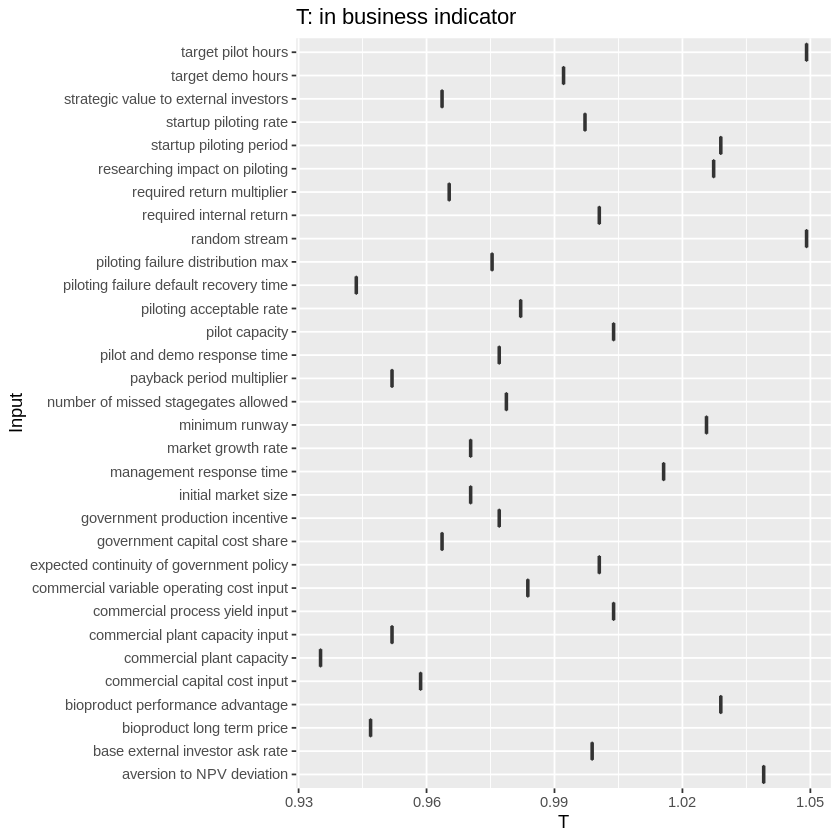

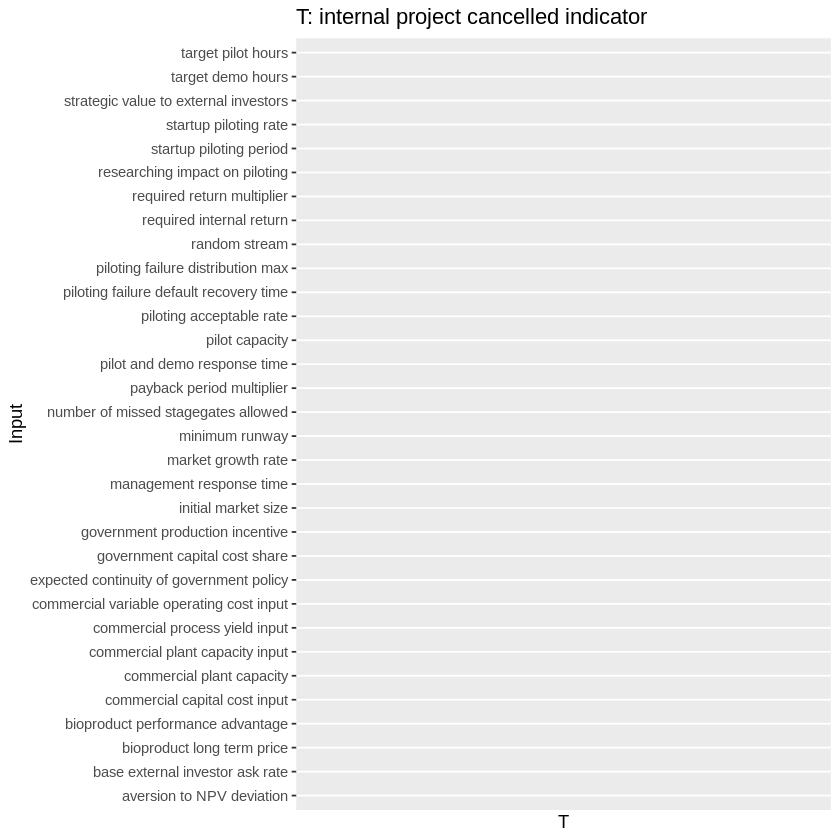

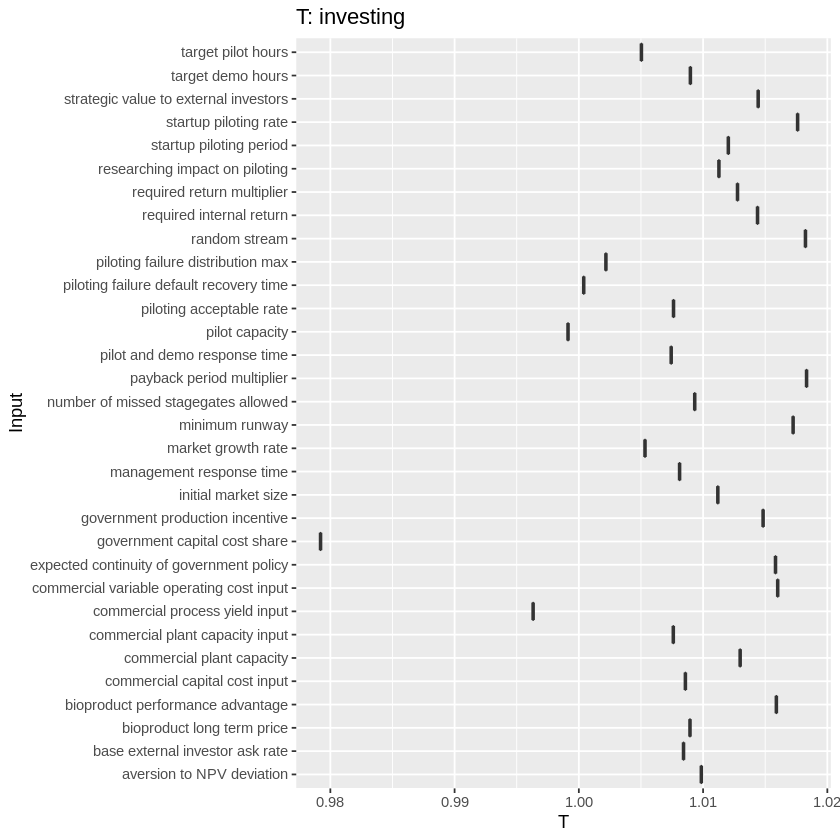

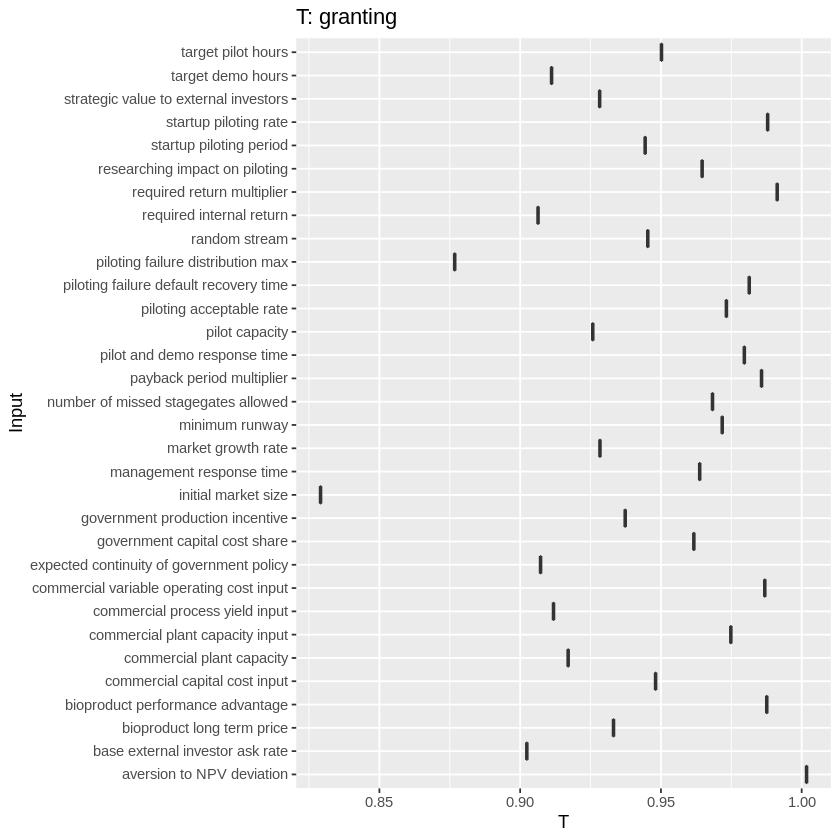

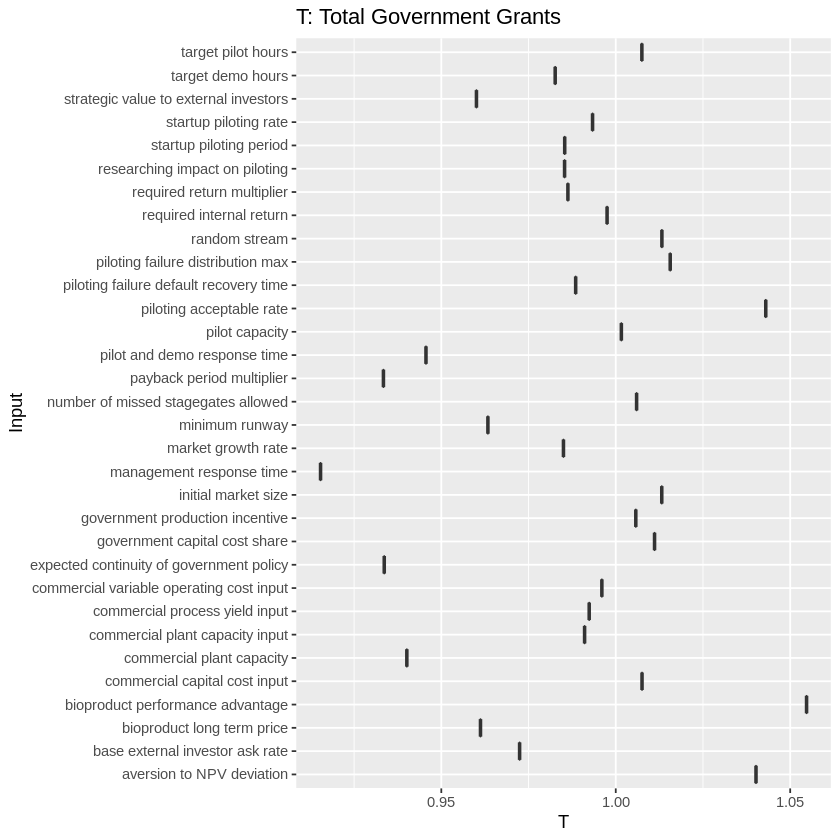

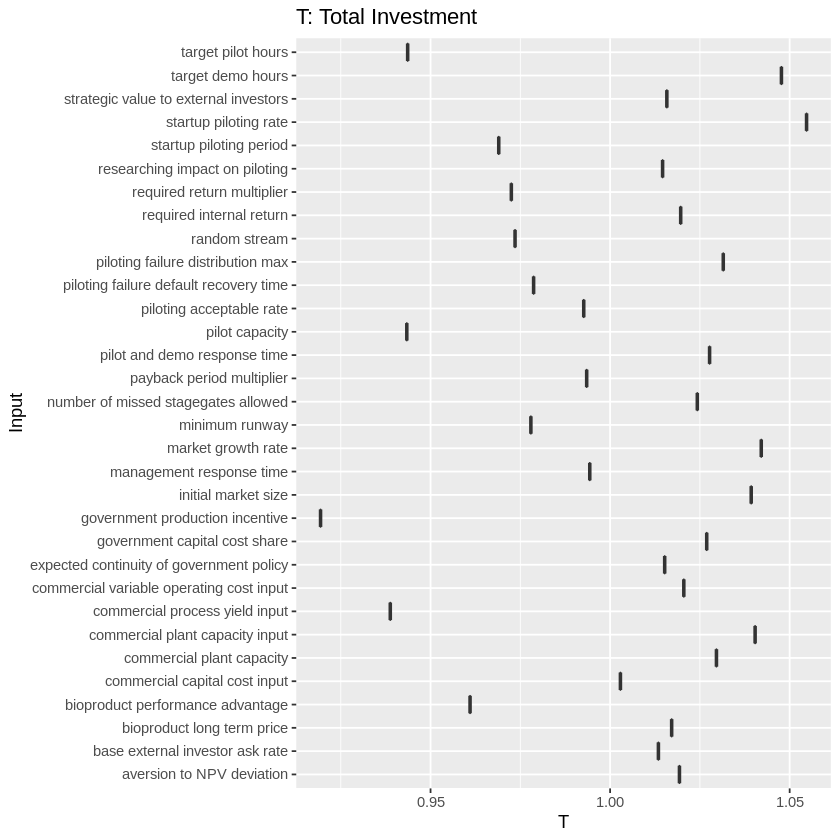

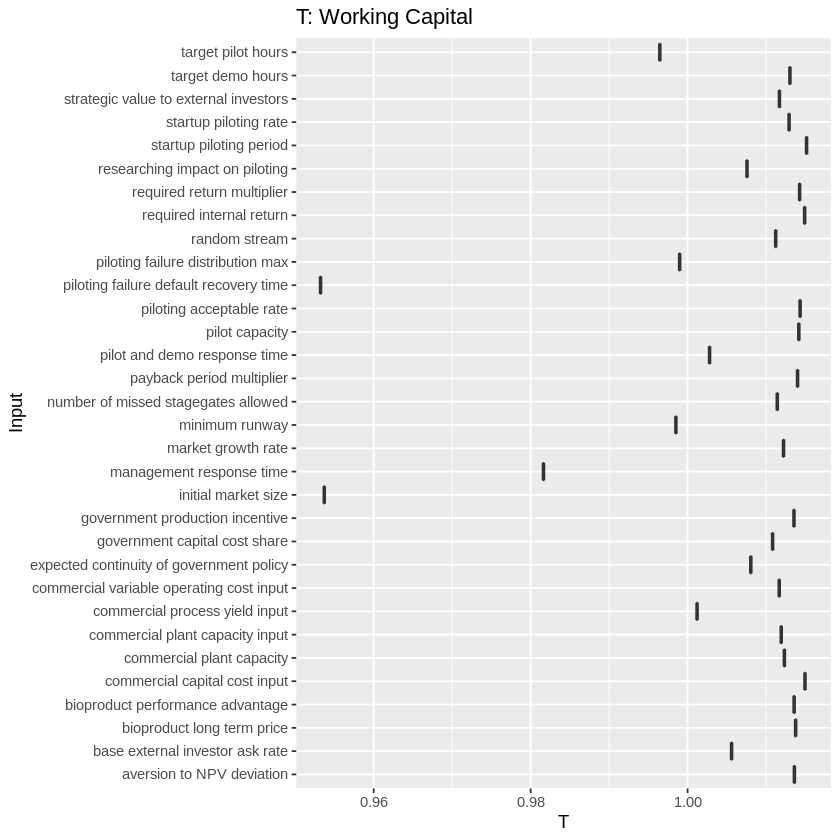

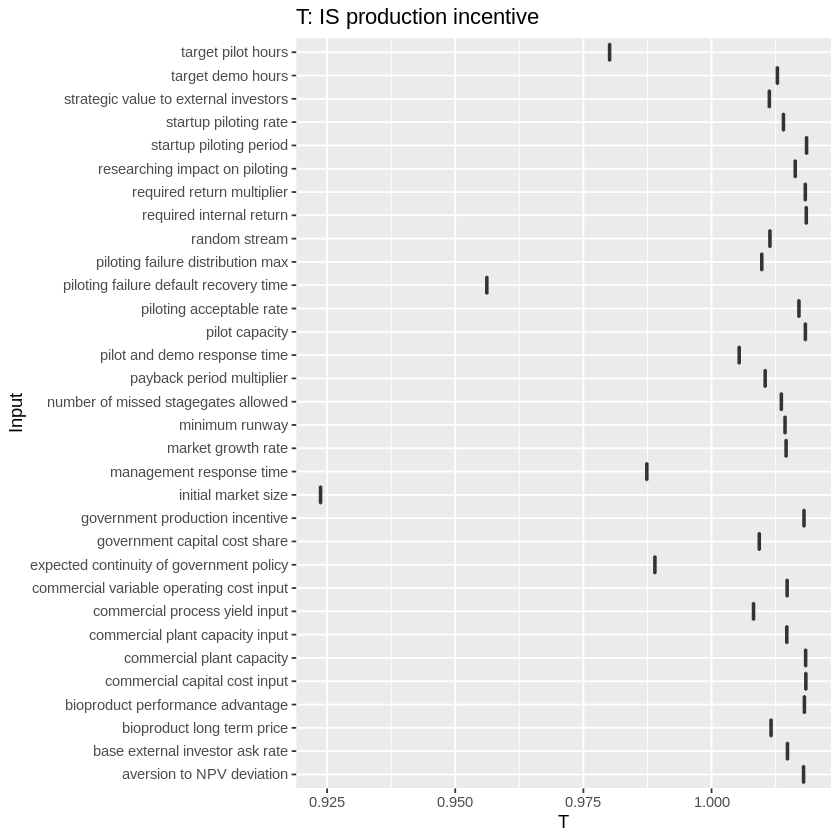

In [53]:
for (output in z.sens.boot[, unique(Output)]) {
    g <- ggplot(z.sens.boot[Output == output], aes(x=Input, y=T)) +
        geom_boxplot() +
        coord_flip() +
        ggtitle(paste("T:",output))
    print(g)
}

In [343]:
colnames(z.temp)

[1] "Run"                                                             
 [2] "Time"                                                            
 [3] "bioproduct_market_share_mass"                                    
 [4] "current_market_size_economic"                                    
 [5] "current_market_size_mass"                                        
 [6] "long_term_market_share"                                          
 [7] "long_term_market_value"                                          
 [8] "Adopters"                                                        
 [9] "NonAdopters"                                                     
[10] "Potential_Adopters"                                              
[11] "abandoning_bioproduct"                                           
[12] "Cumulative_Demoing_Production"                                   
[13] "Cumulative_Production"                                           
[14] "prepiloting"                                                     
[15] "pilot_plant_construction"                                        
[16] "pilot_plant_is_built"                                            
[17] "startup_piloting_complete"                                       
[18] "piloting_ongoing"                                                
[19] "piloting_progress"                                               
[20] "piloting_complete"                                               
[21] "predemoing"                                                      
[22] "demo_plant_construction"                                         
[23] "demo_plant_is_built"                                             
[24] "regulatory_process_ongoing"                                      
[25] "startup_demoing_completed"                                       
[26] "demoing_ongoing"                                                 
[27] "demoing_progress"                                                
[28] "demoing_complete"                                                
[29] "regulatory_delay"                                                
[30] "precommercial"                                                   
[31] "commercial_plant_construction"                                   
[32] "commercial_plant_is_built"                                       
[33] "commercial_plant_operation"                                      
[34] "technology_readiness_level"                                      
[35] "stage_in_progress"                                               
[36] "BS_equity"                                                       
[37] "payback_period"                                                  
[38] "NPV_at_required_return"                                          
[39] "profitability_indicator"                                         
[40] "bioproduct_favorability_indicator"                               
[41] "long_term_selling_price_without_green_premium_after_market_entry"
[42] "total_approval_cost"                                             
[43] "total_approval_time"                                             
[44] "in_business_indicator"                                           
[45] "internal_project_cancelled_indicator"                            
[46] "investing"                                                       
[47] "granting"                                                        
[48] "Total_Government_Grants"                                         
[49] "Total_Investment"                                                
[50] "Working_Capital"                                                 
[51] "IS_production_incentive"

In [345]:
z.inputs %>% head

Run aversion to NPV deviation base external investor ask rate
1 1   0.060                      2.4                           
2 2   1.360                     10.4                           
3 3   0.710                     14.4                           
4 4   2.010                      6.4                           
5 5   1.685                      4.4                           
6 6   0.385                     12.4                           
  bioproduct long term price bioproduct performance advantage
1 1500.500                   0.35000                         
2 5250.250                   3.07500                         
3 7125.125                   4.43750                         
4 3375.375                   1.71250                         
5 8062.562                   3.75625                         
6 4312.812                   1.03125                         
  commercial capital cost input commercial plant capacity
1  120374400                       8589.5                
2  720686400                    1265746.8                
3  420530400                     637168.1                
4 1020842400                    1894325.4                
5  870764400                    2208614.7                
6  270452400                     951457.4                
  commercial plant capacity input commercial process yield input
1    8589.5                       0.236                         
2 1265746.8                       0.676                         
3 1894325.4                       0.456                         
4  637168.1                       0.896                         
5  322878.8                       0.346                         
6 1580036.1                       0.786                         
  commercial variable operating cost input ...
1  365.7000                                ...
2 1170.4500                                ...
3  768.0750                                ...
4 1572.8250                                ...
5  566.8875                                ...
6 1371.6375                                ...
  piloting failure distribution max random stream required internal return
1 1.5000                             0            0.029000                
2 5.2500                            12            1.296500                
3 7.1250                            18            1.930250                
4 3.3750                             6            0.662750                
5 2.4375                            15            1.613375                
6 6.1875                             3            0.345875                
  required return multiplier researching impact on piloting
1 0.305000                   0.075                         
2 3.052500                   0.375                         
3 1.678750                   0.525                         
4 4.426250                   0.225                         
5 0.991875                   0.150                         
6 3.739375                   0.450                         
  startup piloting period startup piloting rate
1 150.00                   110.000             
2 525.00                  2326.500             
3 337.50                  3434.750             
4 712.50                  1218.250             
5 431.25                  1772.375             
6 806.25                  3988.875             
  strategic value to external investors target demo hours target pilot hours
1 2.710505e-11                          1550               950              
2 2.500000e+08                          7158              6058              
3 1.250000e+08                          9962              8612              
4 3.750000e+08                          4354              3504              
5 4.375000e+08                          2952              4781              
6 1.875000e+08                          8560              9889

In [347]:
z.outputs[[1]] %>% head

Run Time bioproduct market share mass current market size economic
1 1   2015 0.0715196                    261325000                   
2 1   2020 0.1481580                    279527000                   
3 1   2025 0.3900700                    231023000                   
4 1   2030 0.5636360                    200273000                   
5 1   2035 0.6875920                    178051000                   
6 1   2040 0.7761910                    167522000                   
  current market size mass long term market share long term market value
1 171571                   0                      0                     
2 184931                   0                      0                     
3 199331                   0                      0                     
4 214851                   0                      0                     
5 231581                   0                      0                     
6 249613                   0                      0                     
  Adopters NonAdopters Potential Adopters ... total approval cost
1  12270.7 159301.0      0.0000           ... 752251             
2  27399.0 157521.0     10.6530           ... 752251             
3  77753.0 121380.0    197.5930           ... 752251             
4 121098.0  93601.5    151.9470           ... 752251             
5 159233.0  72230.8    116.9500           ... 752251             
6 193747.0  55775.5     90.0889           ... 752251             
  total approval time in business indicator
1 6.019               0                    
2 6.019               1                    
3 6.019               1                    
4 6.019               0                    
5 6.019               1                    
6 6.019               1                    
  internal project cancelled indicator investing granting
1 0                                    9.6e+07   0       
2 0                                    0.0e+00   0       
3 0                                    0.0e+00   0       
4 0                                    0.0e+00   0       
5 0                                    0.0e+00   0       
6 0                                    0.0e+00   0       
  Total Government Grants Total Investment Working Capital
1 0                               0                0      
2 0                        46025200         34299000      
3 0                        46025200         14106600      
4 0                        46025200         -3220520      
5 0                       591836000        528581000      
6 0                       603767000        435541000      
  IS production incentive
1 0                      
2 0                      
3 0                      
4 0                      
5 0                      
6 0

In [348]:
?merge

In [349]:
merge(z.inputs, z.outputs[[1]][Time == 2050])

Run  aversion to NPV deviation base external investor ask rate
1     1   0.06000                    2.4                           
2     2   1.36000                   10.4                           
3     3   0.71000                   14.4                           
4     4   2.01000                    6.4                           
5     5   1.68500                    4.4                           
6     6   0.38500                   12.4                           
7     7   2.33500                   16.4                           
8     8   1.03500                    8.4                           
9     9   0.87250                    5.4                           
10   10   2.17250                   13.4                           
11   11   0.22250                   17.4                           
12   12   1.52250                    9.4                           
13   13   2.49750                    3.4                           
14   14   1.19750                   11.4                           
15   15   1.84750                   15.4                           
16   16   0.54750                    7.4                           
17   17   0.46625                    4.9                           
18   18   1.76625                   12.9                           
19   19   1.11625                   16.9                           
20   20   2.41625                    8.9                           
21   21   1.44125                    2.9                           
22   22   0.14125                   10.9                           
23   23   2.09125                   14.9                           
24   24   0.79125                    6.9                           
25   25   1.27875                    3.9                           
26   26   2.57875                   11.9                           
27   27   0.62875                   15.9                           
28   28   1.92875                    7.9                           
29   29   2.25375                    5.9                           
30   30   0.95375                   13.9                           
...  ...  ...                       ...                            
6771 6771 2.6498438                 13.3375                        
6772 6772 1.3498438                  5.3375                        
6773 6773 1.6748437                 15.3375                        
6774 6774 0.3748437                  7.3375                        
6775 6775 1.0248438                 11.3375                        
6776 6776 2.3248437                  3.3375                        
6777 6777 2.0810937                 16.8375                        
6778 6778 0.7810938                  8.8375                        
6779 6779 0.1310938                 12.8375                        
6780 6780 1.4310938                  4.8375                        
6781 6781 1.1060938                 14.8375                        
6782 6782 2.4060938                  6.8375                        
6783 6783 1.7560938                 10.8375                        
6784 6784 0.4560938                  2.8375                        
6785 6785 0.6185938                 17.8375                        
6786 6786 1.9185938                  9.8375                        
6787 6787 2.5685937                 13.8375                        
6788 6788 1.2685937                  5.8375                        
6789 6789 1.5935937                 15.8375                        
6790 6790 0.2935937                  7.8375                        
6791 6791 0.9435938                 11.8375                        
6792 6792 2.2435938                  3.8375                        
6793 6793 1.4514063                 10.9625                        
6794 6794 0.1514062                  2.9625                        
6795 6795 0.8014062                 14.9625                        
6796 6796 2.1014063                  6.9625                        
6797 6797 0.4764062                 12.9625                  

In [11]:
z.temp <- merge(z.inputs, z.outputs[Time == 2050])
colnames(z.temp) <- gsub(" ", "_", colnames(z.temp))
z.tree <- rpart(
    `Replacement` ~
    `aversion_to_NPV_deviation` +
    `base_external_investor_ask_rate` +
    `bioproduct_long_term_price` +
    `bioproduct_performance_advantage` +
    `commercial_capital_cost_input` +
    `commercial_plant_capacity` +
    `commercial_plant_capacity_input` +
    `commercial_process_yield_input` +
    `commercial_variable_operating_cost_input` +
    `expected_continuity_of_government_policy` +
    `government_capital_cost_share` +
    `government_production_incentive` +
    `initial_market_size` +
    `management_response_time` +
    `market_growth_rate` +
    `minimum_runway` +
    `number_of_missed_stagegates_allowed` +
    `payback_period_multiplier` +
    `pilot_and_demo_response_time` +
    `pilot_capacity` +
    `piloting_acceptable_rate` +
    `piloting_failure_default_recovery_time` +
    `piloting_failure_distribution_max` +
    `random_stream` +
    `required_internal_return` +
    `required_return_multiplier` +
    `researching_impact_on_piloting` +
    `startup_piloting_period` +
    `startup_piloting_rate` +
    `strategic_value_to_external_investors` +
    `target_demo_hours` +
    `target_pilot_hours`,
    z.temp
)
z.tree
printcp(z.tree)
plot(z.tree)
text(z.tree, use.n=TRUE, all=TRUE, cex=.6)

ERROR: Error in Replacement + Scale: non-numeric argument to binary operator


n= 6800 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 6800 327.496300 0.050735290  
   2) target_pilot_hours>=2007.516 6086 125.307900 0.021031880  
     4) expected_continuity_of_government_policy>=0.3058594 6054  99.315000 0.016683180  
       8) startup_piloting_rate>=135.9746 6022  76.989700 0.012952510  
        16) piloting_acceptable_rate>=2884.225 5646  31.818630 0.005667729 *
        17) piloting_acceptable_rate< 2884.225 376  40.372340 0.122340400  
          34) commercial_plant_capacity>=278681.9 310   1.987097 0.006451613 *
          35) commercial_plant_capacity< 278681.9 66  14.666670 0.666666700 *
       9) startup_piloting_rate< 135.9746 32   6.468750 0.718750000 *
     5) expected_continuity_of_government_policy< 0.3058594 32   4.218750 0.843750000 *
   3) target_pilot_hours< 2007.516 714 151.049000 0.303921600  
     6) researching_impact_on_piloting< 0.5753906 583  83.502570 0.173241900  
      12) required_return_multiplier< 4.748223 512


Regression tree:
rpart(formula = commercial_plant_operation ~ aversion_to_NPV_deviation + 
    base_external_investor_ask_rate + bioproduct_long_term_price + 
    bioproduct_performance_advantage + commercial_capital_cost_input + 
    commercial_plant_capacity + commercial_plant_capacity_input + 
    commercial_process_yield_input + commercial_variable_operating_cost_input + 
    expected_continuity_of_government_policy + government_capital_cost_share + 
    government_production_incentive + initial_market_size + management_response_time + 
    market_growth_rate + minimum_runway + number_of_missed_stagegates_allowed + 
    payback_period_multiplier + pilot_and_demo_response_time + 
    pilot_capacity + piloting_acceptable_rate + piloting_failure_default_recovery_time + 
    piloting_failure_distribution_max + random_stream + required_internal_return + 
    required_return_multiplier + researching_impact_on_piloting + 
    startup_piloting_period + startup_piloting_rate + strategic_va

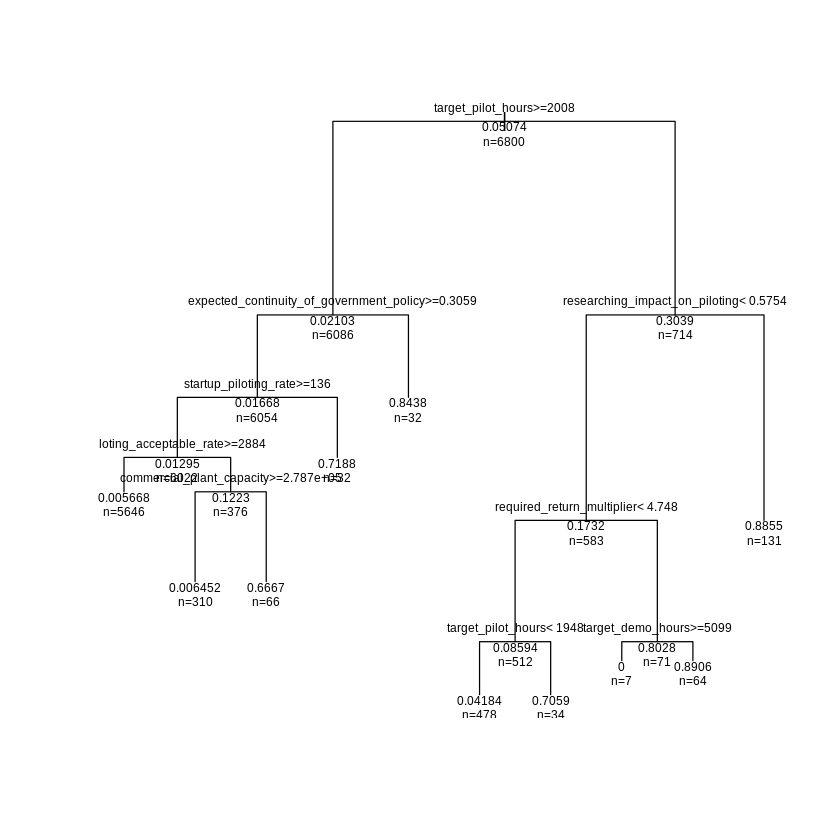

In [369]:
z.temp <- merge(z.inputs, z.outputs[Replacement == "Direct" & Scale == "Niche" & Time == 2050])
colnames(z.temp) <- gsub(" ", "_", colnames(z.temp))
z.tree <- rpart(
    `commercial_plant_operation` ~
    `aversion_to_NPV_deviation` +
    `base_external_investor_ask_rate` +
    `bioproduct_long_term_price` +
    `bioproduct_performance_advantage` +
    `commercial_capital_cost_input` +
    `commercial_plant_capacity` +
    `commercial_plant_capacity_input` +
    `commercial_process_yield_input` +
    `commercial_variable_operating_cost_input` +
    `expected_continuity_of_government_policy` +
    `government_capital_cost_share` +
    `government_production_incentive` +
    `initial_market_size` +
    `management_response_time` +
    `market_growth_rate` +
    `minimum_runway` +
    `number_of_missed_stagegates_allowed` +
    `payback_period_multiplier` +
    `pilot_and_demo_response_time` +
    `pilot_capacity` +
    `piloting_acceptable_rate` +
    `piloting_failure_default_recovery_time` +
    `piloting_failure_distribution_max` +
    `random_stream` +
    `required_internal_return` +
    `required_return_multiplier` +
    `researching_impact_on_piloting` +
    `startup_piloting_period` +
    `startup_piloting_rate` +
    `strategic_value_to_external_investors` +
    `target_demo_hours` +
    `target_pilot_hours`,
    z.temp
)
z.tree
printcp(z.tree)
plot(z.tree)
text(z.tree, use.n=TRUE, all=TRUE, cex=.6)

n= 6800 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 6800 318.496300 0.049264710  
   2) required_internal_return< 2.539244 6734 272.938100 0.042322540  
     4) target_pilot_hours>=1947.656 6086 133.916000 0.022510680  
       8) base_external_investor_ask_rate>=3.80625 5606  82.741350 0.014983950  
        16) piloting_acceptable_rate>=2884.225 5267  49.525350 0.009493070  
          32) target_pilot_hours< 10886.66 5098  32.786390 0.006473127 *
          33) target_pilot_hours>=10886.66 169  15.289940 0.100591700  
            66) random_stream< 22 138   0.000000 0.000000000 *
            67) random_stream>=22 31   7.677419 0.548387100 *
        17) piloting_acceptable_rate< 2884.225 339  30.589970 0.100295000  
          34) initial_market_size< 4.487602e+07 306   6.839869 0.022875820 *
          35) initial_market_size>=4.487602e+07 33   4.909091 0.818181800 *
       9) base_external_investor_ask_rate< 3.80625 480  47.147920 0.110416700  
        18) r


Regression tree:
rpart(formula = commercial_plant_operation ~ aversion_to_NPV_deviation + 
    base_external_investor_ask_rate + bioproduct_long_term_price + 
    bioproduct_performance_advantage + commercial_capital_cost_input + 
    commercial_plant_capacity + commercial_plant_capacity_input + 
    commercial_process_yield_input + commercial_variable_operating_cost_input + 
    expected_continuity_of_government_policy + government_capital_cost_share + 
    government_production_incentive + initial_market_size + management_response_time + 
    market_growth_rate + minimum_runway + number_of_missed_stagegates_allowed + 
    payback_period_multiplier + pilot_and_demo_response_time + 
    pilot_capacity + piloting_acceptable_rate + piloting_failure_default_recovery_time + 
    piloting_failure_distribution_max + random_stream + required_internal_return + 
    required_return_multiplier + researching_impact_on_piloting + 
    startup_piloting_period + startup_piloting_rate + strategic_va

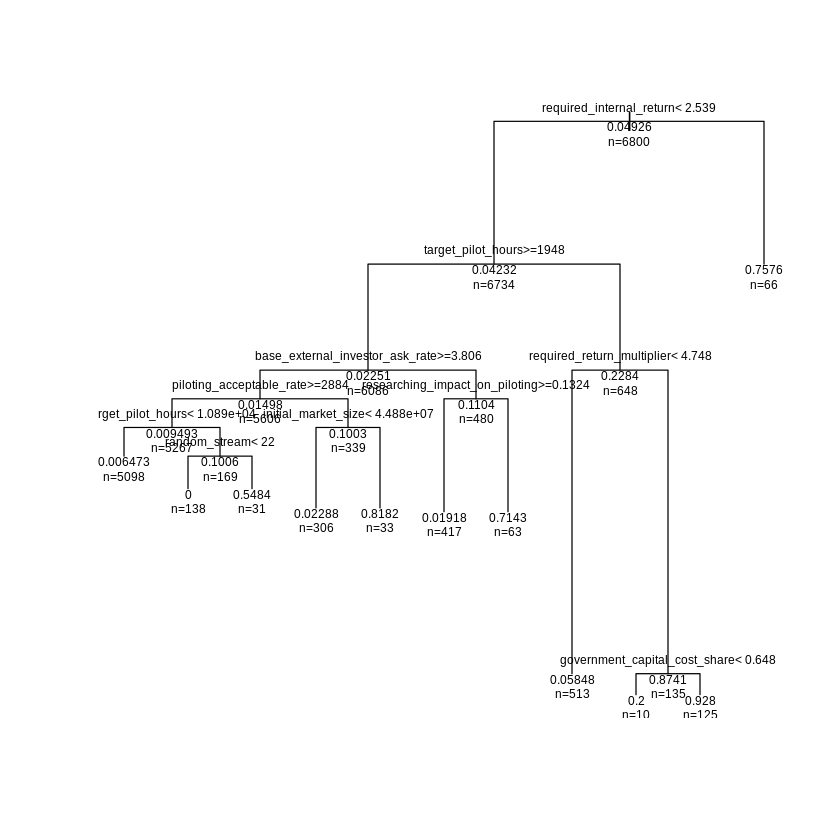

In [375]:
z.temp <- merge(z.inputs, z.outputs[Replacement == "Direct" & Scale == "Commodity" & Time == 2050])
colnames(z.temp) <- gsub(" ", "_", colnames(z.temp))
z.tree <- rpart(
    `commercial_plant_operation` ~
    `aversion_to_NPV_deviation` +
    `base_external_investor_ask_rate` +
    `bioproduct_long_term_price` +
    `bioproduct_performance_advantage` +
    `commercial_capital_cost_input` +
    `commercial_plant_capacity` +
    `commercial_plant_capacity_input` +
    `commercial_process_yield_input` +
    `commercial_variable_operating_cost_input` +
    `expected_continuity_of_government_policy` +
    `government_capital_cost_share` +
    `government_production_incentive` +
    `initial_market_size` +
    `management_response_time` +
    `market_growth_rate` +
    `minimum_runway` +
    `number_of_missed_stagegates_allowed` +
    `payback_period_multiplier` +
    `pilot_and_demo_response_time` +
    `pilot_capacity` +
    `piloting_acceptable_rate` +
    `piloting_failure_default_recovery_time` +
    `piloting_failure_distribution_max` +
    `random_stream` +
    `required_internal_return` +
    `required_return_multiplier` +
    `researching_impact_on_piloting` +
    `startup_piloting_period` +
    `startup_piloting_rate` +
    `strategic_value_to_external_investors` +
    `target_demo_hours` +
    `target_pilot_hours`,
    z.temp
)
z.tree
printcp(z.tree)
plot(z.tree)
text(z.tree, use.n=TRUE, all=TRUE, cex=.6)

n= 6800 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 6800 327.496300 0.050735290  
   2) target_pilot_hours>=2007.516 6086 125.307900 0.021031880  
     4) expected_continuity_of_government_policy>=0.3058594 6054  99.315000 0.016683180  
       8) startup_piloting_rate>=135.9746 6022  76.989700 0.012952510  
        16) piloting_acceptable_rate>=2884.225 5646  31.818630 0.005667729 *
        17) piloting_acceptable_rate< 2884.225 376  40.372340 0.122340400  
          34) commercial_plant_capacity>=278681.9 310   1.987097 0.006451613 *
          35) commercial_plant_capacity< 278681.9 66  14.666670 0.666666700 *
       9) startup_piloting_rate< 135.9746 32   6.468750 0.718750000 *
     5) expected_continuity_of_government_policy< 0.3058594 32   4.218750 0.843750000 *
   3) target_pilot_hours< 2007.516 714 151.049000 0.303921600  
     6) researching_impact_on_piloting< 0.5753906 583  83.502570 0.173241900  
      12) required_return_multiplier< 4.748223 512


Regression tree:
rpart(formula = commercial_plant_operation ~ aversion_to_NPV_deviation + 
    base_external_investor_ask_rate + bioproduct_long_term_price + 
    bioproduct_performance_advantage + commercial_capital_cost_input + 
    commercial_plant_capacity + commercial_plant_capacity_input + 
    commercial_process_yield_input + commercial_variable_operating_cost_input + 
    expected_continuity_of_government_policy + government_capital_cost_share + 
    government_production_incentive + initial_market_size + management_response_time + 
    market_growth_rate + minimum_runway + number_of_missed_stagegates_allowed + 
    payback_period_multiplier + pilot_and_demo_response_time + 
    pilot_capacity + piloting_acceptable_rate + piloting_failure_default_recovery_time + 
    piloting_failure_distribution_max + random_stream + required_internal_return + 
    required_return_multiplier + researching_impact_on_piloting + 
    startup_piloting_period + startup_piloting_rate + strategic_va

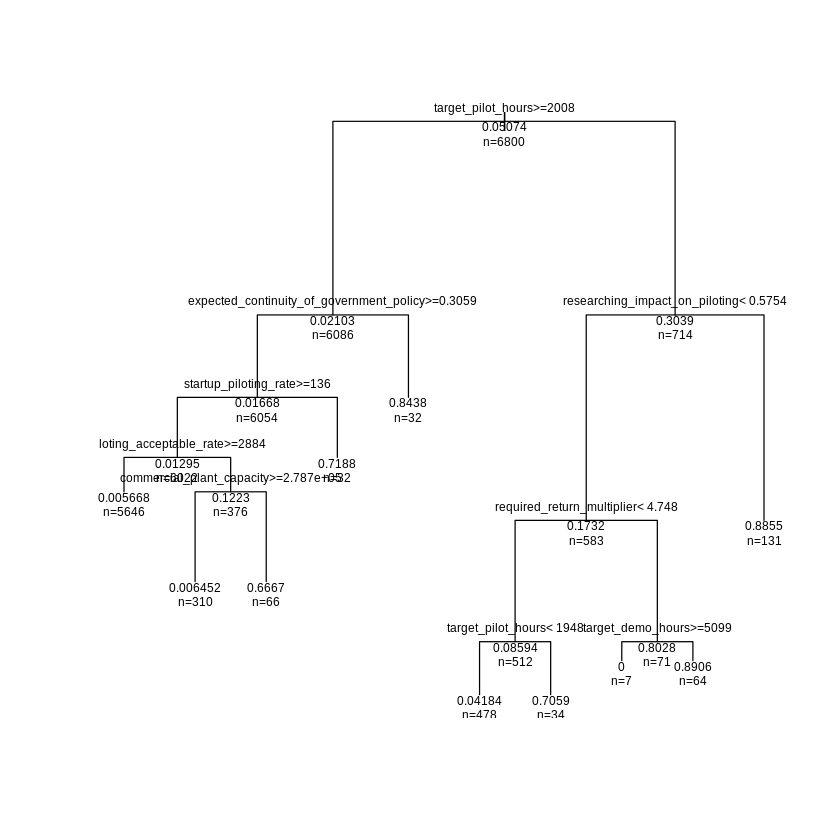

In [376]:
z.temp <- merge(z.inputs, z.outputs[Replacement == "Advantaged" & Scale == "Niche" & Time == 2050])
colnames(z.temp) <- gsub(" ", "_", colnames(z.temp))
z.tree <- rpart(
    `commercial_plant_operation` ~
    `aversion_to_NPV_deviation` +
    `base_external_investor_ask_rate` +
    `bioproduct_long_term_price` +
    `bioproduct_performance_advantage` +
    `commercial_capital_cost_input` +
    `commercial_plant_capacity` +
    `commercial_plant_capacity_input` +
    `commercial_process_yield_input` +
    `commercial_variable_operating_cost_input` +
    `expected_continuity_of_government_policy` +
    `government_capital_cost_share` +
    `government_production_incentive` +
    `initial_market_size` +
    `management_response_time` +
    `market_growth_rate` +
    `minimum_runway` +
    `number_of_missed_stagegates_allowed` +
    `payback_period_multiplier` +
    `pilot_and_demo_response_time` +
    `pilot_capacity` +
    `piloting_acceptable_rate` +
    `piloting_failure_default_recovery_time` +
    `piloting_failure_distribution_max` +
    `random_stream` +
    `required_internal_return` +
    `required_return_multiplier` +
    `researching_impact_on_piloting` +
    `startup_piloting_period` +
    `startup_piloting_rate` +
    `strategic_value_to_external_investors` +
    `target_demo_hours` +
    `target_pilot_hours`,
    z.temp
)
z.tree
printcp(z.tree)
plot(z.tree)
text(z.tree, use.n=TRUE, all=TRUE, cex=.6)

n= 6800 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 6800 327.496300 0.050735290  
   2) target_pilot_hours>=2007.516 6086 125.307900 0.021031880  
     4) expected_continuity_of_government_policy>=0.3058594 6054  99.315000 0.016683180  
       8) startup_piloting_rate>=135.9746 6022  76.989700 0.012952510  
        16) piloting_acceptable_rate>=2884.225 5646  31.818630 0.005667729 *
        17) piloting_acceptable_rate< 2884.225 376  40.372340 0.122340400  
          34) commercial_plant_capacity>=278681.9 310   1.987097 0.006451613 *
          35) commercial_plant_capacity< 278681.9 66  14.666670 0.666666700 *
       9) startup_piloting_rate< 135.9746 32   6.468750 0.718750000 *
     5) expected_continuity_of_government_policy< 0.3058594 32   4.218750 0.843750000 *
   3) target_pilot_hours< 2007.516 714 151.049000 0.303921600  
     6) researching_impact_on_piloting< 0.5753906 583  83.502570 0.173241900  
      12) required_return_multiplier< 4.748223 512


Regression tree:
rpart(formula = commercial_plant_operation ~ aversion_to_NPV_deviation + 
    base_external_investor_ask_rate + bioproduct_long_term_price + 
    bioproduct_performance_advantage + commercial_capital_cost_input + 
    commercial_plant_capacity + commercial_plant_capacity_input + 
    commercial_process_yield_input + commercial_variable_operating_cost_input + 
    expected_continuity_of_government_policy + government_capital_cost_share + 
    government_production_incentive + initial_market_size + management_response_time + 
    market_growth_rate + minimum_runway + number_of_missed_stagegates_allowed + 
    payback_period_multiplier + pilot_and_demo_response_time + 
    pilot_capacity + piloting_acceptable_rate + piloting_failure_default_recovery_time + 
    piloting_failure_distribution_max + random_stream + required_internal_return + 
    required_return_multiplier + researching_impact_on_piloting + 
    startup_piloting_period + startup_piloting_rate + strategic_va

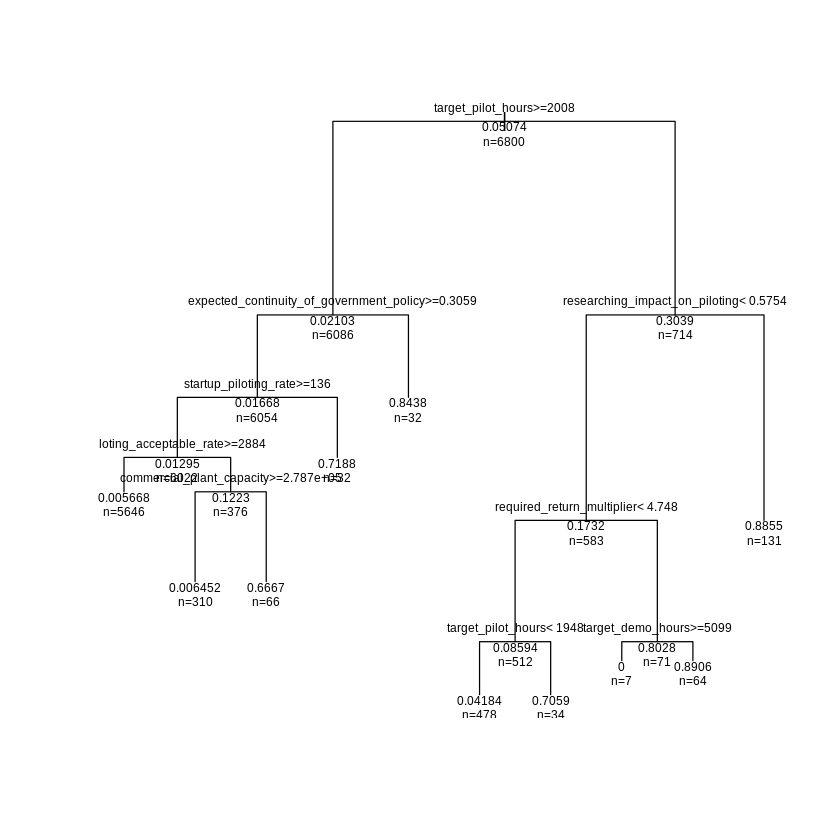

In [377]:
z.temp <- merge(z.inputs, z.outputs[Replacement == "Advantaged" & Scale == "Commodity" & Time == 2050])
colnames(z.temp) <- gsub(" ", "_", colnames(z.temp))
z.tree <- rpart(
    `commercial_plant_operation` ~
    `aversion_to_NPV_deviation` +
    `base_external_investor_ask_rate` +
    `bioproduct_long_term_price` +
    `bioproduct_performance_advantage` +
    `commercial_capital_cost_input` +
    `commercial_plant_capacity` +
    `commercial_plant_capacity_input` +
    `commercial_process_yield_input` +
    `commercial_variable_operating_cost_input` +
    `expected_continuity_of_government_policy` +
    `government_capital_cost_share` +
    `government_production_incentive` +
    `initial_market_size` +
    `management_response_time` +
    `market_growth_rate` +
    `minimum_runway` +
    `number_of_missed_stagegates_allowed` +
    `payback_period_multiplier` +
    `pilot_and_demo_response_time` +
    `pilot_capacity` +
    `piloting_acceptable_rate` +
    `piloting_failure_default_recovery_time` +
    `piloting_failure_distribution_max` +
    `random_stream` +
    `required_internal_return` +
    `required_return_multiplier` +
    `researching_impact_on_piloting` +
    `startup_piloting_period` +
    `startup_piloting_rate` +
    `strategic_value_to_external_investors` +
    `target_demo_hours` +
    `target_pilot_hours`,
    z.temp
)
z.tree
printcp(z.tree)
plot(z.tree)
text(z.tree, use.n=TRUE, all=TRUE, cex=.6)

n= 340000 

node), split, n, deviance, yval
      * denotes terminal node

   1) root 340000 9564.64000 0.02897059  
     2) target_pilot_hours>=3263.315 263016 3787.82000 0.01461508 *
     3) target_pilot_hours< 3263.315 76984 5537.43500 0.07801621  
       6) piloting_acceptable_rate>=7347.922 29328  537.76050 0.01868522 *
       7) piloting_acceptable_rate< 7347.922 47656 4832.90000 0.11452910  
        14) government_capital_cost_share< 0.6414551 31380 2054.35600 0.07042702  
          28) commercial_plant_capacity>=38974.89 30852 1797.01100 0.06210294 *
          29) commercial_plant_capacity< 38974.89 528  130.29550 0.55681820 *
        15) government_capital_cost_share>=0.6414551 16276 2599.83700 0.19955760  
          30) target_demo_hours>=8918.715 5720  280.68250 0.05174825  
            60) pilot_capacity>=18597.51 5480   78.83212 0.01459854 *
            61) pilot_capacity< 18597.51 240   21.60000 0.90000000 *
          31) target_demo_hours< 8918.715 10556 2126.46900 0.279


Regression tree:
rpart(formula = commercial_plant_operation ~ Replacement + Scale + 
    aversion_to_NPV_deviation + base_external_investor_ask_rate + 
    bioproduct_long_term_price + bioproduct_performance_advantage + 
    commercial_capital_cost_input + commercial_plant_capacity + 
    commercial_plant_capacity_input + commercial_process_yield_input + 
    commercial_variable_operating_cost_input + expected_continuity_of_government_policy + 
    government_capital_cost_share + government_production_incentive + 
    initial_market_size + management_response_time + market_growth_rate + 
    minimum_runway + number_of_missed_stagegates_allowed + payback_period_multiplier + 
    pilot_and_demo_response_time + pilot_capacity + piloting_acceptable_rate + 
    piloting_failure_default_recovery_time + piloting_failure_distribution_max + 
    random_stream + required_internal_return + required_return_multiplier + 
    researching_impact_on_piloting + startup_piloting_period + 
    startup_p

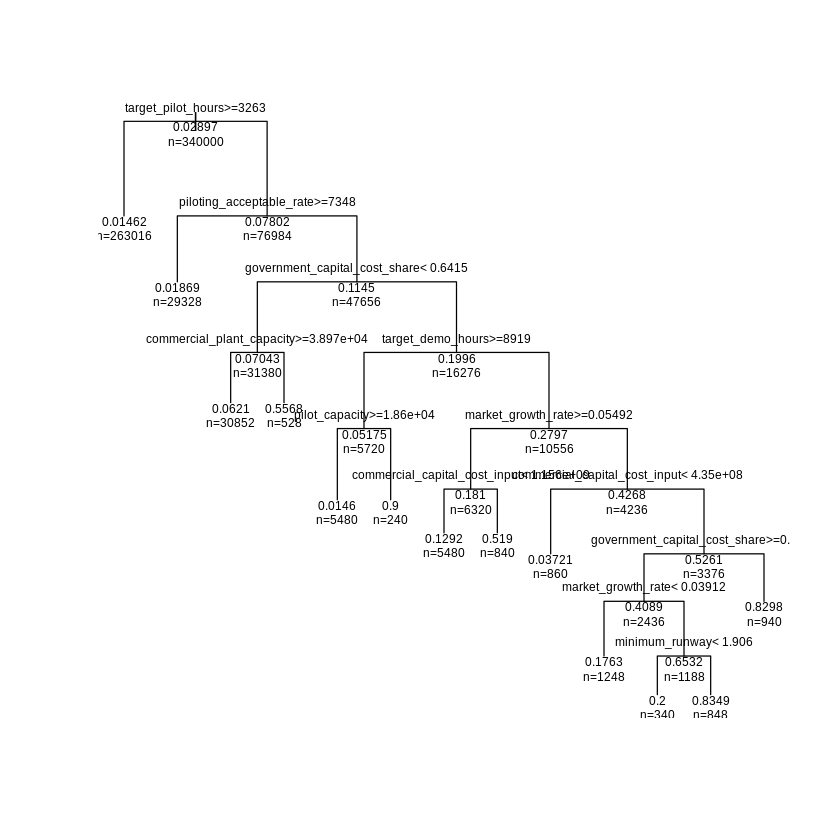

In [63]:
z.temp <- merge(z.inputs, z.outputs[Time == 2050])
colnames(z.temp) <- gsub(" ", "_", colnames(z.temp))
z.tree <- rpart(
    `commercial_plant_operation` ~
    `Replacement` +
    `Scale` +
    `aversion_to_NPV_deviation` +
    `base_external_investor_ask_rate` +
    `bioproduct_long_term_price` +
    `bioproduct_performance_advantage` +
    `commercial_capital_cost_input` +
    `commercial_plant_capacity` +
    `commercial_plant_capacity_input` +
    `commercial_process_yield_input` +
    `commercial_variable_operating_cost_input` +
    `expected_continuity_of_government_policy` +
    `government_capital_cost_share` +
    `government_production_incentive` +
    `initial_market_size` +
    `management_response_time` +
    `market_growth_rate` +
    `minimum_runway` +
    `number_of_missed_stagegates_allowed` +
    `payback_period_multiplier` +
    `pilot_and_demo_response_time` +
    `pilot_capacity` +
    `piloting_acceptable_rate` +
    `piloting_failure_default_recovery_time` +
    `piloting_failure_distribution_max` +
    `random_stream` +
    `required_internal_return` +
    `required_return_multiplier` +
    `researching_impact_on_piloting` +
    `startup_piloting_period` +
    `startup_piloting_rate` +
    `strategic_value_to_external_investors` +
    `target_demo_hours` +
    `target_pilot_hours`,
    z.temp
)
z.tree
printcp(z.tree)
plot(z.tree)
text(z.tree, use.n=TRUE, all=TRUE, cex=.6)

In [64]:
z.temp$`commercial plant operation` %>% summary

Length  Class   Mode 
     0   NULL   NULL 

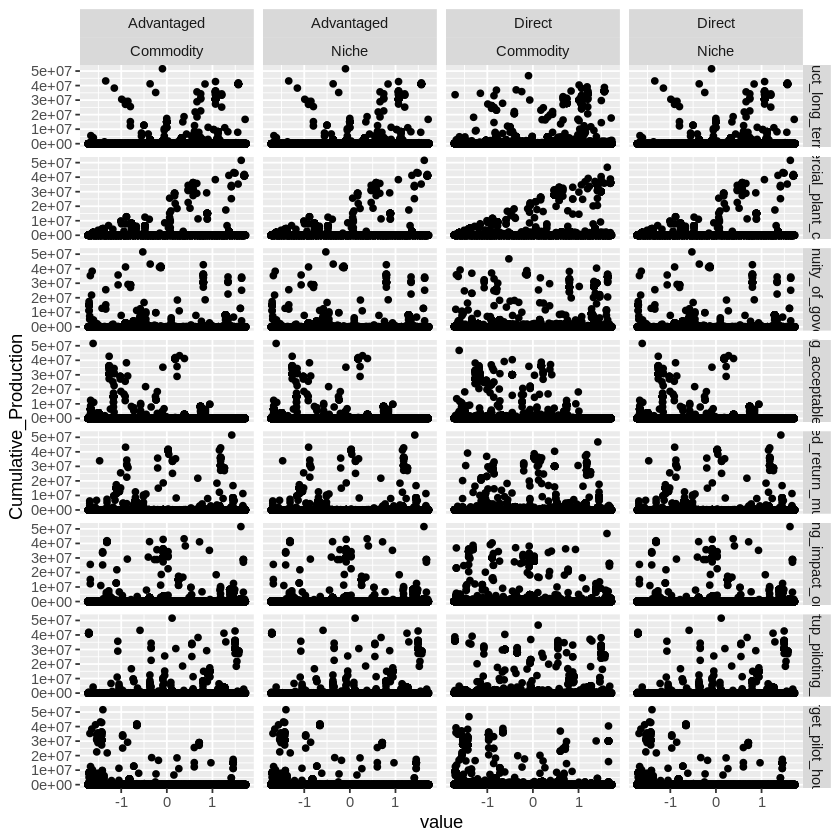

In [407]:
ggplot(melt(z.temp[, .(
    `Run`,
    `Replacement`,
    `Scale`,
    `bioproduct_long_term_price`,
    `commercial_plant_capacity`,
    `expected_continuity_of_government_policy`,
    `piloting_acceptable_rate`,
    `required_return_multiplier`,
    `researching_impact_on_piloting`,
    `startup_piloting_rate`,
    `target_pilot_hours`,
    `Cumulative_Production`
)], id.vars=c("Run", "Cumulative_Production", "Replacement", "Scale"))[,
    .(
        Run,
        Cumulative_Production,
        Replacement,
        Scale,
        value=as.vector(scale(value))
    ),
    by=.(variable)                                                                     
], aes(x=value, y=Cumulative_Production)) +
       geom_point() +
       facet_grid(variable ~ Replacement + Scale)

In [ ]:
z.temp <- merge(z.inputs, z.outputs)

In [7]:
z.outputs %>% colnames

[1] "Replacement"                                                     
 [2] "Scale"                                                           
 [3] "Run"                                                             
 [4] "Time"                                                            
 [5] "bioproduct market share mass"                                    
 [6] "current market size economic"                                    
 [7] "current market size mass"                                        
 [8] "long term market share"                                          
 [9] "long term market value"                                          
[10] "Adopters"                                                        
[11] "NonAdopters"                                                     
[12] "Potential Adopters"                                              
[13] "abandoning bioproduct"                                           
[14] "Cumulative Demoing Production"                                   
[15] "Cumulative Production"                                           
[16] "prepiloting"                                                     
[17] "pilot plant construction"                                        
[18] "pilot plant is built"                                            
[19] "startup piloting complete"                                       
[20] "piloting ongoing"                                                
[21] "piloting progress"                                               
[22] "piloting complete"                                               
[23] "predemoing"                                                      
[24] "demo plant construction"                                         
[25] "demo plant is built"                                             
[26] "regulatory process ongoing"                                      
[27] "startup demoing completed"                                       
[28] "demoing ongoing"                                                 
[29] "demoing progress"                                                
[30] "demoing complete"                                                
[31] "regulatory delay"                                                
[32] "precommercial"                                                   
[33] "commercial plant construction"                                   
[34] "commercial plant is built"                                       
[35] "commercial plant operation"                                      
[36] "technology readiness level"                                      
[37] "stage in progress"                                               
[38] "BS equity"                                                       
[39] "payback period"                                                  
[40] "NPV at required return"                                          
[41] "profitability indicator"                                         
[42] "bioproduct favorability indicator"                               
[43] "long term selling price without green premium after market entry"
[44] "total approval cost"                                             
[45] "total approval time"                                             
[46] "in business indicator"                                           
[47] "internal project cancelled indicator"                            
[48] "investing"                                                       
[49] "granting"                                                        
[50] "Total Government Grants"                                         
[51] "Total Investment"                                                
[52] "Working Capital"                                                 
[53] "IS production incentive"

In [61]:
z.outputs[Time == 2030,
    .(
        Variance = var(`Cumulative Production`)
    ),
    by = .(
        `Run`,
        `Time`
    )
][Variance > 0][order(-Variance)] %>% head

Run   Time Variance   
1 64252 2030 46480224.08
2 33039 2030   384134.08
3 43039 2030    96051.41
4  4031 2030    96051.41
5  6531 2030    96051.41
6 19031 2030    96051.41

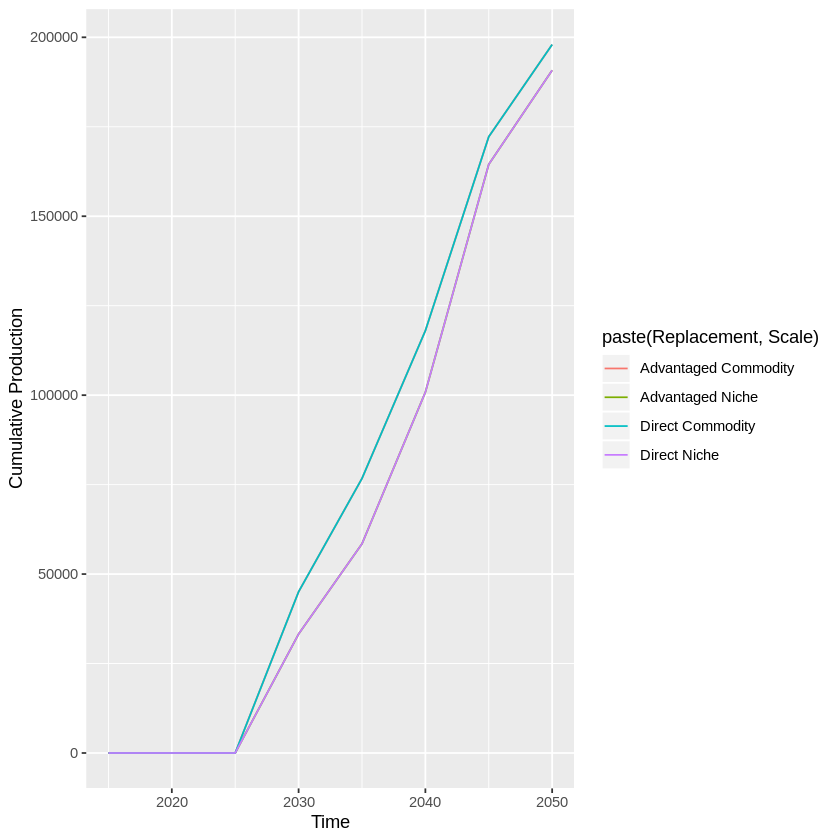

In [62]:
ggplot(
    z.outputs[Run == 64252, .(Replacement, Scale, Time, `Cumulative Production`)],
    aes(x=Time, y=`Cumulative Production`, color=paste(Replacement, Scale))
) + geom_line()